<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. 

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-f5_rrviw
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-f5_rrviw
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-lz81m403/pyfolio_b75713718be546a59cf9f428a4aeef89
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-lz81m403/pyfolio_b75713718be546a59cf9f428a4aeef89
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-lz81m403/elegantrl_1e8f89d5d99f41fe9c68630111f0c5a8
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-lz81m403/elegantrl_1e8f89d5d99f41fe9c68630111f0c5a8
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 174 kB 34.2 MB/s 
     |████████████████████████████████| 54.7 MB 29 kB/s 
     |████████████████████████████████| 1.8 MB 67.7 MB/s 
     |███████


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them. 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
# from finrl.config import config
# from finrl.marketdata.yahoodownloader import YahooDownloader
# from finrl.preprocessing.preprocessors import FeatureEngineer
# from finrl.preprocessing.data import data_split
# from finrl.env.env_stocktrading import StockTradingEnv
# from finrl.model.models import DRLAgent, DRLEnsembleAgent
# from finrl.trade.backtest import backtest_stats, backtest_plot, get_daily_return, get_baseline, backtest_multi_plot


# import
from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent, DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


<a id='1.4'></a>
## 2.4. Create Folders

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [ ]:
# from config.py start_date is a string
config.START_DATE

'2009-01-01'

In [ ]:
# from config.py end_date is a string
config.END_DATE

'2021-10-31'

In [ ]:
print(config.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [ ]:
df = YahooDownloader(start_date = '2009-01-01',
                     end_date = '2021-10-01',
                     ticker_list = config.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.shape

(88061, 8)

In [ ]:
df.sort_values(['date','tic'],ignore_index=True).head()

date       open       high        low      close     volume   tic  day
0  2009-01-02   3.067143   3.251429   3.041429   2.778781  746015200  AAPL    4
1  2009-01-02  58.590000  59.080002  57.750000  45.998848    6547900  AMGN    4
2  2009-01-02  18.570000  19.520000  18.400000  15.618542   10955700   AXP    4
3  2009-01-02  42.799999  45.560001  42.779999  33.941093    7010200    BA    4
4  2009-01-02  44.910000  46.980000  44.709999  32.475807    7117200   CAT    4

# Part 4: Preprocess Data


In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = config.TECHNICAL_INDICATORS_LIST,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [ ]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

date   tic       open  ...  close_30_sma  close_60_sma  turbulence
0  2009-01-02  AAPL   3.067143  ...      2.778781      2.778781         0.0
1  2009-01-02  AMGN  58.590000  ...     45.998848     45.998848         0.0
2  2009-01-02   AXP  18.570000  ...     15.618542     15.618542         0.0
3  2009-01-02    BA  42.799999  ...     33.941093     33.941093         0.0
4  2009-01-02   CAT  44.910000  ...     32.475807     32.475807         0.0
5  2009-01-02   CRM   8.025000  ...      8.505000      8.505000         0.0
6  2009-01-02  CSCO  16.410000  ...     12.421843     12.421843         0.0
7  2009-01-02   CVX  74.230003  ...     46.178162     46.178162         0.0
8  2009-01-02   DIS  22.760000  ...     20.597498     20.597498         0.0
9  2009-01-02    GS  84.019997  ...     71.965530     71.965530         0.0

[10 rows x 17 columns]

<a id='4'></a>
# Part 5. Design Environment
The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

## Training data split: 2009-01-01 to 2018-12-31
## Trade data split: 2019-01-01 to 2020-09-30

In [ ]:
train = data_split(processed_full, '2009-01-01','2019-01-01')
trade = data_split(processed_full, '2019-01-01','2021-01-01')
print(len(train))
print(len(trade))

72964
14645


In [ ]:
train.head()

date   tic       open  ...  close_30_sma  close_60_sma  turbulence
0  2009-01-02  AAPL   3.067143  ...      2.778781      2.778781         0.0
0  2009-01-02  AMGN  58.590000  ...     45.998848     45.998848         0.0
0  2009-01-02   AXP  18.570000  ...     15.618542     15.618542         0.0
0  2009-01-02    BA  42.799999  ...     33.941093     33.941093         0.0
0  2009-01-02   CAT  44.910000  ...     32.475807     32.475807         0.0

[5 rows x 17 columns]

In [ ]:
trade.head()

date   tic        open  ...  close_30_sma  close_60_sma  turbulence
0  2019-01-02  AAPL   38.722500  ...     41.034357     46.272397   43.730205
0  2019-01-02  AMGN  192.520004  ...    178.695362    178.873327   43.730205
0  2019-01-02   AXP   93.910004  ...     99.213763     99.777656   43.730205
0  2019-01-02    BA  316.190002  ...    314.427167    331.956153   43.730205
0  2019-01-02   CAT  124.029999  ...    116.370008    118.540171   43.730205

[5 rows x 17 columns]

In [ ]:
config.TECHNICAL_INDICATORS_LIST

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.TECHNICAL_INDICATORS_LIST)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 291


In [ ]:
state_space_without_indicator = 1 + 2*stock_dimension
print(f" State Space without Indicator: {state_space_without_indicator}")

 State Space without Indicator: 59


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
}

e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [ ]:
env_kwargs_without_indicator = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space_without_indicator, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": [],
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
}

e_train_gym_without_indicator = StockTradingEnv(df = train, **env_kwargs_without_indicator)

## Environment for Training



In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
env_train_without_indicator, _ = e_train_gym_without_indicator.get_sb_env()
print(type(env_train_without_indicator))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Implement DRL Algorithms


In [ ]:
agent_without_indicator = DRLAgent(env = env_train_without_indicator)

In [ ]:
agent = DRLAgent(env = env_train)

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2015-01-01'
train_end = '2019-01-01'
val_test_start = '2019-01-01'
val_test_end = '2021-10-01'

ensemble_agent = DRLEnsembleAgent(df=processed_full,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
    'n_steps': 5,
    'ent_coef': 0.01,
    'learning_rate': 0.0005
}

PPO_model_kwargs = {
    "ent_coef":0.01,
    "n_steps": 2048,
    "learning_rate": 0.00025,
    "batch_size": 128
}

DDPG_model_kwargs = {
    "action_noise":"ornstein_uhlenbeck",
    "buffer_size": 50_000,
    "learning_rate": 0.000005,
    "batch_size": 128
}

TD3_model_kwargs = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

SAC_model_kwargs = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

timesteps_dict = {
    "a2c" : 100_000,
    "ppo" : 50_000,
    "ddpg" : 50_000,
    "td3": 30_000,
    "sac" : 80_000
}

trained_models_dict = {}
trained_models_without_indicator = {}

### Model Training: 5 models, A2C DDPG, PPO, TD3, SAC, Ensebmle



In [ ]:
# df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
#                                                  PPO_model_kwargs,
#                                                  DDPG_model_kwargs,
#                                                  TD3_model_kwargs,
#                                                  SAC_model_kwargs,
#                                                  timesteps_dict,
#                                                  run_mode = "load"
#                                                  )

In [ ]:
df_summary

In [ ]:
unique_trade_date = processed_full[(processed_full.date > val_test_start)&(processed_full.date <= val_test_end)].date.unique()
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value_ensemble=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value_ensemble = df_account_value_ensemble.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value_ensemble.account_value.pct_change(1).mean()/df_account_value_ensemble.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value_ensemble=df_account_value_ensemble.join(df_trade_date[validation_window:].reset_index(drop=True))

In [ ]:
df_account_value_ensemble.head()

In [ ]:
%matplotlib inline
df_account_value_ensemble.account_value.plot()

### Model 1: A2C


In [ ]:
# IsTrainMode = False #True means train, false means Load from saved models.
IsTrainMode = True

In [ ]:
agent = DRLAgent(env = env_train)
agent_without_indicator = DRLAgent(env = env_train_without_indicator)

model_a2c = agent.get_model("a2c",model_kwargs = A2C_model_kwargs)
model_a2c_without_indicator = agent_without_indicator.get_model("a2c",model_kwargs = A2C_model_kwargs)

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0005}
Using cpu device
{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0005}
Using cpu device


In [ ]:
total_timesteps_a2c = timesteps_dict['a2c']

if not IsTrainMode:
    trained_a2c = model_a2c.load(f"{config.TRAINED_MODEL_DIR}/{'a2c'.upper()}_{total_timesteps_a2c//1000}", env = env_train)
    trained_a2c_without_indicator = model_a2c_without_indicator.load(f"{config.TRAINED_MODEL_DIR}/{'a2c'.upper()}_{'withoutindicator'}_{total_timesteps_a2c//1000}", env = env_train_without_indicator)

In [ ]:
if IsTrainMode:
    trained_a2c = agent.train_model(model=model_a2c, 
                                 tb_log_name='a2c',
                                 total_timesteps=total_timesteps_a2c)

Logging to tensorboard_log/a2c/a2c_1
----------------------------------------
| time/                 |              |
|    fps                | 68           |
|    iterations         | 100          |
|    time_elapsed       | 7            |
|    total_timesteps    | 500          |
| train/                |              |
|    entropy_loss       | -41.2        |
|    explained_variance | 0            |
|    learning_rate      | 0.0005       |
|    n_updates          | 99           |
|    policy_loss        | 27.1         |
|    reward             | -0.017252859 |
|    std                | 1            |
|    value_loss         | 0.579        |
----------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 81          |
|    iterations         | 200         |
|    time_elapsed       | 12          |
|    total_timesteps    | 1000        |
| train/                |             |
|    entropy_loss       | -

In [ ]:
if IsTrainMode:
    trained_a2c_without_indicator = agent_without_indicator.train_model(model=model_a2c_without_indicator, 
                                 tb_log_name='a2c',
                                 total_timesteps=total_timesteps_a2c)

Logging to tensorboard_log/a2c/a2c_2
--------------------------------------
| time/                 |            |
|    fps                | 102        |
|    iterations         | 100        |
|    time_elapsed       | 4          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -41.2      |
|    explained_variance | 0          |
|    learning_rate      | 0.0005     |
|    n_updates          | 99         |
|    policy_loss        | -38        |
|    reward             | 0.27502227 |
|    std                | 1          |
|    value_loss         | 1.08       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 102        |
|    iterations         | 200        |
|    time_elapsed       | 9          |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -41.3      |
|    explained_variance | 0

In [ ]:
if IsTrainMode:
    model_a2c.save(f"{config.TRAINED_MODEL_DIR}/{'a2c'.upper()}_{total_timesteps_a2c//1000}")
    model_a2c_without_indicator.save(f"{config.TRAINED_MODEL_DIR}/{'a2c'.upper()}_{'withoutindicator'}_{total_timesteps_a2c//1000}")

In [ ]:
trained_models_dict['a2c'] = trained_a2c
trained_models_without_indicator['a2c'] = trained_a2c_without_indicator

### Model 2: DDPG

In [ ]:
agent = DRLAgent(env = env_train)
agent_without_indicator = DRLAgent(env = env_train_without_indicator)

model_ddpg = agent.get_model("ddpg")
model_ddpg_without_indicator = agent_without_indicator.get_model("ddpg")

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
total_timesteps_ddpg = timesteps_dict['ddpg']

if not IsTrainMode:
    trained_ddpg = model_ddpg.load(f"{config.TRAINED_MODEL_DIR}/{'ddpg'.upper()}_{total_timesteps_ddpg//1000}", env = env_train)
    trained_ddpg_without_indicator = model_ddpg_without_indicator.load(f"{config.TRAINED_MODEL_DIR}/{'ddpg'.upper()}_{'withoutindicator'}_{total_timesteps_ddpg//1000}", env = env_train_without_indicator)

In [ ]:
if IsTrainMode:
    trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=total_timesteps_ddpg)

Logging to tensorboard_log/ddpg/ddpg_1
day: 2515, episode: 45
begin_total_asset: 1000000.00
end_total_asset: 3495475.37
total_reward: 2495475.37
total_cost: 1143.97
total_trades: 30281
Sharpe: 0.891
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 31        |
|    time_elapsed    | 319       |
|    total_timesteps | 10064     |
| train/             |           |
|    actor_loss      | -39       |
|    critic_loss     | 676       |
|    learning_rate   | 0.001     |
|    n_updates       | 7548      |
|    reward          | 3.5753443 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 27        |
|    time_elapsed    | 733       |
|    total_timesteps | 20128     |
| train/             |           |
|    actor_loss      | -18.9     |
|    critic_loss     | 6.37      |
|    learning_rate   | 0.001   

In [ ]:
if IsTrainMode:
    trained_ddpg_without_indicator = agent_without_indicator.train_model(model=model_ddpg_without_indicator, 
                             tb_log_name='ddpg',
                             total_timesteps=total_timesteps_ddpg)

Logging to tensorboard_log/ddpg/ddpg_2
day: 2515, episode: 45
begin_total_asset: 1000000.00
end_total_asset: 3551618.66
total_reward: 2551618.66
total_cost: 1061.51
total_trades: 40261
Sharpe: 0.849
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 38       |
|    time_elapsed    | 258      |
|    total_timesteps | 10064    |
| train/             |          |
|    actor_loss      | 41.7     |
|    critic_loss     | 425      |
|    learning_rate   | 0.001    |
|    n_updates       | 7548     |
|    reward          | 4.36695  |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 34       |
|    time_elapsed    | 582      |
|    total_timesteps | 20128    |
| train/             |          |
|    actor_loss      | -8.99    |
|    critic_loss     | 50.4     |
|    learning_rate   | 0.001    |
|    n_updates     

In [ ]:
if IsTrainMode:
    model_ddpg.save(f"{config.TRAINED_MODEL_DIR}/{'ddpg'.upper()}_{total_timesteps_ddpg//1000}")
    model_ddpg_without_indicator.save(f"{config.TRAINED_MODEL_DIR}/{'ddpg'.upper()}_{'withoutindicator'}_{total_timesteps_ddpg//1000}")

In [ ]:
trained_models_dict['ddpg'] = trained_ddpg
trained_models_without_indicator['ddpg'] = trained_ddpg_without_indicator

### Model 3: PPO

In [ ]:
agent = DRLAgent(env = env_train)
agent_without_indicator = DRLAgent(env = env_train_without_indicator)

model_ppo = agent.get_model("ppo",model_kwargs = PPO_model_kwargs)
model_ppo_without_indicator = agent_without_indicator.get_model("ppo",model_kwargs = PPO_model_kwargs)

{'ent_coef': 0.01, 'n_steps': 2048, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
{'ent_coef': 0.01, 'n_steps': 2048, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device


In [ ]:
total_timesteps_ppo = timesteps_dict['ppo']

if not IsTrainMode:
    trained_ppo = model_ppo.load(f"{config.TRAINED_MODEL_DIR}/{'ppo'.upper()}_{total_timesteps_ppo//1000}", env = env_train)
    trained_ppo_without_indicator = model_ppo_without_indicator.load(f"{config.TRAINED_MODEL_DIR}/{'ppo'.upper()}_{'withoutindicator'}_{total_timesteps_ppo//1000}", env = env_train_without_indicator)

In [ ]:
if IsTrainMode:
    trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=total_timesteps_ppo)

Logging to tensorboard_log/ppo/ppo_1
-----------------------------------
| time/              |            |
|    fps             | 106        |
|    iterations      | 1          |
|    time_elapsed    | 19         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | 0.45326242 |
-----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 2           |
|    time_elapsed         | 39          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014336664 |
|    clip_fraction        | 0.238       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.1       |
|    explained_variance   | -0.00748    |
|    learning_rate        | 0.00025     |
|    loss                 | 10.8        |
|    n_updates            | 10          |
|    poli

In [ ]:
if IsTrainMode:
    trained_ppo_without_indicator = agent_without_indicator.train_model(model=model_ppo_without_indicator, 
                             tb_log_name='ppo',
                             total_timesteps=total_timesteps_ppo)

Logging to tensorboard_log/ppo/ppo_2
----------------------------------
| time/              |           |
|    fps             | 109       |
|    iterations      | 1         |
|    time_elapsed    | 18        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 0.2735018 |
----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 2           |
|    time_elapsed         | 37          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014282336 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.2       |
|    explained_variance   | 0.00281     |
|    learning_rate        | 0.00025     |
|    loss                 | 5.84        |
|    n_updates            | 10          |
|    policy_gradie

In [ ]:
if IsTrainMode:
    model_ppo.save(f"{config.TRAINED_MODEL_DIR}/{'ppo'.upper()}_{total_timesteps_ppo//1000}")
    model_ppo_without_indicator.save(f"{config.TRAINED_MODEL_DIR}/{'ppo'.upper()}_{'withoutindicator'}_{total_timesteps_ppo//1000}")

In [ ]:
trained_models_dict['ppo'] = trained_ppo
trained_models_without_indicator['ppo'] = trained_ppo_without_indicator

### Model 4: TD3

In [ ]:
agent = DRLAgent(env = env_train)
agent_without_indicator = DRLAgent(env = env_train_without_indicator)

model_td3 = agent.get_model("td3",model_kwargs = TD3_model_kwargs)
model_td3_without_indicator = agent_without_indicator.get_model("td3",model_kwargs = TD3_model_kwargs)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device
{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
total_timesteps_td3 = timesteps_dict['td3']

if not IsTrainMode:
    trained_td3 = model_td3.load(f"{config.TRAINED_MODEL_DIR}/{'td3'.upper()}_{total_timesteps_td3//1000}", env = env_train)
    trained_td3_without_indicator = model_td3_without_indicator.load(f"{config.TRAINED_MODEL_DIR}/{'td3'.upper()}_{'withoutindicator'}_{total_timesteps_td3//1000}", env = env_train_without_indicator)

In [ ]:
if IsTrainMode:
    trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=total_timesteps_td3)

Logging to tensorboard_log/td3/td3_1
day: 2515, episode: 85
begin_total_asset: 1000000.00
end_total_asset: 4627610.01
total_reward: 3627610.01
total_cost: 999.00
total_trades: 35211
Sharpe: 1.022
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 32        |
|    time_elapsed    | 311       |
|    total_timesteps | 10064     |
| train/             |           |
|    actor_loss      | 154       |
|    critic_loss     | 2.8e+03   |
|    learning_rate   | 0.001     |
|    n_updates       | 7548      |
|    reward          | 5.3582683 |
----------------------------------
day: 2515, episode: 90
begin_total_asset: 1000000.00
end_total_asset: 4627610.01
total_reward: 3627610.01
total_cost: 999.00
total_trades: 35210
Sharpe: 1.022
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 27        |
|    time_elapsed    | 724       |
|    total_time

In [ ]:
if IsTrainMode:
    trained_td3_without_indicator = agent_without_indicator.train_model(model=model_td3_without_indicator, 
                             tb_log_name='td3',
                             total_timesteps=total_timesteps_td3)

Logging to tensorboard_log/td3/td3_2
day: 2515, episode: 85
begin_total_asset: 1000000.00
end_total_asset: 3160570.94
total_reward: 2160570.94
total_cost: 1182.90
total_trades: 52845
Sharpe: 0.753
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 39        |
|    time_elapsed    | 254       |
|    total_timesteps | 10064     |
| train/             |           |
|    actor_loss      | -59.6     |
|    critic_loss     | 2.16e+03  |
|    learning_rate   | 0.001     |
|    n_updates       | 7548      |
|    reward          | 3.7244227 |
----------------------------------
day: 2515, episode: 90
begin_total_asset: 1000000.00
end_total_asset: 3422871.71
total_reward: 2422871.71
total_cost: 999.00
total_trades: 47785
Sharpe: 0.796
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 34        |
|    time_elapsed    | 575       |
|    total_tim

In [ ]:
if IsTrainMode:
    model_td3.save(f"{config.TRAINED_MODEL_DIR}/{'td3'.upper()}_{total_timesteps_td3//1000}")
    model_td3_without_indicator.save(f"{config.TRAINED_MODEL_DIR}/{'td3'.upper()}_{'withoutindicator'}_{total_timesteps_td3//1000}")

In [ ]:
trained_models_dict['td3'] = trained_td3
trained_models_without_indicator['td3'] = trained_td3_without_indicator

### Model 5: SAC

In [ ]:
agent = DRLAgent(env = env_train)
agent_without_indicator = DRLAgent(env = env_train_without_indicator)

model_sac = agent.get_model("sac",model_kwargs = SAC_model_kwargs)
model_sac_without_indicator = agent_without_indicator.get_model("sac",model_kwargs = SAC_model_kwargs)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [ ]:
total_timesteps_sac = timesteps_dict['sac']

if not IsTrainMode:
    trained_sac = model_sac.load(f"{config.TRAINED_MODEL_DIR}/{'sac'.upper()}_{total_timesteps_sac//1000}", env = env_train)
    trained_sac_without_indicator = model_sac_without_indicator.load(f"{config.TRAINED_MODEL_DIR}/{'sac'.upper()}_{'withoutindicator'}_{total_timesteps_sac//1000}", env = env_train_without_indicator)

In [ ]:
if IsTrainMode:
    trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=total_timesteps_sac)

Logging to tensorboard_log/sac/sac_1
day: 2515, episode: 100
begin_total_asset: 1000000.00
end_total_asset: 3268618.03
total_reward: 2268618.03
total_cost: 18576.98
total_trades: 48313
Sharpe: 0.777
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 26        |
|    time_elapsed    | 374       |
|    total_timesteps | 10064     |
| train/             |           |
|    actor_loss      | 347       |
|    critic_loss     | 382       |
|    ent_coef        | 0.109     |
|    ent_coef_loss   | -79.4     |
|    learning_rate   | 0.0001    |
|    n_updates       | 9963      |
|    reward          | 2.9664211 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 26        |
|    time_elapsed    | 757       |
|    total_timesteps | 20128     |
| train/             |           |
|    actor_loss      | 138     

In [ ]:
if IsTrainMode:
    trained_sac_without_indicator = agent_without_indicator.train_model(model=model_sac_without_indicator, 
                             tb_log_name='sac',
                             total_timesteps=total_timesteps_sac)

Logging to tensorboard_log/sac/sac_2
day: 2515, episode: 100
begin_total_asset: 1000000.00
end_total_asset: 3165323.72
total_reward: 2165323.72
total_cost: 72782.35
total_trades: 43704
Sharpe: 0.747
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 32       |
|    time_elapsed    | 306      |
|    total_timesteps | 10064    |
| train/             |          |
|    actor_loss      | 1.76e+03 |
|    critic_loss     | 957      |
|    ent_coef        | 0.244    |
|    ent_coef_loss   | 184      |
|    learning_rate   | 0.0001   |
|    n_updates       | 9963     |
|    reward          | 4.226516 |
---------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 32        |
|    time_elapsed    | 620       |
|    total_timesteps | 20128     |
| train/             |           |
|    actor_loss      | 1.06e+03  |
|    critic

In [ ]:
if IsTrainMode:
    model_sac.save(f"{config.TRAINED_MODEL_DIR}/{'sac'.upper()}_{total_timesteps_sac//1000}")
    model_sac_without_indicator.save(f"{config.TRAINED_MODEL_DIR}/{'sac'.upper()}_{'withoutindicator'}_{total_timesteps_sac//1000}")

In [ ]:
trained_models_dict['sac'] = trained_sac
trained_models_without_indicator['sac'] = trained_sac_without_indicator

## Trading
Assume that we have $1,000,000 initial capital at 2019-01-01. We use the DDPG model to trade Dow jones 30 stocks.

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data, if current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [ ]:
data_turbulence = processed_full[(processed_full.date<'2019-01-01') & (processed_full.date>='2009-01-01')]
insample_turbulence = data_turbulence.drop_duplicates(subset=['date'])

In [ ]:
insample_turbulence.turbulence.describe()

count    2516.000000
mean       31.795290
std        32.615326
min         0.000000
25%        14.534906
50%        23.757310
75%        37.836121
max       287.419276
Name: turbulence, dtype: float64

In [ ]:
turbulence_threshold = np.quantile(insample_turbulence.turbulence.values,1)

In [ ]:
turbulence_threshold

287.4192756341881

### Trade


In [ ]:
trade = data_split(processed_full, '2019-01-01','2021-10-01')
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 380, **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [ ]:
trade = data_split(processed_full, '2019-01-01','2021-10-01')
e_trade_gym_without_indicator = StockTradingEnv(df = trade, turbulence_threshold = 380, **env_kwargs_without_indicator)

In [ ]:
trade.head()

date   tic        open  ...  close_30_sma  close_60_sma  turbulence
0  2019-01-02  AAPL   38.722500  ...     41.034357     46.272397   43.730205
0  2019-01-02  AMGN  192.520004  ...    178.695362    178.873327   43.730205
0  2019-01-02   AXP   93.910004  ...     99.213763     99.777656   43.730205
0  2019-01-02    BA  316.190002  ...    314.427167    331.956153   43.730205
0  2019-01-02   CAT  124.029999  ...    116.370008    118.540171   43.730205

[5 rows x 17 columns]

In [ ]:
df_account_value_dict = {}
df_account_value_without_indicator_dict = {}

In [ ]:
for model_name, trained_model in trained_models_dict.items():

    df_account_value, df_actions = DRLAgent.DRL_prediction(
        model=trained_model, 
        environment = e_trade_gym)
    
    df_account_value_dict[model_name] = df_account_value

hit end!
day: 504, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1368554.29
total_reward: 368554.29
total_cost: 7770.05
total_trades: 6101
Sharpe: 0.938
hit end!
hit end!
hit end!
hit end!


In [ ]:
for model_name, trained_model in trained_models_without_indicator.items():

    df_account_value, df_actions = DRLAgent.DRL_prediction(
        model=trained_model, 
        environment = e_trade_gym_without_indicator)
    
    df_account_value_without_indicator_dict[model_name] = df_account_value

hit end!
day: 504, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1551794.58
total_reward: 551794.58
total_cost: 7491.28
total_trades: 8016
Sharpe: 1.236
hit end!
hit end!
hit end!
hit end!


In [ ]:
df_account_value.shape

(505, 2)

In [ ]:
df_account_value.tail()

date  account_value
500  2020-12-24   1.340920e+06
501  2020-12-28   1.348215e+06
502  2020-12-29   1.345439e+06
503  2020-12-30   1.353106e+06
504  2020-12-31   1.357221e+06

In [ ]:
df_actions.head()

AAPL  AMGN  AXP  BA  CAT  CRM  CSCO  ...  PG  TRV  UNH   V  VZ  WBA  WMT
date                                             ...                                
2019-01-02    24     0   78  99    0   95    98  ...  98   12   25  99   0   99   80
2019-01-03   -24     0   91  98    0   96    79  ...  95   91   80  96  92   98   54
2019-01-04     0     0   84  99    0   77   -97  ...  58  -61   44  92  90   95  -85
2019-01-07     0     0   86  99    0   97    45  ...  88  -42  -14  96  78   96  -40
2019-01-08     0     0   80  99    0   98    69  ...  90    0   17  95 -47   96   87

[5 rows x 29 columns]

<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
for key, value in df_account_value_dict.items():
    
    print('=============={}:Get Backtest Results==========='.format(key.upper()))
    now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

    perf_stats_all = backtest_stats(account_value=value)
    perf_stats_all = pd.DataFrame(perf_stats_all)
    perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')
    
    print('=============={}:Get Backtest Results Without Indicator==========='.format(key.upper()))

    perf_stats_all_without_indicator = backtest_stats(account_value=df_account_value_without_indicator_dict[key])
    perf_stats_all_without_indicator = pd.DataFrame(perf_stats_all_without_indicator)
    perf_stats_all_without_indicator.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_without_indicator_"+now+'.csv')
    
print('==============Ensemble:Get Backtest Results Without Indicator===========')

# perf_stats_all_ensemble = backtest_stats(account_value=df_account_value_ensemble)
# perf_stats_all_ensemble = pd.DataFrame(perf_stats_all_ensemble)
# perf_stats_all_ensemble.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_ensemble_"+now+'.csv')

==============A2C:Get Backtest Results===========
Annual return          0.237880
Cumulative returns     0.533645
Annual volatility      0.204298
Sharpe ratio           1.149254
Calmar ratio           1.117085
Stability              0.408966
Max drawdown          -0.212947
Omega ratio            1.244531
Sortino ratio          1.678108
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.976446
Daily value at risk   -0.024807
dtype: float64
==============A2C:Get Backtest Results Without Indicator===========
Annual return          0.217399
Cumulative returns     0.483218
Annual volatility      0.219487
Sharpe ratio           1.007740
Calmar ratio           1.479036
Stability              0.725343
Max drawdown          -0.146987
Omega ratio            1.209077
Sortino ratio          1.529047
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.070368
Daily value at risk   -0.026775
dtype: float64
==============DDPG:G

In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = '2019-01-01',
        end = '2021-10-01')

stats = backtest_stats(baseline_df, value_col_name = 'close')


==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)
Annual return          0.144567
Cumulative returns     0.449652
Annual volatility      0.242661
Sharpe ratio           0.679586
Calmar ratio           0.389815
Stability              0.601443
Max drawdown          -0.370862
Omega ratio            1.160899
Sortino ratio          0.938596
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.908290
Daily value at risk   -0.029918
dtype: float64


In [ ]:
df_account_value_total = []
for key, value in df_account_value_dict.items():
    df_account_value_total.append(df_account_value_dict[key])
 

<a id='6.2'></a>
## 7.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


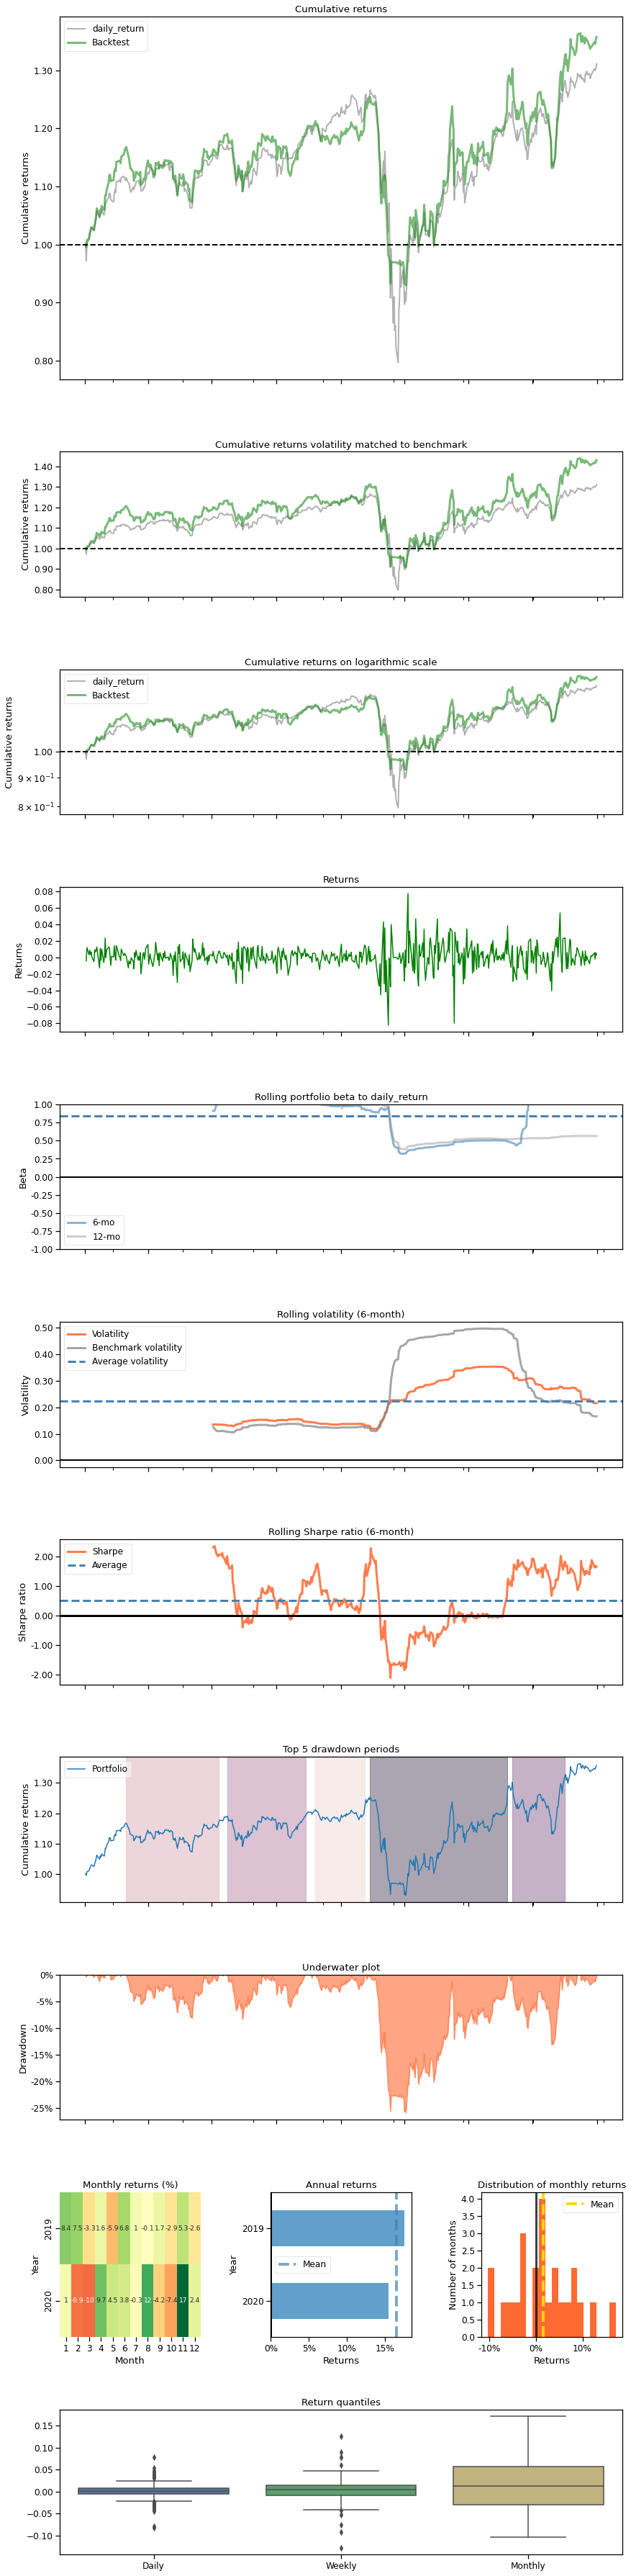

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')

==============Compare to DJIA ===========
==== without_indicator_dict['a2c']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


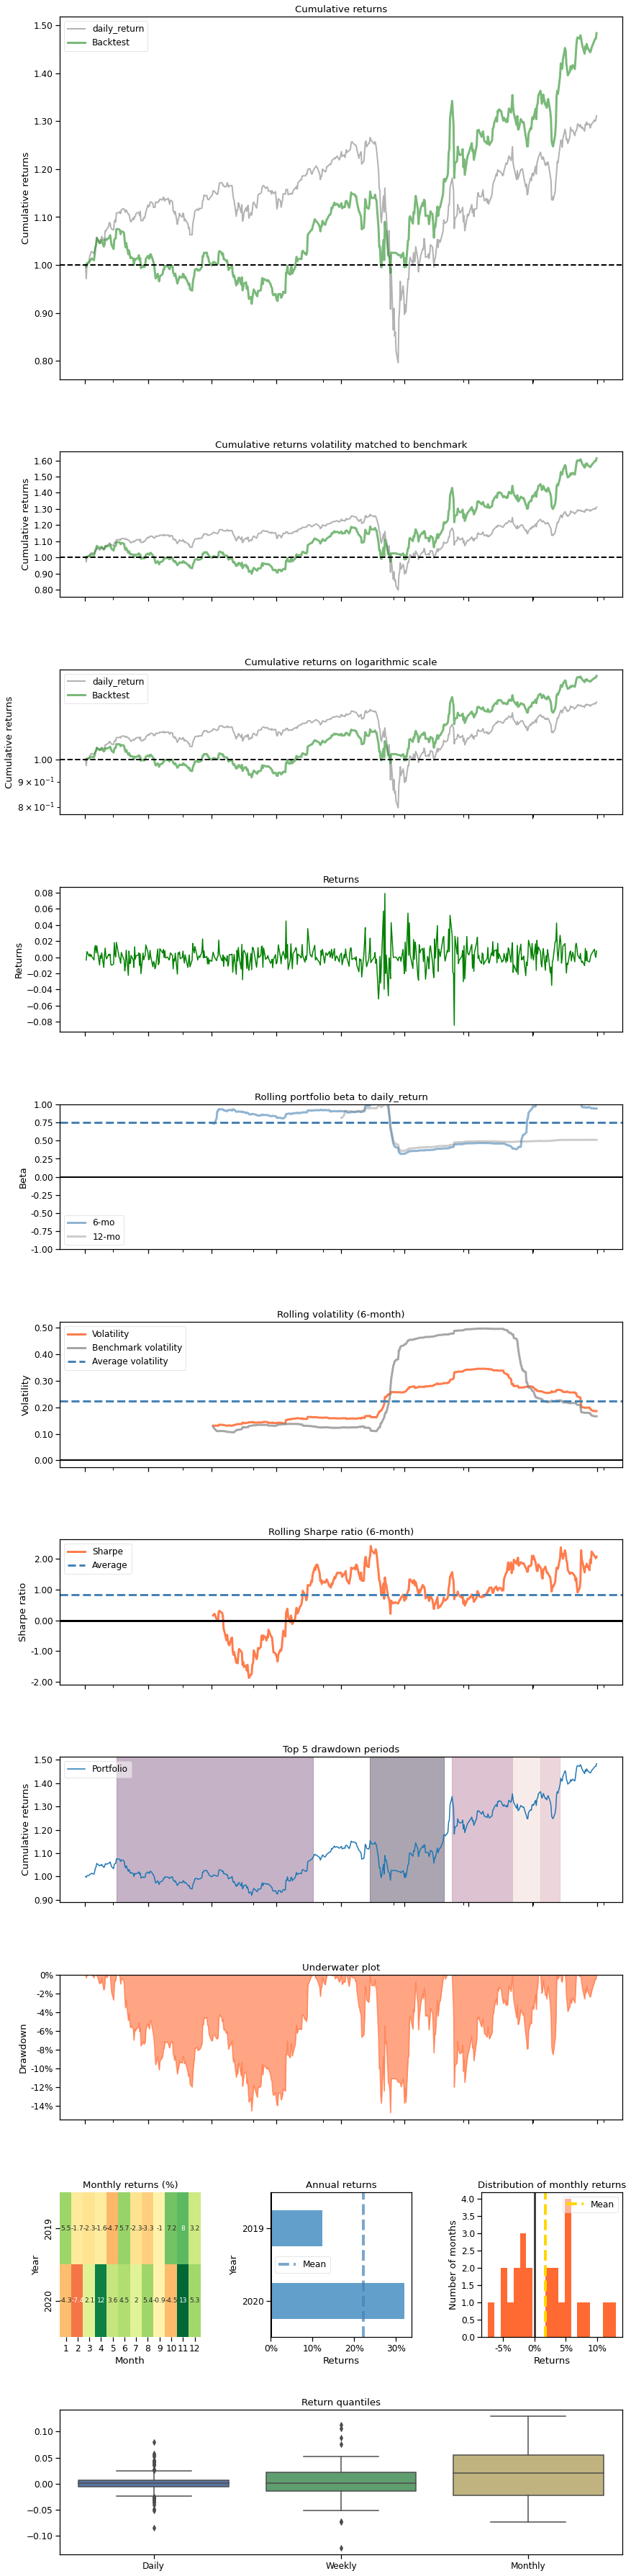

==== without_indicator_dict['ppo']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


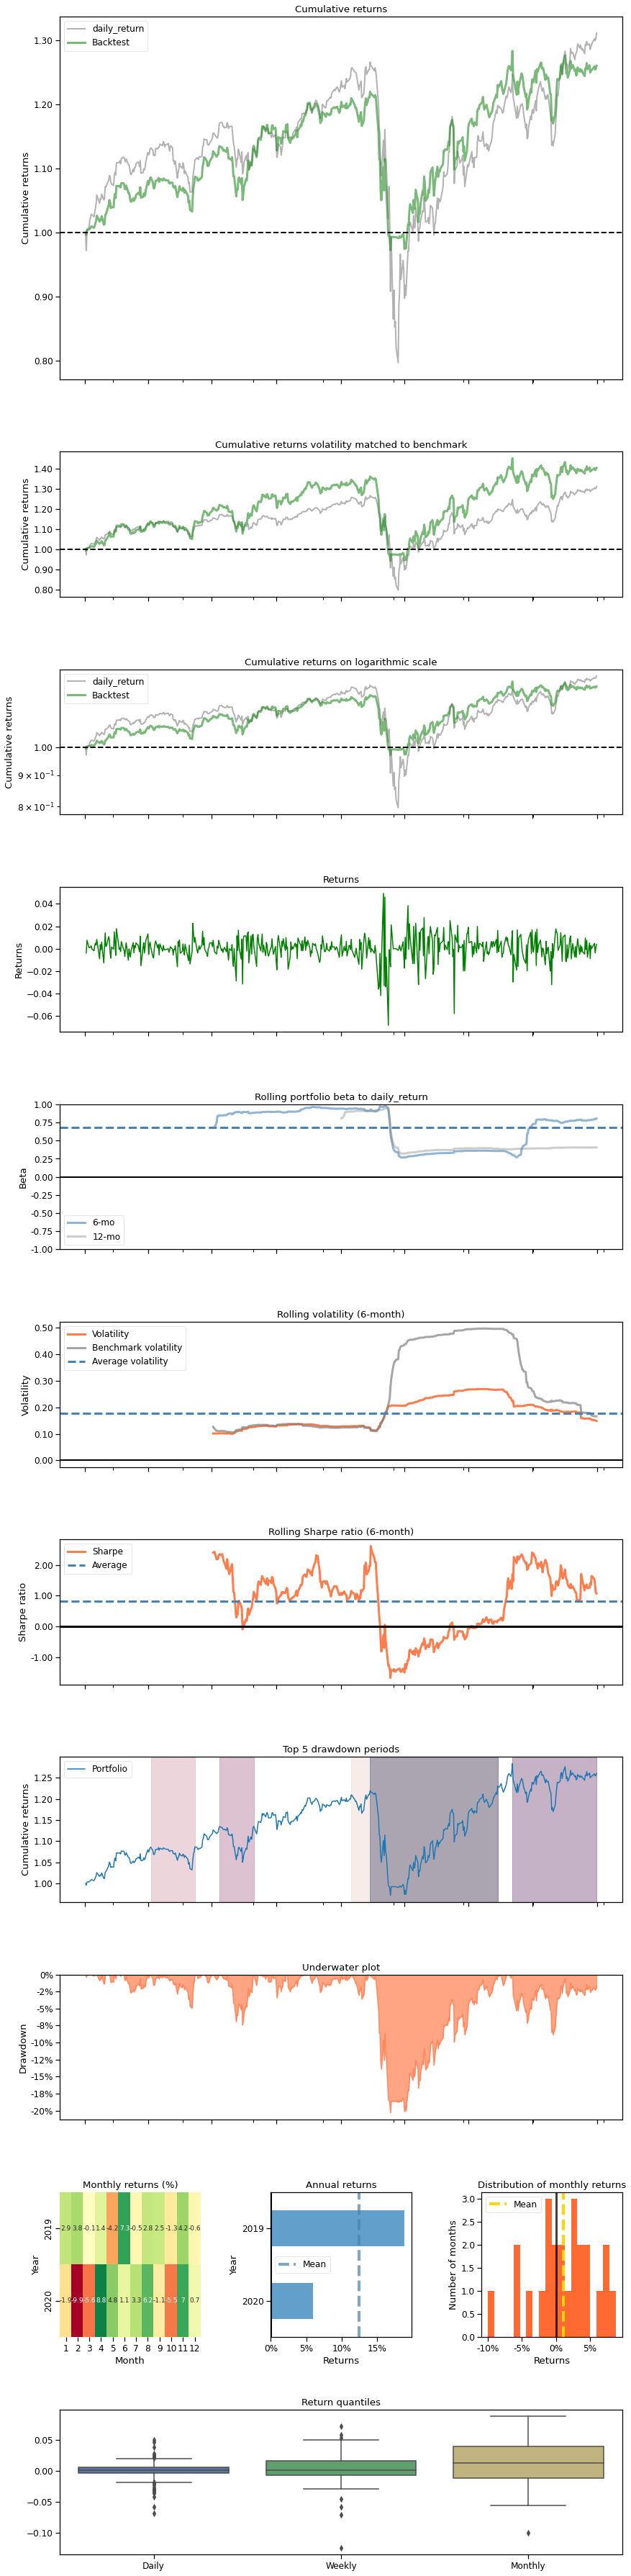

==== without_indicator_dict['ddpg']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


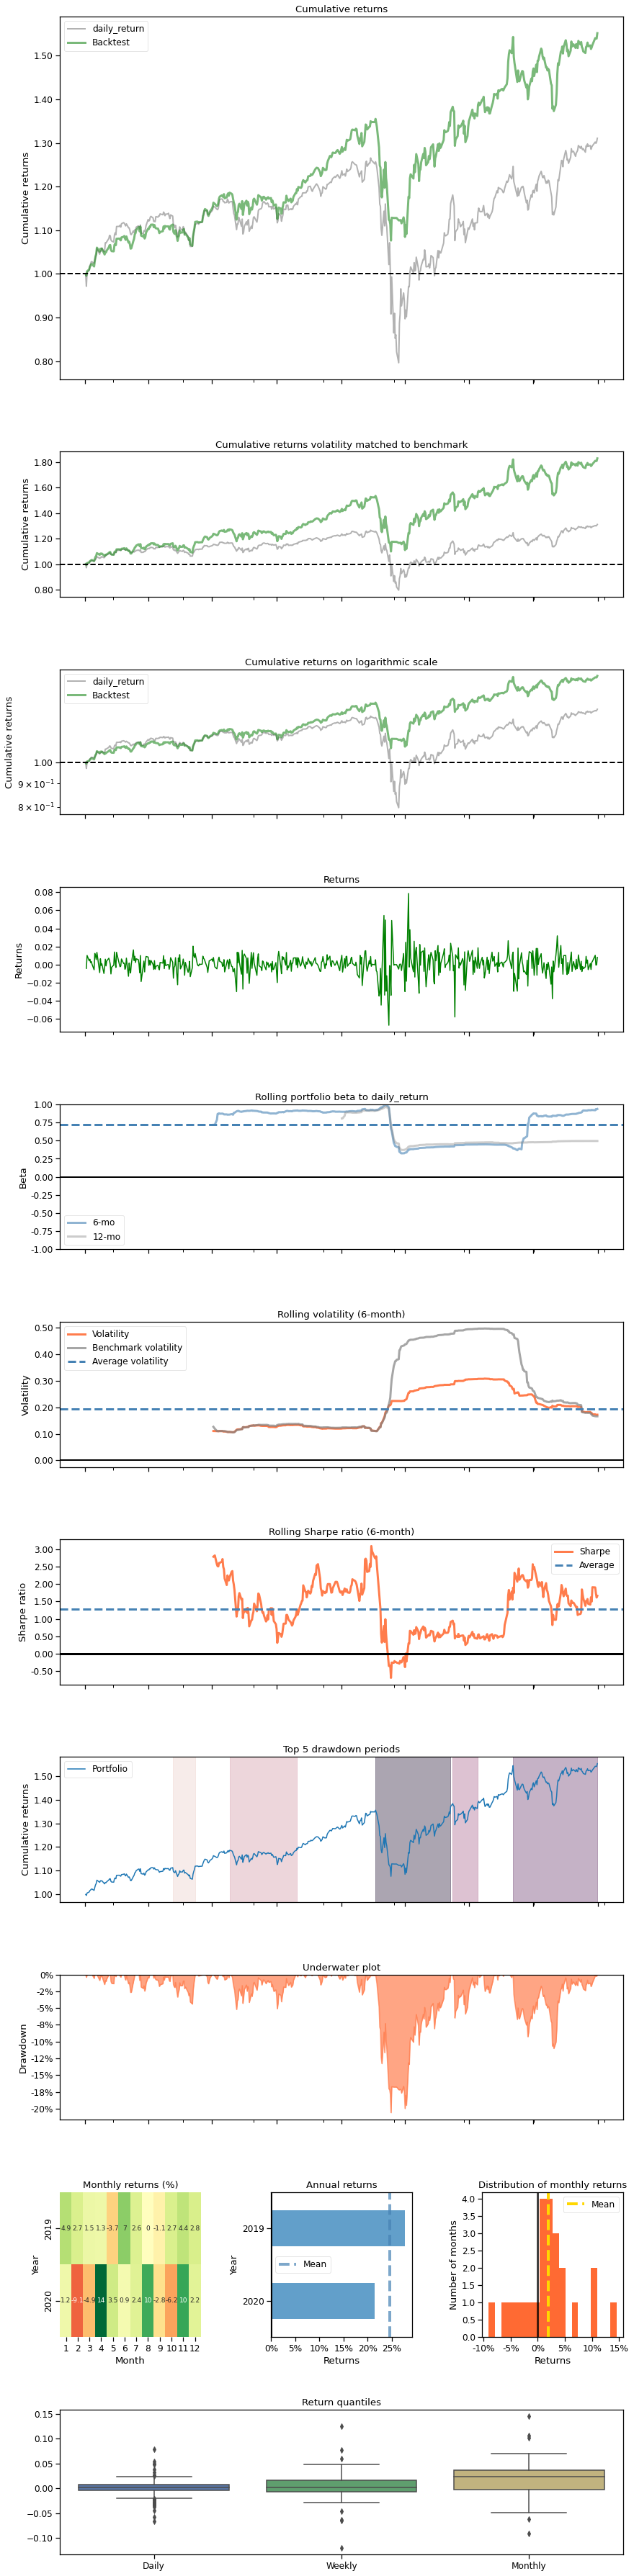

==== without_indicator_dict['sac']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


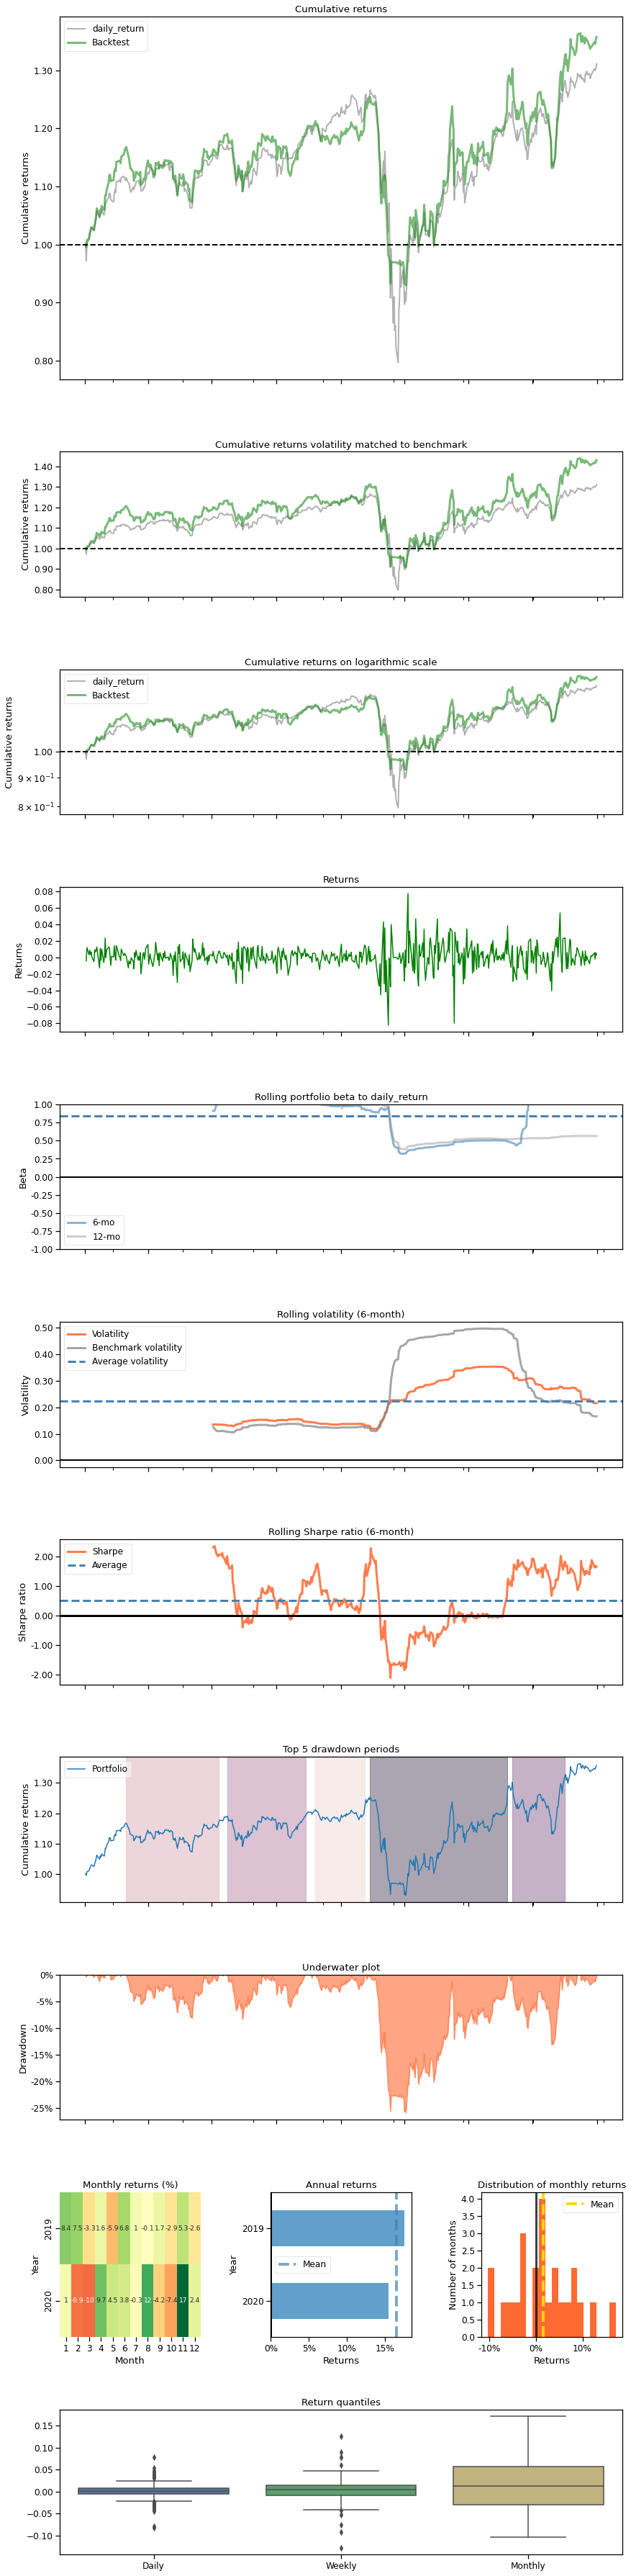

==== without_indicator_dict['td3']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


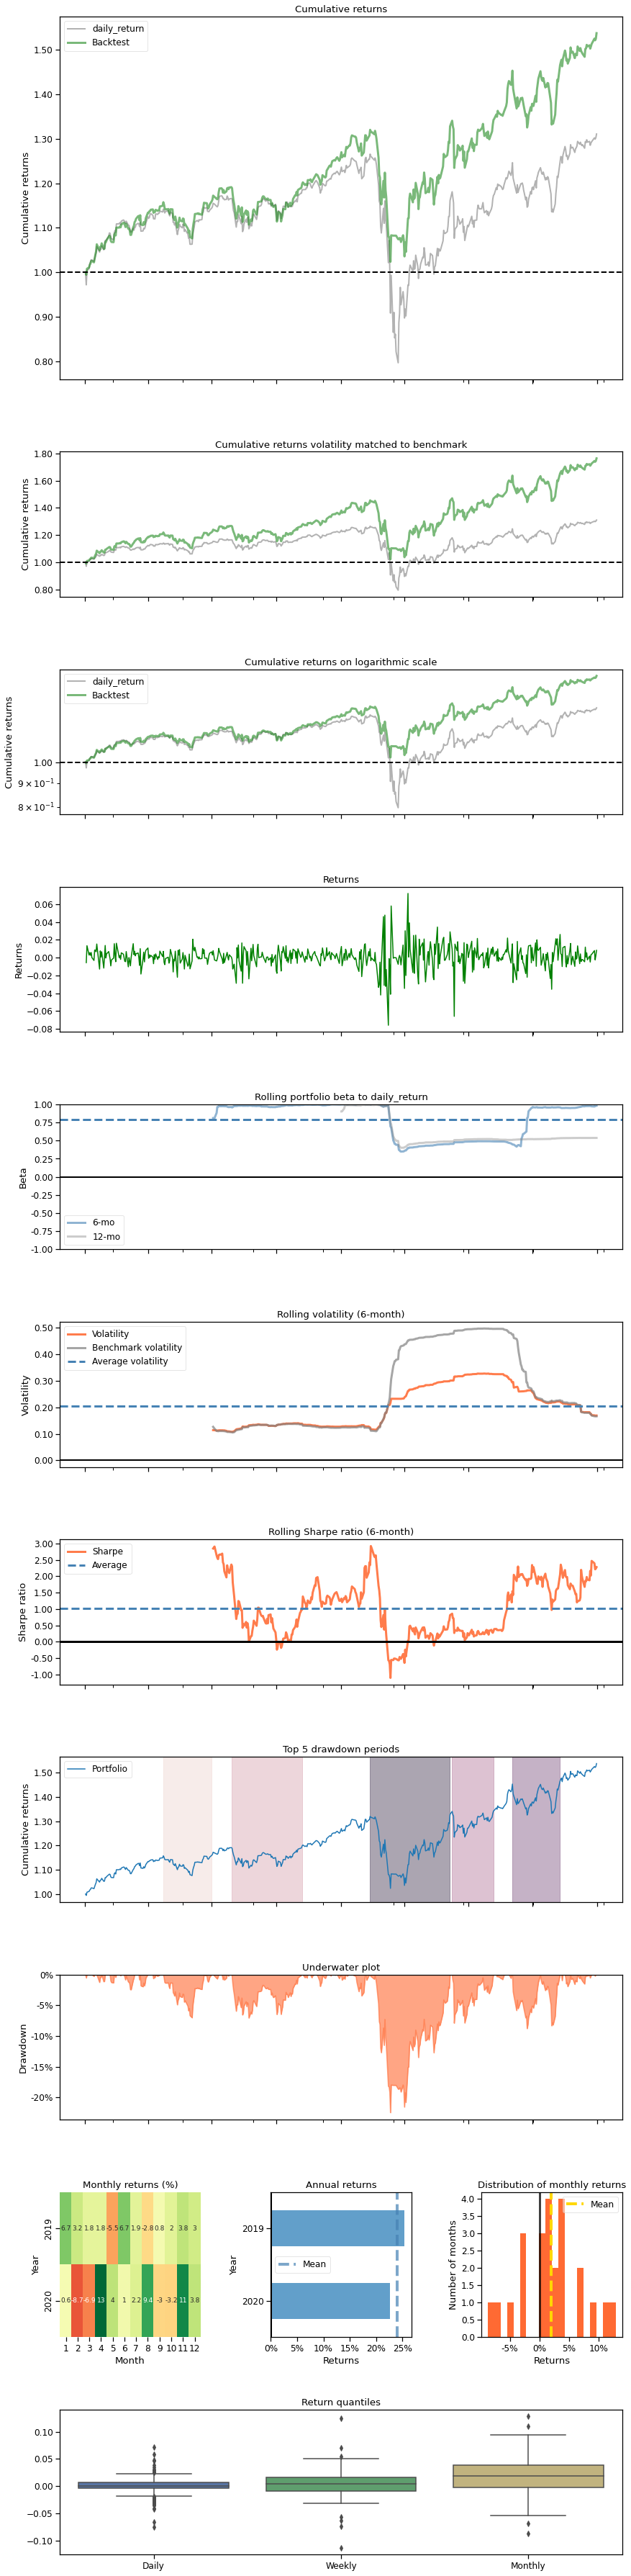

==== dict['a2c']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


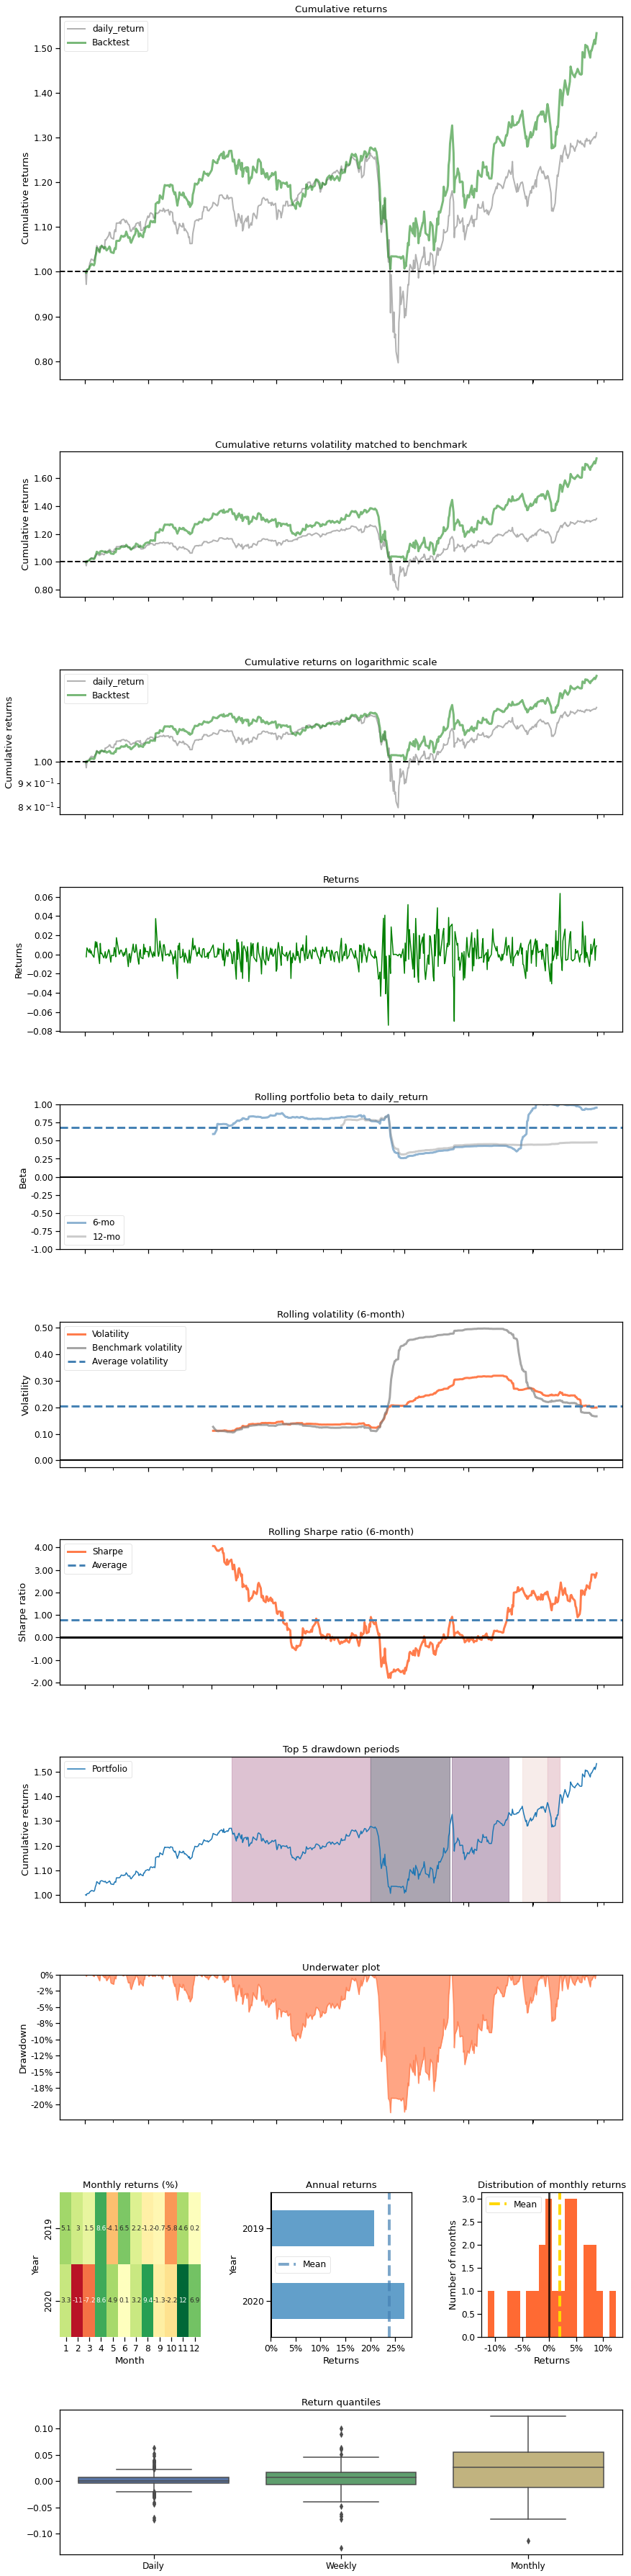

==== dict['ppo']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


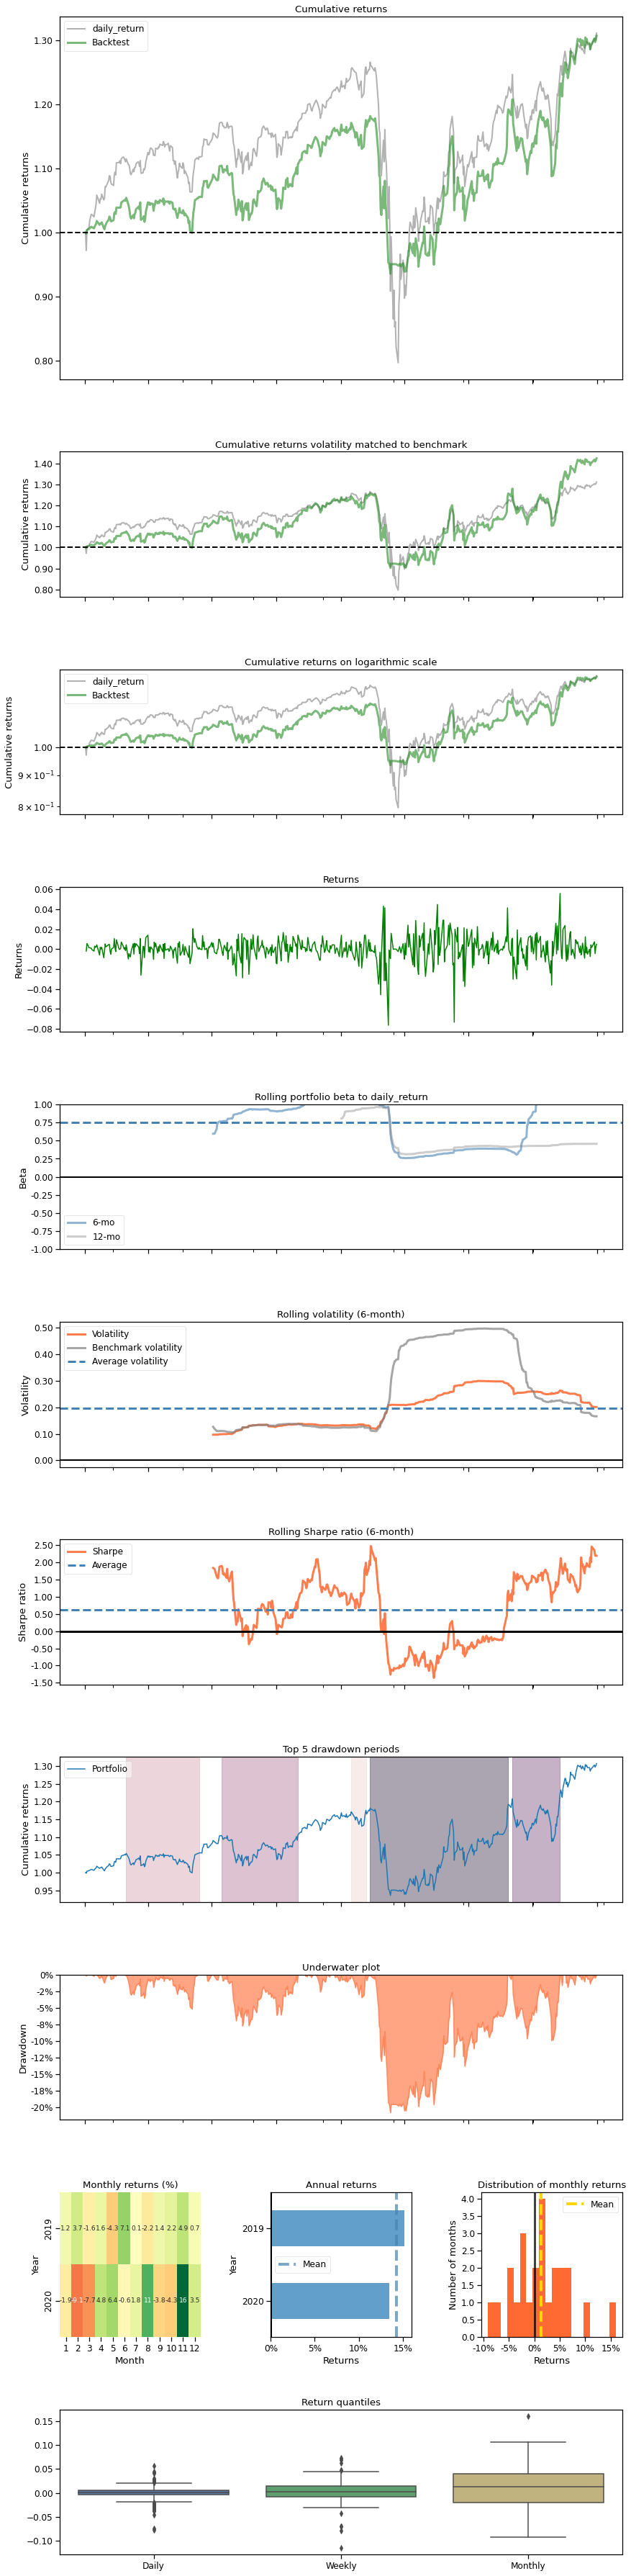

==== dict['ddpg']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


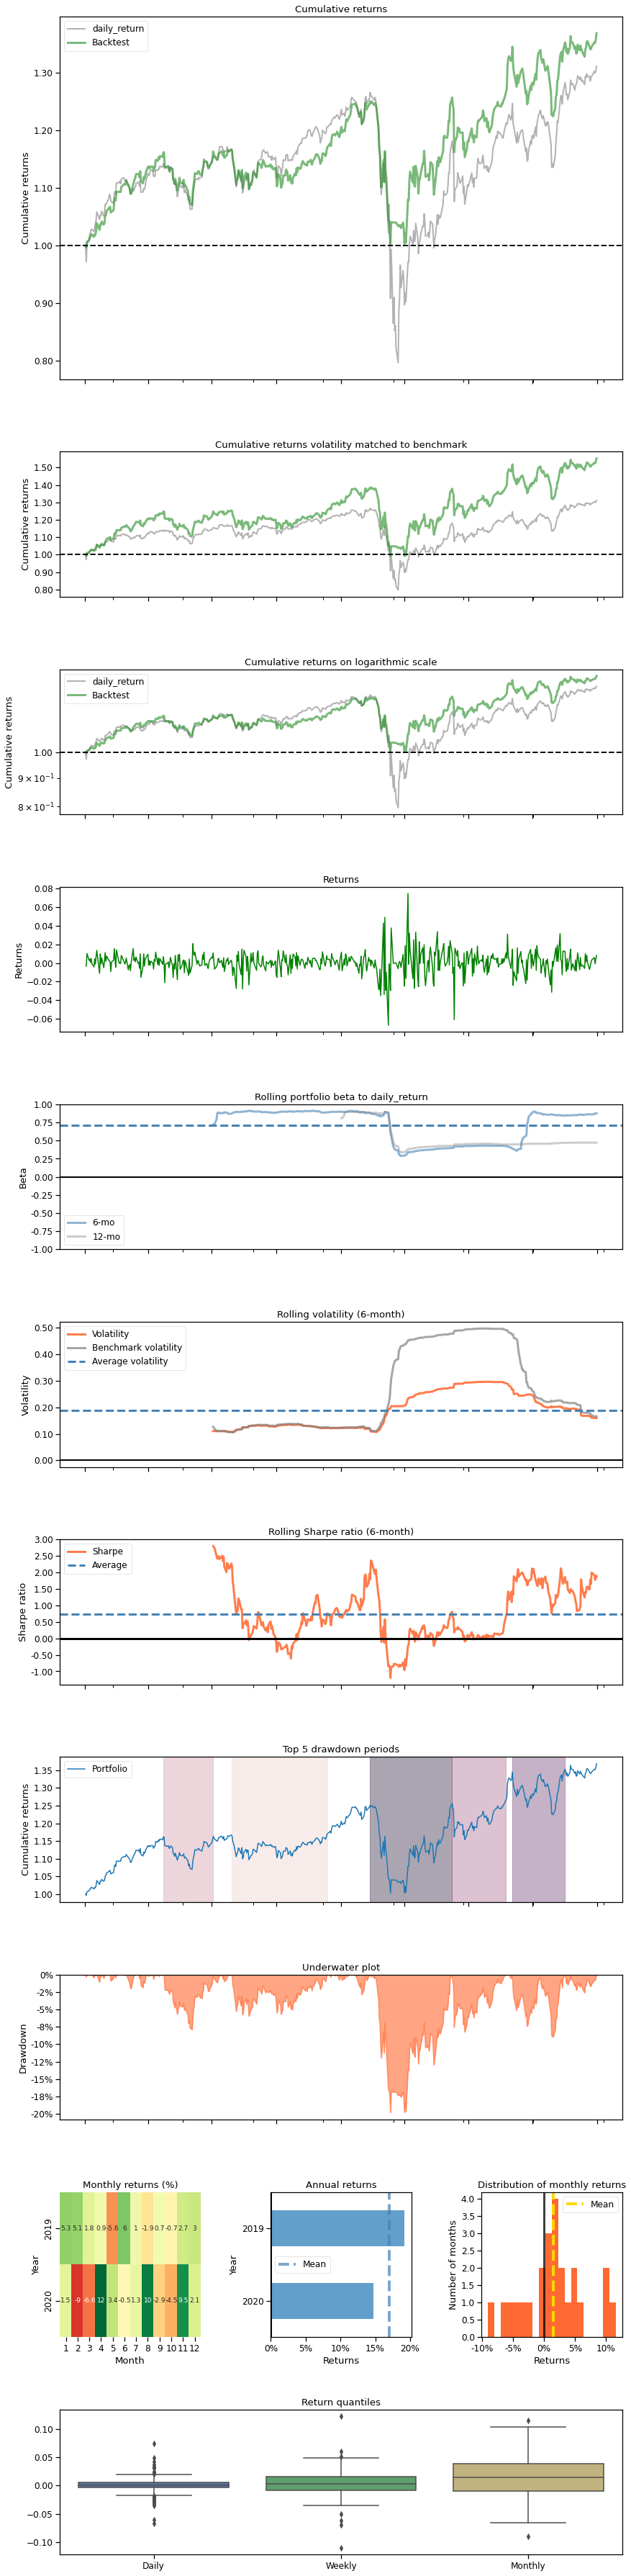

==== dict['sac']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


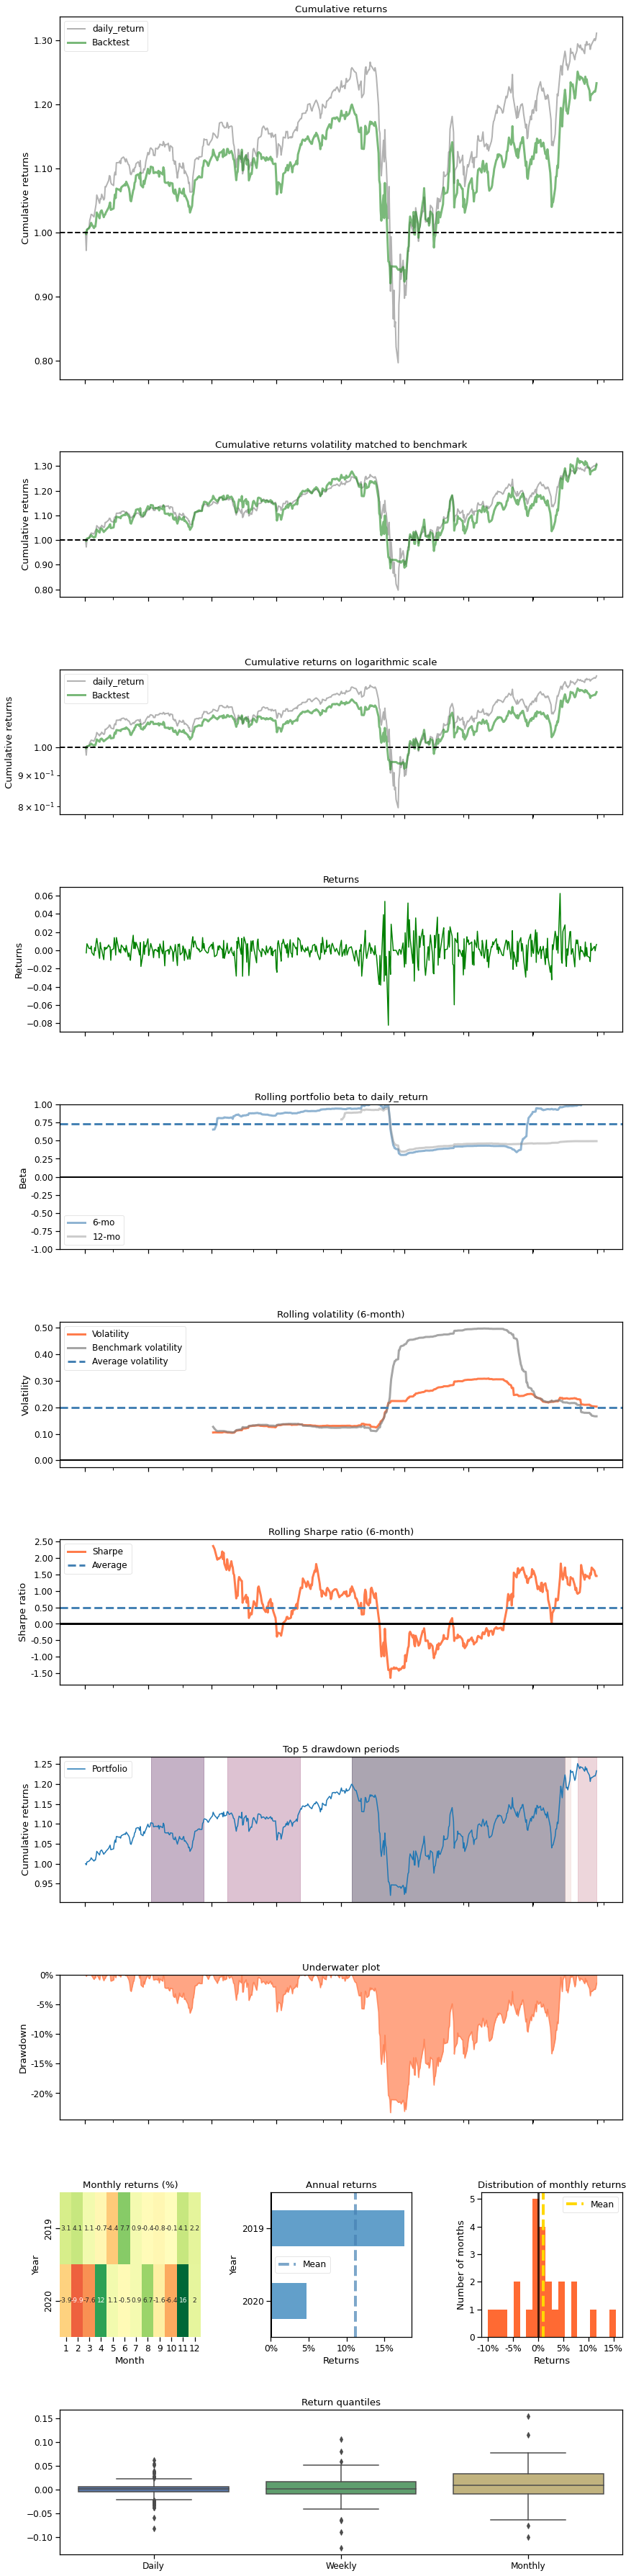

==== dict['td3']====
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (693, 8)


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


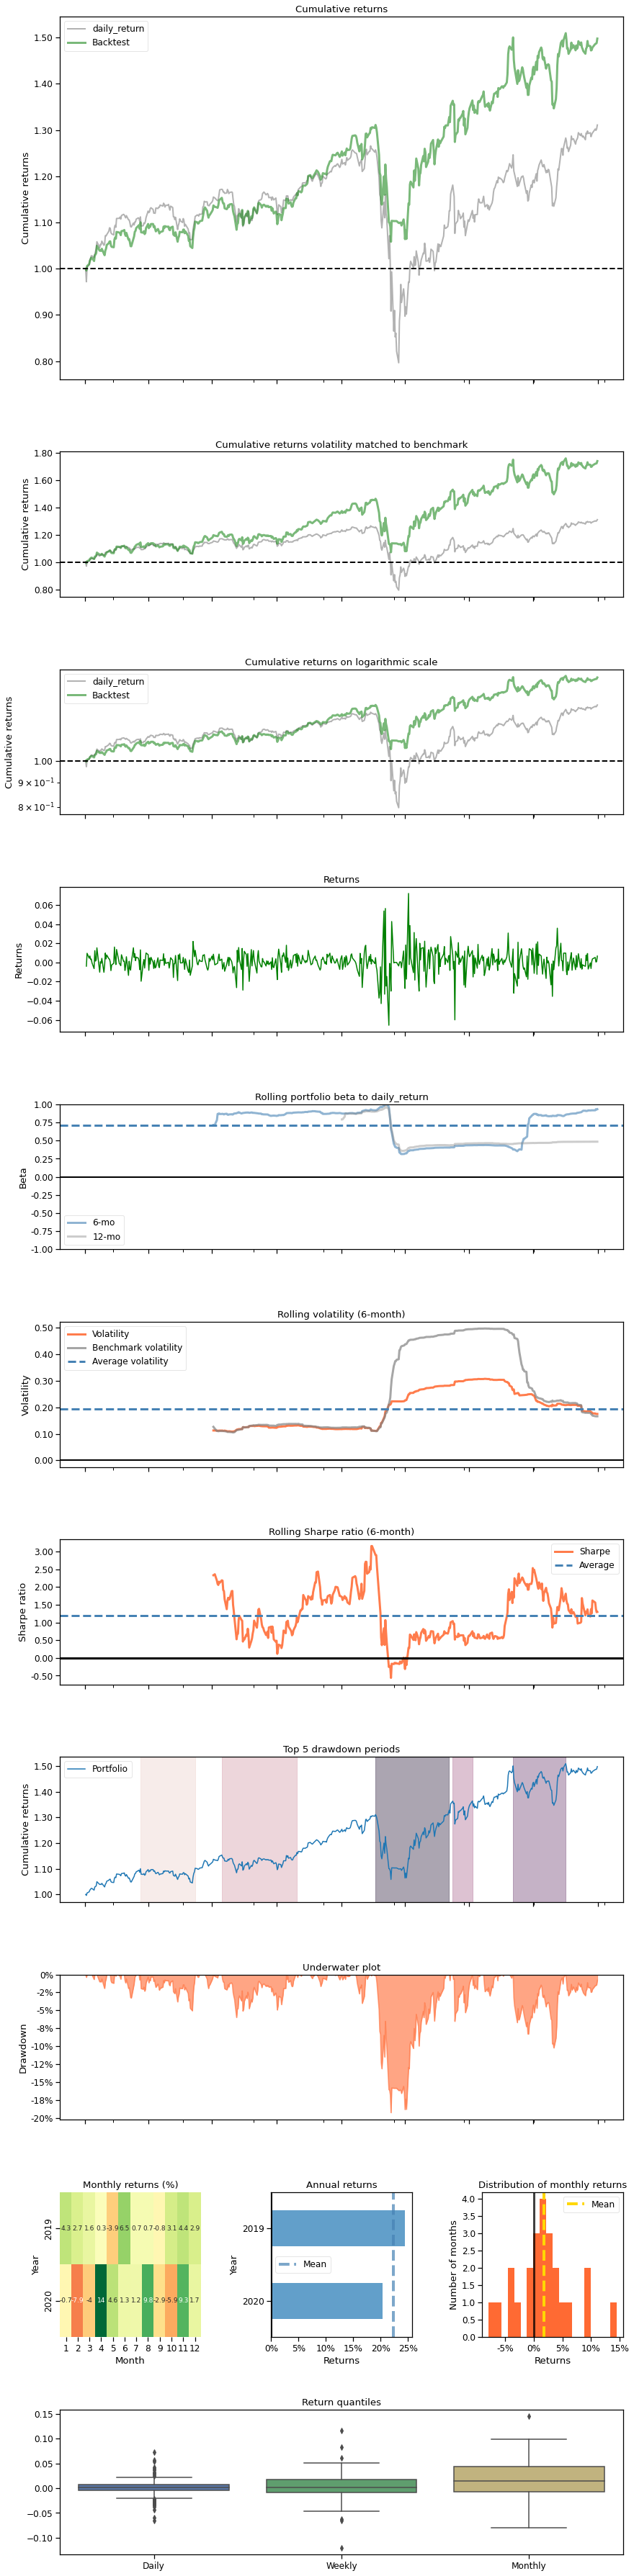

In [ ]:
print("==============Compare to DJIA ===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
print("==== without_indicator_dict['a2c']====")
backtest_plot(df_account_value_without_indicator_dict['a2c'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("==== without_indicator_dict['ppo']====")
backtest_plot(df_account_value_without_indicator_dict['ppo'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("==== without_indicator_dict['ddpg']====")
backtest_plot(df_account_value_without_indicator_dict['ddpg'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("==== without_indicator_dict['sac']====")

backtest_plot(df_account_value_without_indicator_dict['sac'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("==== without_indicator_dict['td3']====")
backtest_plot(df_account_value_without_indicator_dict['td3'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("####################################################")
print("==== dict['a2c']====")
backtest_plot(df_account_value_dict['a2c'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("==== dict['ppo']====")
backtest_plot(df_account_value_dict['ppo'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("==== dict['ddpg']====")
backtest_plot(df_account_value_dict['ddpg'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("==== dict['sac']====")
backtest_plot(df_account_value_dict['sac'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()

print("==== dict['td3']====")
backtest_plot(df_account_value_dict['td3'], 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-10-01')
plt.show()


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (714, 8)
baseline_returns is date
2019-01-02 00:00:00+00:00         NaN
2019-01-03 00:00:00+00:00   -0.028271
2019-01-04 00:00:00+00:00    0.032925
2019-01-07 00:00:00+00:00    0.004190
2019-01-08 00:00:00+00:00    0.010883
                               ...   
2020-12-24 00:00:00+00:00    0.002325
2020-12-28 00:00:00+00:00    0.006758
2020-12-29 00:00:00+00:00   -0.002246
2020-12-30 00:00:00+00:00    0.002436
2020-12-31 00:00:00+00:00    0.006476
Name: daily_return, Length: 505, dtype: float64
[nan, -0.028270913201612125, 0.032924807657456645, 0.004190192550654004, 0.010883337064227172, 0.003853709619388024, 0.005142600969777034, -0.0002487593969330293, -0.0035884963005637927, 0.0065140545071744604, 0.005882686168058537, 0.00673104371075639, 0.013797645696558725, -0.012218281753385907, 0.007012592302226839, -0.00091061413842497, 0.007492248787492217, -0.008447945694135095, 0.002109416537026121, 0

/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


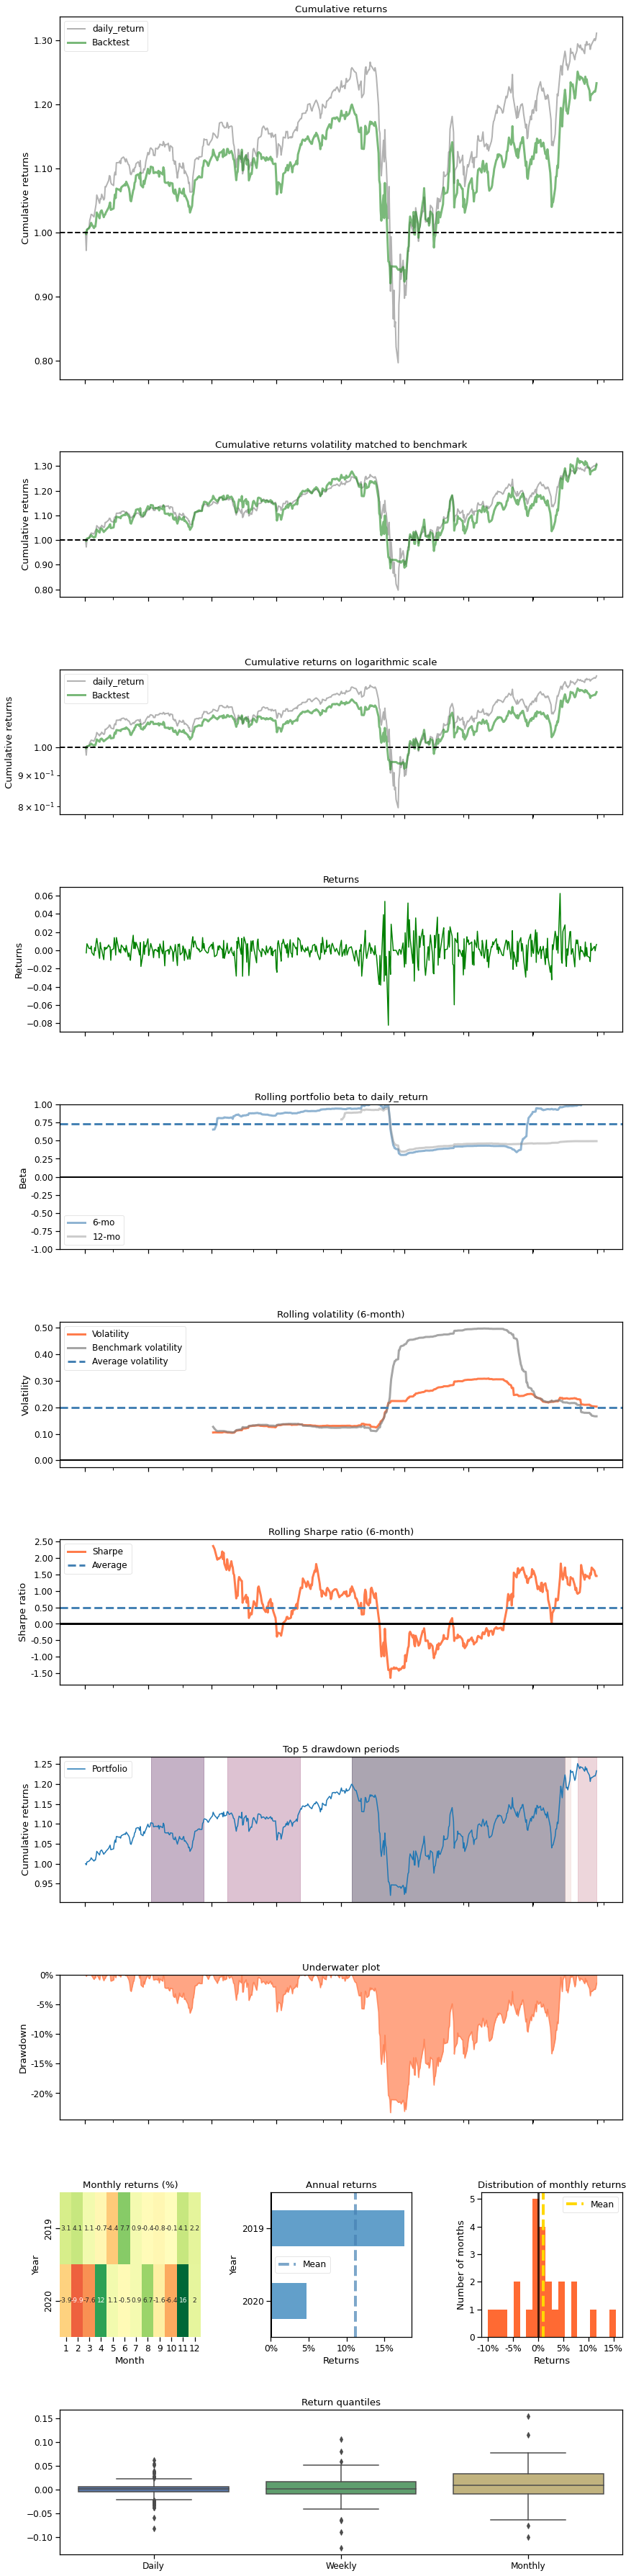

In [ ]:

# for DJIA
from copy import deepcopy
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfolio
from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from pyfolio import timeseries


def get_daily_return(df, value_col_name="account_value"):
    df = deepcopy(df)
    df["daily_return"] = df[value_col_name].pct_change(1)
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True, drop=True)
    df.index = df.index.tz_localize("UTC")
    return pd.Series(df["daily_return"], index=df.index)


def convert_daily_return_to_pyfolio_ts(df):
    strategy_ret = df.copy()
    strategy_ret["date"] = pd.to_datetime(strategy_ret["date"])
    strategy_ret.set_index("date", drop=False, inplace=True)
    strategy_ret.index = strategy_ret.index.tz_localize("UTC")
    del strategy_ret["date"]
    ts = pd.Series(strategy_ret["daily_return"].values, index=strategy_ret.index)
    return ts


def backtest_stats(account_value, value_col_name="account_value"):
    dr_test = get_daily_return(account_value, value_col_name=value_col_name)
    perf_stats_all = timeseries.perf_stats(
        returns=dr_test,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    print(perf_stats_all)
    return perf_stats_all


def backtest_plot(
    account_value,
    baseline_start=config.START_TRADE_DATE,
    baseline_end=config.END_DATE,
    baseline_ticker="^DJI",
    value_col_name="account_value",
):

    df = deepcopy(account_value)
    df["date"] = pd.to_datetime(df["date"])
    test_returns = get_daily_return(df, value_col_name=value_col_name)

    baseline_df = get_baseline(
        ticker=baseline_ticker, start=baseline_start, end=baseline_end
    )

    baseline_df["date"] = pd.to_datetime(baseline_df["date"], format="%Y-%m-%d")
    baseline_df = pd.merge(df[["date"]], baseline_df, how="left", on="date")
    baseline_df = baseline_df.fillna(method="ffill").fillna(method="bfill")
    baseline_returns = get_daily_return(baseline_df, value_col_name="close")
    print("baseline_returns is", baseline_returns)
    print(np.array(baseline_returns).tolist())

    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=test_returns, benchmark_rets=baseline_returns, set_context=False
        )


def get_baseline(ticker, start, end):
    dji = YahooDownloader(
        start_date=start, end_date=end, ticker_list=[ticker]
    ).fetch_data()
    return dji


def trx_plot(df_trade, df_actions, ticker_list):
    df_trx = pd.DataFrame(np.array(df_actions["transactions"].to_list()))
    df_trx.columns = ticker_list
    df_trx.index = df_actions["date"]
    df_trx.index.name = ""

    for i in range(df_trx.shape[1]):
        df_trx_temp = df_trx.iloc[:, i]
        df_trx_temp_sign = np.sign(df_trx_temp)
        buying_signal = df_trx_temp_sign.apply(lambda x: True if x > 0 else False)
        selling_signal = df_trx_temp_sign.apply(lambda x: True if x < 0 else False)

        tic_plot = df_trade[
            (df_trade["tic"] == df_trx_temp.name)
            & (df_trade["date"].isin(df_trx.index))
        ]["close"]
        tic_plot.index = df_trx_temp.index

        plt.figure(figsize=(10, 8))
        plt.plot(tic_plot, color="g", lw=2.0)
        plt.plot(
            tic_plot,
            "^",
            markersize=10,
            color="m",
            label="buying signal",
            markevery=buying_signal,
        )
        plt.plot(
            tic_plot,
            "v",
            markersize=10,
            color="k",
            label="selling signal",
            markevery=selling_signal,
        )
        plt.title(
            f"{df_trx_temp.name} Num Transactions: {len(buying_signal[buying_signal==True]) + len(selling_signal[selling_signal==True])}"
        )
        plt.legend()
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=25))
        plt.xticks(rotation=45, ha="right")
        plt.show()


# dji = YahooDownloader(start_date=baseline_start, 
#                       end_date=baseline_end,
#                       ticker_list=[baseline_ticker]).fetch_data()
# print(dji)


backtest_plot(df_account_value_dict['sac'])

In [ ]:
# 5 algorithms with indicators 

# record results data
print(df_account_value_dict['a2c']["date"].tolist())
print(df_account_value_dict['a2c']["account_value"].tolist())
print(df_account_value_dict['ppo']["account_value"].tolist())
print(df_account_value_dict['ddpg']["account_value"].tolist())
print(df_account_value_dict['sac']["account_value"].tolist())
print(df_account_value_dict['td3']["account_value"].tolist())

print(df_account_value_without_indicator_dict['a2c']["date"].tolist())
print(df_account_value_without_indicator_dict['a2c']["account_value"].tolist())
print(df_account_value_without_indicator_dict['ppo']["account_value"].tolist())
print(df_account_value_without_indicator_dict['ddpg']["account_value"].tolist())
print(df_account_value_without_indicator_dict['sac']["account_value"].tolist())
print(df_account_value_without_indicator_dict['td3']["account_value"].tolist())

print(DJIA)
print("====================================================================================================================")



font =  {'family': 'Times New Roman', 'size': 18} 

plt.figure(figsize=(15,6))
plt.plot(df_account_value_dict['a2c']["date"], df_account_value_dict['a2c']['account_value'], label='a2c')
plt.plot(df_account_value_dict['ppo']["date"], df_account_value_dict['ppo']['account_value'], label='ppo')
plt.plot(df_account_value_dict['ddpg']["date"], df_account_value_dict['ddpg']['account_value'],  label='ddpg')
plt.plot(df_account_value_dict['sac']["date"], df_account_value_dict['sac']['account_value'], label='sac')
plt.plot(df_account_value_dict['td3']["date"], df_account_value_dict['td3']['account_value'], label='td3')
# plt.plot(df_account_value_dict['td3']["date"], DJIA, label='DJIA',color = 'gray')
# df_account_value_ensemble.account_value.plot()
plt.xticks([])
plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


# 5 algorithms without indicators 
plt.figure(figsize=(15,6))
plt.plot(df_account_value_without_indicator_dict['a2c']["date"], df_account_value_without_indicator_dict['a2c']['account_value'], label='a2c without indicator')
plt.plot(df_account_value_without_indicator_dict['ppo']["date"], df_account_value_without_indicator_dict['ppo']['account_value'], label='ppo without indicator')
plt.plot(df_account_value_without_indicator_dict['ddpg']["date"], df_account_value_without_indicator_dict['ddpg']['account_value'],  label='ddpg without indicator')
plt.plot(df_account_value_without_indicator_dict['sac']["date"], df_account_value_without_indicator_dict['sac']['account_value'], label='sac without indicator')
plt.plot(df_account_value_without_indicator_dict['td3']["date"], df_account_value_without_indicator_dict['td3']['account_value'], label='td3 without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"], DJIA, label='DJIA',color = 'gray')

plt.xticks([])
plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()



# 5 algorithms without indicators 
plt.figure(figsize=(15,6))
plt.plot(df_account_value_dict['a2c']["date"], df_account_value_dict['a2c']['account_value'], label='a2c')
plt.plot(df_account_value_dict['ppo']["date"], df_account_value_dict['ppo']['account_value'], label='ppo')
plt.plot(df_account_value_dict['ddpg']["date"], df_account_value_dict['ddpg']['account_value'],  label='ddpg')
plt.plot(df_account_value_dict['sac']["date"], df_account_value_dict['sac']['account_value'], label='sac')
plt.plot(df_account_value_dict['td3']["date"], df_account_value_dict['td3']['account_value'], label='td3')

plt.plot(df_account_value_without_indicator_dict['a2c']["date"], df_account_value_without_indicator_dict['a2c']['account_value'], label='a2c without indicator')
plt.plot(df_account_value_without_indicator_dict['ppo']["date"], df_account_value_without_indicator_dict['ppo']['account_value'], label='ppo without indicator')
plt.plot(df_account_value_without_indicator_dict['ddpg']["date"], df_account_value_without_indicator_dict['ddpg']['account_value'],  label='ddpg without indicator')
plt.plot(df_account_value_without_indicator_dict['sac']["date"], df_account_value_without_indicator_dict['sac']['account_value'], label='sac without indicator')
plt.plot(df_account_value_without_indicator_dict['td3']["date"], df_account_value_without_indicator_dict['td3']['account_value'], label='td3 without indicator')


# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',)

plt.xticks([])
plt.legend(prop=font,loc=[1.01, 0])
plt.tick_params(labelsize=18) 
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()

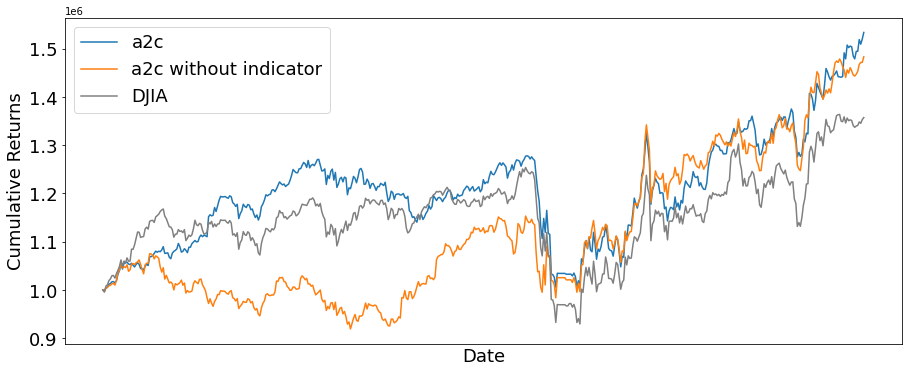

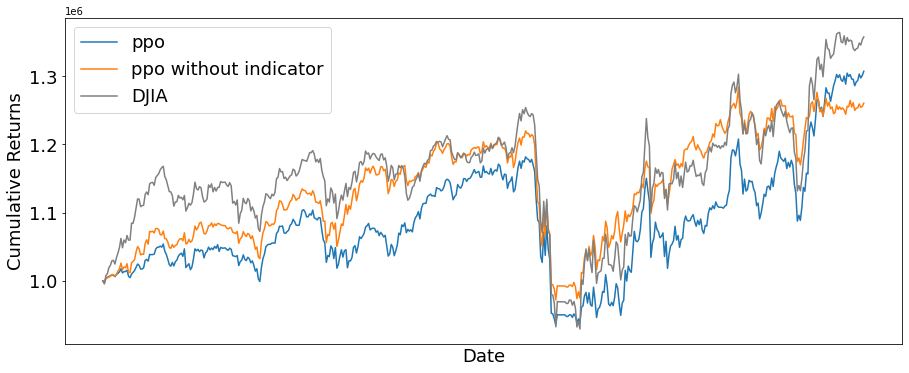

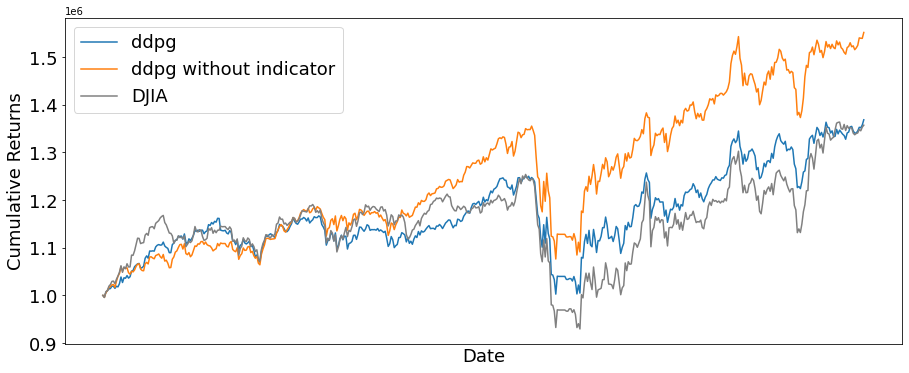

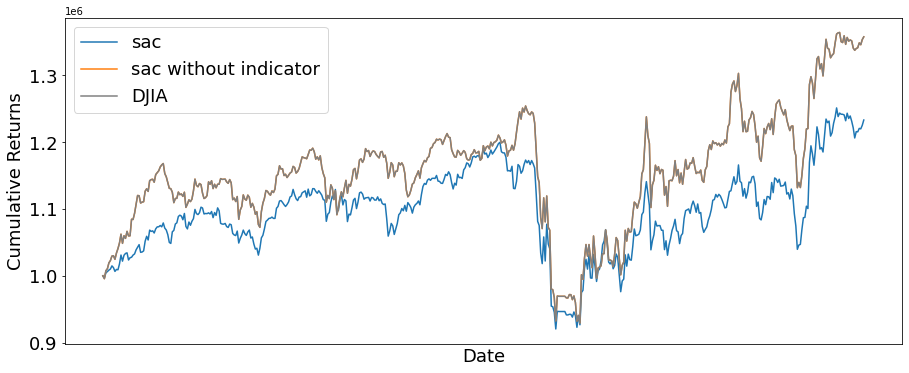

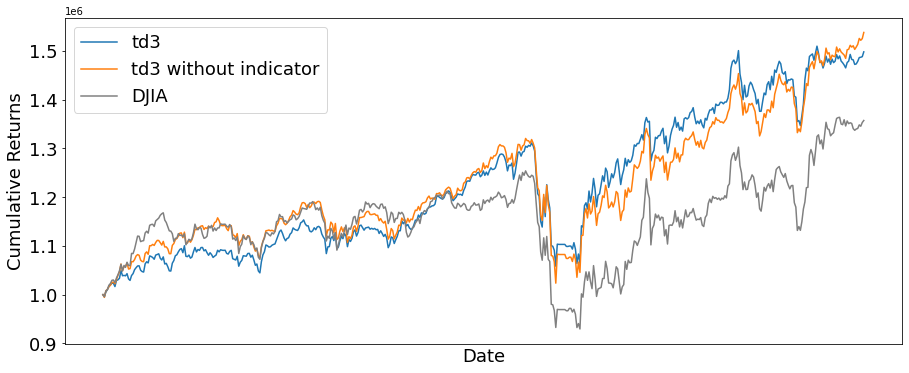

In [ ]:
# compare indicators and no indicators
plt.figure(figsize=(15,6))
plt.plot(df_account_value_dict['a2c']["date"], df_account_value_dict['a2c']['account_value'], label='a2c')
plt.plot(df_account_value_without_indicator_dict['a2c']["date"], df_account_value_without_indicator_dict['a2c']['account_value'], label='a2c without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


plt.figure(figsize=(15,6))
plt.plot(df_account_value_dict['ppo']["date"], df_account_value_dict['ppo']['account_value'], label='ppo')
plt.plot(df_account_value_without_indicator_dict['ppo']["date"], df_account_value_without_indicator_dict['ppo']['account_value'], label='ppo without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


plt.figure(figsize=(15,6))
plt.plot(df_account_value_dict['ddpg']["date"], df_account_value_dict['ddpg']['account_value'], label='ddpg')
plt.plot(df_account_value_without_indicator_dict['ddpg']["date"], df_account_value_without_indicator_dict['ddpg']['account_value'], label='ddpg without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


plt.figure(figsize=(15,6))
plt.plot(df_account_value_dict['sac']["date"], df_account_value_dict['sac']['account_value'], label='sac')
plt.plot(df_account_value_without_indicator_dict['sac']["date"], df_account_value_without_indicator_dict['sac']['account_value'], label='sac without indicator')
# plt.plot(df_account_value_without_indicator_dict['sac']["date"], DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


plt.figure(figsize=(15,6))
plt.plot(df_account_value_dict['td3']["date"], df_account_value_dict['td3']['account_value'], label='td3')
plt.plot(df_account_value_without_indicator_dict['td3']["date"], df_account_value_without_indicator_dict['td3']['account_value'], label='td3 without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()

In [ ]:
# backtest_multi_plot(
#     df_account_value_dict['a2c'],
#     df_account_value_dict['ppo'],
#     df_account_value_dict['ddpg'],
#     df_account_value_dict['sac'],
#     df_account_value_dict['td3'],
#     df_account_value_ensemble,
#     baseline_start=config.START_TRADE_DATE,
#     baseline_end=config.END_DATE,
#     baseline_ticker="^DJI",
#     value_col_name="account_value",
# )

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


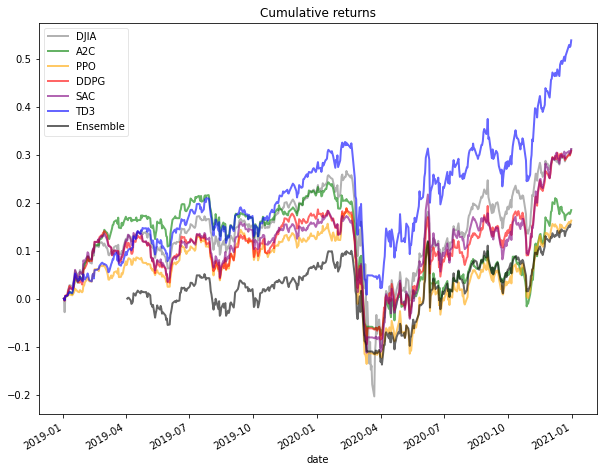

In [ ]:
# backtest_multi_plot(
#     df_account_value_without_indicator_dict['a2c'],
#     df_account_value_without_indicator_dict['ppo'],
#     df_account_value_without_indicator_dict['ddpg'],
#     df_account_value_without_indicator_dict['sac'],
#     df_account_value_without_indicator_dict['td3'],
#     df_account_value_ensemble,
#     baseline_start=config.START_TRADE_DATE,
#     baseline_end=config.END_DATE,
#     baseline_ticker="^DJI",
#     value_col_name="account_value",
# )

In [ ]:
# Easy to learn
# Data is 
date = ['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-05', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13', '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22', '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31']
a2c = [1000000.0, 997440.9769587024, 1004205.1107296603, 1006233.8909020656, 1012022.5677255443, 1013289.9557058641, 1016995.9919043886, 1017395.9788376999, 1014280.9053112947, 1019133.5870732118, 1032738.63670533, 1040199.246952038, 1053538.7976235086, 1043425.2270658686, 1055411.1661890529, 1056187.034041798, 1057632.2344950868, 1053800.0789779704, 1052438.944398518, 1055422.9940339625, 1051193.6385747187, 1047657.536072552, 1052919.914796925, 1056372.8297585032, 1052998.0198013384, 1044432.4952572902, 1043353.0029057277, 1041924.5367759707, 1049364.7616305698, 1053269.6370970919, 1050638.7710846828, 1068928.83789761, 1069105.1944591946, 1070981.5365627941, 1075646.3576382983, 1080435.77412439, 1078190.1840869563, 1080238.8136389048, 1079403.6599431958, 1082951.171377003, 1089744.2602606548, 1075820.9923506207, 1076244.8660456927, 1076924.7812487872, 1067829.7881161235, 1064726.8458663526, 1076206.146114319, 1080065.2927583316, 1082060.281866753, 1085194.3399120907, 1096403.2911383556, 1089513.8576897166, 1078429.2533607867, 1080058.0563691373, 1085505.2838076823, 1082090.928972172, 1077222.7222469219, 1088646.5549450344, 1088585.1623799594, 1096092.2530587735, 1099176.6697975392, 1102538.502537537, 1099497.1491297153, 1100306.998945084, 1109429.4336914676, 1113783.568289246, 1110473.7924218297, 1113363.0719056248, 1112276.2103251729, 1110285.1361101153, 1151700.1407391438, 1155852.3287098545, 1153495.2681095737, 1154798.3466614536, 1170899.0273202672, 1162702.5644102406, 1174030.1086919636, 1186013.6861093563, 1194002.8555978015, 1192808.8903963969, 1193048.1319046894, 1193626.7120760835, 1191569.415815021, 1189944.791286529, 1195105.5306503405, 1193183.8258410294, 1181096.3746413111, 1178017.064640655, 1173184.701807605, 1177573.5024056125, 1147896.8323424181, 1158113.9424625658, 1163963.7385111423, 1177615.3047037157, 1173258.9447365946, 1170774.9454642711, 1177127.330267696, 1175720.3173877597, 1166151.6301646305, 1167807.9823383137, 1157279.6743246876, 1150248.427911098, 1155433.431945064, 1144878.5920600926, 1153063.4680248294, 1172515.398443233, 1178170.5491877398, 1186335.0124797702, 1197304.6809286838, 1195003.1329524494, 1197540.4332980916, 1198560.9414052693, 1207125.8291286312, 1207661.9791158445, 1203702.6957924268, 1209586.916565704, 1216858.7581871029, 1223945.6015588604, 1220420.065442535, 1217708.5992581747, 1219586.848165386, 1214381.8381471515, 1217258.123731342, 1219427.547394367, 1227443.7765228497, 1237478.8789179914, 1249637.3569509198, 1246099.2650319745, 1242956.5479385564, 1242880.8114641376, 1251118.5931789814, 1251234.698085796, 1258246.034602779, 1264206.131220806, 1261241.702179054, 1253832.1588532522, 1268356.7979031864, 1253075.1050050848, 1258244.7524529148, 1260337.763767307, 1257474.0531944043, 1262852.9561695936, 1270084.8311709058, 1270685.713716377, 1258911.5403318936, 1246691.1403608853, 1247287.4212765195, 1250897.6017235029, 1218574.0777585295, 1237406.701080589, 1230950.4191744612, 1246203.9365641705, 1250505.1385870283, 1227564.9179221035, 1243673.9482938305, 1212485.6366796452, 1219686.9063142391, 1230588.1964612424, 1233507.2393922918, 1224000.5596443478, 1233871.7716682812, 1232270.7887356945, 1197351.2870012166, 1211696.9490571858, 1209794.560129726, 1221539.9910782583, 1235251.9877785451, 1231484.0650633771, 1222097.7175444562, 1234527.6246647069, 1249655.893883846, 1251824.7445079305, 1244189.1620503843, 1218763.423172401, 1219498.5019382702, 1229684.2036518322, 1223976.7116854398, 1210607.3181574324, 1219684.674154842, 1220678.3871461828, 1214375.739704666, 1206416.724129257, 1214306.6355965573, 1214056.370719238, 1220909.2244670407, 1218635.8388469236, 1216398.0587031858, 1223237.9513475797, 1201739.196426704, 1183430.075081268, 1189910.1657124592, 1204728.8061422422, 1201630.6731084897, 1187777.180413635, 1197590.5352033689, 1198867.1888255957, 1199043.433063774, 1196617.716392246, 1197322.639814079, 1199917.5295993725, 1191940.951475494, 1189676.4508631283, 1194109.252227722, 1164139.1733177335, 1160411.456396362, 1150346.1585982053, 1151865.2795989949, 1144722.007974037, 1140470.7093625409, 1154070.986766754, 1152607.7594413145, 1156112.4786948545, 1146012.5462149961, 1151260.6601722562, 1158901.59333876, 1163242.3219535672, 1174941.955323013, 1167597.9936988675, 1172747.449616226, 1195534.2266853177, 1190547.8901029432, 1185328.8095035702, 1190774.6232679135, 1191820.7943585354, 1188478.1709272992, 1183019.6637013967, 1188986.752403549, 1192281.491527847, 1201096.4888257787, 1206580.401713352, 1205384.6209020421, 1198259.8406535184, 1186635.4500399625, 1191580.8126498258, 1189356.9065333402, 1198516.9988909757, 1194392.8185783955, 1195634.6161681667, 1196873.6442176357, 1206290.566399368, 1210118.3752422102, 1215169.4939632185, 1212869.4950465926, 1205363.3986339339, 1210530.7398586043, 1214326.5182857283, 1204943.3876651227, 1207290.7588527068, 1210566.5813647, 1213844.7279905088, 1203413.3122734753, 1208337.0378671032, 1228592.6303888394, 1220130.3967920376, 1223521.5258165433, 1221960.1380525662, 1235274.8018352964, 1245758.6734912144, 1239936.8976467473, 1238847.0207324293, 1244301.0724676626, 1251654.3590492818, 1259093.7948730045, 1263527.295661041, 1258289.4503844755, 1263338.0721106527, 1259420.6715588795, 1254707.245922588, 1231702.3615491597, 1243681.6773085133, 1247631.2990230215, 1259300.271557781, 1248477.5598420827, 1262314.2133607594, 1269435.9253325001, 1268784.661675655, 1266766.6747753255, 1256435.6838931348, 1265466.5153598096, 1270418.1051272657, 1277342.379053047, 1277973.1110961186, 1276703.3226172673, 1271425.381605995, 1275958.133555019, 1271435.9238287464, 1268273.9704023853, 1235578.7045582081, 1205605.317015125, 1183429.5078929632, 1131809.1161693304, 1106668.5644954413, 1148342.4066200445, 1119376.3019017752, 1165081.5917996939, 1117333.0479138943, 1115224.8688789327, 1032898.5637358968, 1031854.1654504964, 1026256.5389743154, 1005832.6611598167, 1034619.7717640189, 1034284.7447007294, 1034284.7447007294, 1034284.7447007294, 1034284.7447007294, 1034284.7447007294, 1032695.2816856804, 1032597.0800525014, 1032813.4792618633, 1032720.5193379819, 1029108.5794281955, 1035059.2060278506, 1027367.9920604054, 1007063.7634635465, 1018990.089460098, 1012017.6901805648, 1064493.3767218664, 1059015.1952303655, 1086407.8576952398, 1102433.7833026312, 1085533.940452484, 1109103.3035980565, 1082650.6050093267, 1079177.704956722, 1119640.3140973852, 1095595.6638321036, 1063669.4821933326, 1084742.9775574836, 1079930.4584917868, 1089981.8961092376, 1109671.166022724, 1110863.508532856, 1134731.5933535232, 1115478.6778496855, 1086316.8501449546, 1081954.397636608, 1081215.2301769066, 1070046.0178519173, 1090867.979911831, 1111099.94944067, 1103070.8288280067, 1077735.5606253205, 1047976.7862550011, 1069540.294637394, 1067797.5501464347, 1119614.5630286674, 1105526.495644535, 1134560.474869709, 1134188.7924864083, 1132393.9144364968, 1158909.5547070235, 1190307.1290092696, 1178737.1680823592, 1169618.5892122078, 1183168.7022087746, 1192671.4014349899, 1238515.9906171493, 1250717.4732136307, 1286726.983740448, 1327259.3083047334, 1297149.9879615288, 1265754.4979972115, 1177519.9324430085, 1205537.086892437, 1217164.5832225876, 1231065.5434307365, 1223757.054912838, 1220086.013356678, 1199917.191692341, 1201856.829364708, 1200357.5606674042, 1168320.3362328415, 1171911.9044328842, 1143000.585077343, 1163191.2600287134, 1171215.917077862, 1170003.8043305473, 1166307.275182228, 1192795.533369629, 1172175.7595665513, 1180038.603736168, 1165918.8273918687, 1185617.1963570176, 1180169.3536064683, 1210597.3011848985, 1225967.101493126, 1220407.9855568467, 1216498.5188301087, 1212268.6577024194, 1225009.941155674, 1245328.3123299256, 1234986.9174706116, 1232922.7270027772, 1235445.2801145974, 1215816.1265121307, 1222040.0327845688, 1213368.4970179673, 1208516.8138514634, 1208473.4136515732, 1221853.908782711, 1254349.6441342735, 1272066.8125074196, 1285522.1503342248, 1290099.6885651208, 1300934.2223938562, 1301989.8186844445, 1298242.3490580483, 1297740.1516117898, 1288993.4667668191, 1289235.7681774942, 1281847.680477604, 1282083.5335697976, 1282613.2788728867, 1305348.6008517572, 1304007.0127917023, 1310723.0446970367, 1322331.8704218827, 1334527.6259754945, 1322457.9048008577, 1324582.6894459382, 1348248.6753544465, 1332178.8929027559, 1327064.2154194033, 1329145.7327839662, 1334334.1240879823, 1332849.8914442826, 1334919.3404769518, 1350455.152534447, 1350961.704727135, 1360192.8578796007, 1346124.1533766824, 1331247.5779035836, 1297778.3655699044, 1302795.3000565225, 1279792.5914345284, 1280881.7633934517, 1292622.0845070381, 1312484.452739586, 1300347.3389923212, 1305701.4464218256, 1305573.2319812127, 1313405.9710733376, 1334486.128761036, 1317761.7639696428, 1336440.02591346, 1346082.547657467, 1348425.6776969263, 1353277.8798709717, 1358280.19129982, 1351226.4778709412, 1358578.766926674, 1358477.4852623215, 1335033.1124041977, 1349695.9037478867, 1361285.0996325912, 1375097.418182129, 1367742.8117650568, 1329232.7541199266, 1316252.702903801, 1275859.4556229897, 1284993.6773789711, 1276849.6248162615, 1281291.5313989182, 1312991.4282314721, 1306849.0355221978, 1324904.9910428277, 1323315.2766187058, 1407315.0533482744, 1405790.0131335298, 1395731.3164134065, 1372212.5377192537, 1391437.453326706, 1428177.483783249, 1419485.9898600618, 1410889.9428280832, 1403265.2989678308, 1396029.2984058456, 1425150.0943024445, 1459052.635791092, 1451605.2355683136, 1441638.3962128449, 1434979.460047989, 1442476.8821137238, 1444309.5219147492, 1448197.7976563263, 1453854.1005432892, 1442171.2020752716, 1441551.2337525177, 1440894.0789521027, 1442215.9474060822, 1491459.3499481964, 1479002.306063919, 1507543.613864212, 1502313.0497620392, 1505420.5603058625, 1503851.0075714875, 1484918.8951752472, 1478908.1027100373, 1494445.1939881134, 1494634.9052002716, 1518869.6610749054, 1509460.050784378, 1520104.3131134796, 1533644.7727692414]
ppo = [1000000.0, 998032.1013985445, 1003706.3288873599, 1005179.9895450176, 1006607.04892516, 1007665.5520841487, 1008646.4138762513, 1008238.9188910142, 1006228.876940895, 1009270.4924007454, 1011049.0772827719, 1013328.6288505476, 1017733.1452214239, 1011679.9986575925, 1013604.4145650668, 1013712.6675475193, 1015645.872443302, 1006846.0579035375, 1004724.6574855001, 1009997.4793415372, 1012380.6530715635, 1015204.4340383376, 1019857.1501960256, 1024694.2820738715, 1022712.3320889471, 1017339.8076049765, 1017381.6999630086, 1019173.6220424268, 1029948.6796191481, 1031514.2698517265, 1028977.8581333349, 1038675.5408997342, 1038436.5251867484, 1038552.7965864446, 1039058.1175735052, 1046468.7017150343, 1049223.0401795958, 1049314.1428828659, 1050868.3312625044, 1049358.465345123, 1053951.9061428832, 1043513.5227619093, 1038886.2057038611, 1031794.0054647864, 1023786.2236473769, 1021512.2803376159, 1026987.7878563155, 1021887.0397714269, 1027955.6980437773, 1030451.296083164, 1036109.3257487181, 1039049.0339618872, 1040606.7130682486, 1035938.1641140097, 1046913.7541210479, 1019498.9045583953, 1022189.518611309, 1025067.8332173957, 1016337.3058831367, 1020388.0402383156, 1032287.0135108071, 1046842.9722124748, 1044053.1987448425, 1046264.7760295831, 1042759.7790540963, 1045188.0813846703, 1044456.9535131989, 1033659.3685478898, 1040922.7777041016, 1043252.8999630547, 1049432.5980885888, 1045336.2332666245, 1048049.2129540634, 1045848.8691194498, 1050459.2335079424, 1047734.2335069313, 1052981.94595068, 1043060.9557592775, 1049007.8944075243, 1047958.9279946365, 1047910.0338891448, 1048393.3766162036, 1046112.3297288821, 1044782.3601168788, 1047920.7936538585, 1046175.265734139, 1036810.2280357557, 1036415.447665303, 1035443.220948464, 1037102.216088616, 1022443.3817217526, 1028316.7913936544, 1030380.2798239635, 1038102.6995126081, 1031594.2645201611, 1029687.0165322078, 1034583.9637105793, 1032465.333217976, 1026527.152632256, 1029262.7063925213, 1022809.04561303, 1014280.2316119045, 1017715.3069405863, 1002823.7613045619, 999058.2563832515, 1019549.4733735775, 1032232.0408504832, 1039089.658375603, 1050135.5051799396, 1052500.5031342702, 1053696.436537003, 1053571.5957390752, 1055322.1440304837, 1055583.8571313939, 1055120.770015534, 1069468.5579413304, 1072201.8081623425, 1080099.2092382552, 1079515.2803447044, 1080478.1347257658, 1070336.8197188613, 1069581.0456968353, 1072161.2130291334, 1074067.5266885841, 1081266.512820504, 1083610.2940404403, 1090154.124076798, 1086748.312293328, 1081666.3040901993, 1081289.4129840056, 1081560.6496667068, 1092313.9651589096, 1103162.135739991, 1104197.189888276, 1100544.151390271, 1093555.9296382111, 1094002.761650441, 1098181.7442717676, 1096279.068075013, 1103682.6851307878, 1092455.9050546691, 1091135.4587096795, 1089225.9832926798, 1092718.77791623, 1092119.4104506653, 1074746.0865448618, 1060221.1665642099, 1055446.5837404602, 1027120.894899022, 1037219.2385654114, 1035548.9801000947, 1051143.676209523, 1047377.9352034349, 1032742.6913224992, 1048858.887870881, 1018570.2662170687, 1024196.8816382799, 1036191.1248614587, 1045574.352725892, 1034831.6379861612, 1044022.6098666353, 1045672.492655488, 1019197.3632383508, 1029455.8103303766, 1029244.5699808206, 1034144.4981941615, 1049089.0037324077, 1051562.9623844118, 1040741.760941392, 1050681.9248707017, 1064586.5476273738, 1061958.2923953182, 1065348.4421837702, 1069361.2906324244, 1078805.1724410069, 1080622.6209933637, 1084145.0059799436, 1074538.2770210088, 1076499.8326400653, 1077347.8796435064, 1076587.4327604459, 1071308.8108750088, 1073289.0785493557, 1066306.5309736112, 1071108.4717910816, 1067939.4663265164, 1064335.4526611874, 1066745.5025682002, 1051731.4537390415, 1036307.2000259296, 1039477.5496891033, 1053385.8866378528, 1049249.9132394574, 1036887.3963857357, 1043893.0538914272, 1052379.3743148511, 1069957.4952441952, 1067539.410270879, 1081934.9532979443, 1079581.6812872747, 1084851.7152964529, 1070505.9860277036, 1075444.988934461, 1072784.5397810186, 1074874.8557302868, 1071730.6318556226, 1085486.5824564602, 1092436.7872696316, 1095601.8252172903, 1101453.7908855947, 1090739.2930803464, 1106179.8423669522, 1112825.4469370742, 1113728.5390332998, 1113325.3869983724, 1123263.8165099805, 1125114.460947904, 1127158.8963078093, 1124303.2369719748, 1125024.9468518042, 1123470.1887352653, 1136691.6612985893, 1134968.541829778, 1134806.9968253798, 1131714.5226821494, 1133150.3050701728, 1138137.1357484986, 1146686.0059756103, 1148885.7996239716, 1147532.1034801726, 1143864.9214731194, 1130952.9947534157, 1118738.4996885925, 1123502.19675699, 1126075.073242105, 1141081.077410959, 1137409.413037233, 1135680.8387925355, 1140072.7164060913, 1149824.5529703004, 1149539.5328756464, 1145626.0589952294, 1149561.3132002542, 1149949.0930790612, 1152973.7104596535, 1158044.9901310976, 1162960.1833610628, 1157833.3326461082, 1159169.2110768259, 1160261.8496322685, 1151564.8514011896, 1152161.0302627466, 1168286.3015708749, 1158470.8889499947, 1160288.136936815, 1157506.468310476, 1156395.4434174364, 1164680.7235809076, 1155133.4650717867, 1160173.8113558444, 1162450.9561715105, 1160639.7171586016, 1170970.9330571077, 1168273.511123041, 1155364.5642011203, 1147942.9414853533, 1156329.8397380428, 1155516.1281038914, 1135519.891482603, 1143925.0213950481, 1146429.2355905513, 1152230.521282175, 1130334.7958182583, 1133944.2246209164, 1149707.1586582928, 1166075.7454931813, 1175323.555108305, 1164789.0914015865, 1175911.6545532246, 1173877.5664840604, 1181563.2581780034, 1178763.4535771352, 1177770.9141155912, 1173715.2788399716, 1178034.2782645246, 1169966.0082551634, 1160134.8215691436, 1119409.0198121474, 1089236.1171623748, 1085770.777983946, 1035973.1429816228, 1027026.5120158903, 1071505.2699802953, 1037458.9109617751, 1080561.3499849227, 1046336.2683035643, 1031579.171823252, 952648.9848987906, 951696.3568782371, 944503.1564153999, 935522.7030060107, 950469.2483000476, 950280.0144483439, 950280.0144483439, 950280.0144483439, 950280.0144483439, 950280.0144483439, 947987.3562507846, 947923.7240582111, 950281.3315760104, 950215.9858004292, 946501.0042360716, 951719.7706980505, 948219.1302730172, 938665.9539771493, 944282.4225581813, 938751.3563373333, 961394.6147677611, 963411.3662832029, 978065.7336075245, 983146.791740936, 967569.4478823545, 982595.9113536524, 965074.8382909044, 962972.7209029954, 990755.7948720696, 970981.0492936051, 946309.7675662835, 959083.4481165154, 961216.5923388322, 968900.2649121583, 984439.1854142717, 983150.9031422609, 1009164.0523600953, 993449.488205745, 966252.7489262955, 963409.4186617311, 968635.5898725083, 963691.4258240388, 975922.1026921495, 995877.8631558259, 989719.8685300325, 966985.1016004517, 949489.7429276841, 967353.2245566742, 971790.5183305428, 1015418.0366385072, 999751.8028530686, 1021625.3076297638, 1015106.510396499, 1012603.5557457306, 1042102.4434877313, 1072492.5409456706, 1058761.6940540995, 1057287.5629138902, 1060889.5822099452, 1074931.7450338625, 1100767.5080283463, 1105563.4156637185, 1134621.369609138, 1150206.2718278803, 1132258.7353560938, 1116310.389558082, 1034360.829024734, 1055098.3551384958, 1062701.372023086, 1085995.3899715533, 1075360.443736259, 1071954.4286484828, 1063215.7063556628, 1065438.0255468134, 1070213.4938641354, 1035735.4968488994, 1057984.149226829, 1018341.14382727, 1038895.0520123668, 1050801.4385617785, 1053844.9893179468, 1059103.5483774142, 1079985.0679891924, 1059811.8215541644, 1066366.1002999607, 1049056.4394917828, 1060659.4402094416, 1062219.8801148639, 1086298.5878569789, 1094951.656398933, 1088420.7215444255, 1087598.9746531558, 1088553.407252666, 1093685.8589870334, 1096965.8637289882, 1086967.272239822, 1079990.862416927, 1088695.9847928197, 1082250.7637056462, 1090663.0300625951, 1074582.1769430158, 1069430.2940345798, 1081253.6291368594, 1080226.8230068774, 1098553.067696159, 1106925.3734541393, 1104182.3685463024, 1109987.8507785564, 1105773.48786993, 1115608.6314410893, 1109972.2364359165, 1107741.4277631147, 1107807.040536102, 1107672.0054858548, 1106439.0724253843, 1109551.40908765, 1110645.456273464, 1124519.3030506629, 1132833.8291036412, 1179858.4733911436, 1191914.053241249, 1190822.105093296, 1183090.1900695188, 1194691.4755497586, 1207746.8696413229, 1171214.2574071882, 1161923.2066456298, 1127143.7342184905, 1149026.0517048454, 1131430.3090539626, 1134133.040901779, 1147241.4530052831, 1145108.625081623, 1145746.7244444503, 1135116.2243376884, 1129283.9463333664, 1110131.1043501587, 1113968.6771492194, 1090760.5842771225, 1098951.8098432198, 1111919.5606011848, 1126831.6561904869, 1123868.1397311783, 1137702.6040167122, 1138876.6098810884, 1133465.8417699814, 1150736.239151848, 1138254.6065883941, 1157201.3278538971, 1166883.655300026, 1174504.191353775, 1189719.2825262528, 1180016.4112230302, 1177384.7836503717, 1174999.4181848946, 1179648.285015957, 1164473.307408375, 1173549.0076163064, 1166662.4842104302, 1176634.9977997018, 1169728.8203636247, 1141676.6791009712, 1128251.8481900522, 1087499.4478342438, 1096010.7539028816, 1088609.9464314005, 1108081.8330326271, 1136771.8353276483, 1131294.4448947755, 1157748.7911212617, 1156616.2617830278, 1221396.4083168223, 1232552.8237792016, 1224033.326665188, 1212173.2021328087, 1236093.2295954134, 1265452.3991195336, 1264182.8088953895, 1248857.6632246056, 1254183.1700230525, 1240830.7944307216, 1260453.0700045472, 1282788.6667642442, 1275164.0621000445, 1275008.3655120165, 1262767.7979962733, 1274657.988235943, 1285772.451373051, 1292789.3607230037, 1302238.199318207, 1297709.2445372508, 1301817.8250248989, 1294274.3750551227, 1292101.0600697673, 1299938.2861167758, 1288120.4439878697, 1304184.5782243465, 1299346.6754824528, 1302093.5295544742, 1295586.1828198703, 1295283.9168486295, 1285714.0785480617, 1291328.4808427547, 1293367.1455999569, 1302870.3409205899, 1297094.5308739017, 1300626.6424808584, 1306922.502589394]
ddpg= [1000000.0, 996484.3063037872, 1006592.1308403014, 1009460.8397056578, 1013683.5398506164, 1014416.1754371641, 1019436.5969570158, 1019006.7920961607, 1014800.8926303404, 1019247.8369685056, 1017965.7090768659, 1024815.8415367316, 1038636.087054241, 1027093.2944338034, 1037019.1283838957, 1036042.8459360808, 1041608.0709345549, 1036302.6107828825, 1039205.1819422453, 1050780.2352869718, 1052525.0134241788, 1060279.8822138517, 1063508.9945032804, 1066270.0979120939, 1067058.1509821622, 1057266.258884689, 1058222.0011332242, 1061491.4899637906, 1077988.1346018522, 1083016.3352320401, 1078037.4254648893, 1093192.4476053922, 1092877.9801600187, 1093494.1083796232, 1092954.8713801114, 1101832.6493799894, 1105218.468967697, 1106715.7696116178, 1105529.800884506, 1105933.6860850065, 1111852.9604914396, 1103705.8161204068, 1100740.9821055143, 1098791.5884363858, 1089669.1783945768, 1089674.3778193204, 1106597.3040049283, 1109646.0125544278, 1115542.297016403, 1116896.3874476163, 1124010.3390619962, 1123740.8856547086, 1124561.3050196378, 1118114.1204188077, 1129015.1683314054, 1111620.7802241056, 1107877.3489496915, 1118777.7727015226, 1115044.6961176603, 1119996.0872538297, 1126110.7010157316, 1136731.787678024, 1134181.4347269742, 1137103.5952723233, 1134601.4453089444, 1136878.7614863126, 1136826.5512278287, 1129442.1498148649, 1133684.1805994718, 1135362.6878626554, 1148548.9413721769, 1146784.1491282193, 1152961.346233627, 1149831.771915695, 1155428.8205225675, 1153742.5254404752, 1161794.240688583, 1161549.311077377, 1137012.581981918, 1135875.6104465253, 1135524.2981483224, 1136720.7304477454, 1131032.158082557, 1129061.6298171761, 1135985.8168384316, 1132288.214154792, 1114695.7309547188, 1113758.955944587, 1106622.3498245536, 1115635.1774703667, 1095608.8800691597, 1105053.0516954109, 1107380.3090823432, 1117675.8577063591, 1110072.3992713005, 1107948.1962683708, 1110361.3311141045, 1113899.3661101372, 1102347.2281287224, 1105180.1483481438, 1094681.032141021, 1080293.8785956413, 1084835.711237243, 1072892.0200713188, 1069972.5391066582, 1092144.7047293694, 1103693.679041198, 1112642.0127165825, 1125621.8193457634, 1124022.0508940727, 1126855.1873114617, 1129256.6164305718, 1127573.0336211235, 1123838.999693206, 1121642.815206817, 1131551.592775634, 1135882.4964736016, 1149061.7191565544, 1146119.0647376091, 1145490.7092726738, 1140508.7865546257, 1133841.6326811821, 1133839.4644263298, 1137531.353941253, 1144702.0529540093, 1150605.33696585, 1163109.7756064446, 1155469.3320181877, 1151162.0602095635, 1149361.342939666, 1154427.157141021, 1160130.2454245598, 1160294.956888488, 1163523.2945616753, 1161343.933828643, 1156115.8615439446, 1162571.542021087, 1151991.8105834038, 1155891.6353743584, 1158789.4769957573, 1165164.1314452202, 1163209.0691435845, 1163419.4245207817, 1166949.9375136406, 1164576.845068267, 1148804.697866729, 1143587.4134429009, 1136607.4808257134, 1105529.4897330315, 1114702.1780112297, 1116645.523081115, 1130520.0177100212, 1128573.0363219292, 1114339.594980529, 1131125.749403289, 1099550.9805434258, 1103837.6515296013, 1118973.490785888, 1126397.6372244866, 1116663.2026312859, 1124555.460569671, 1123737.8919852288, 1097307.551912597, 1108922.0096381218, 1110154.9028456719, 1113477.2574523003, 1126026.8170416863, 1126440.8331130059, 1117574.6621916802, 1128607.2868369133, 1143372.3745635063, 1143114.6346419365, 1138412.1642439873, 1134567.1702902825, 1139609.064802459, 1148270.7242491753, 1146204.525110534, 1136532.6130965264, 1138124.520826629, 1137920.1545737297, 1138142.7807333977, 1136930.49561148, 1140408.0261214287, 1134996.0095809014, 1137450.9842856438, 1134924.8460829766, 1132071.2364790947, 1134657.1829932244, 1120083.3034346611, 1102840.8689368279, 1108343.6758826287, 1123544.2376616509, 1116860.5718062432, 1100300.7127593071, 1104380.4464743645, 1106970.8867705376, 1121401.7713263542, 1121714.0240157158, 1131677.8367178948, 1129656.7435515434, 1126799.7299635918, 1112343.2346556694, 1121955.332834533, 1109315.082205108, 1113799.9220297844, 1107286.5100958855, 1118032.6813185723, 1124990.8839972527, 1121461.8907378227, 1134055.6735899956, 1126819.4511664421, 1135521.153890899, 1132835.9053366692, 1134469.989248565, 1139211.429155639, 1143310.1995337517, 1146590.533262542, 1140096.7370360405, 1140702.392736724, 1140816.6231749565, 1138595.9503539116, 1145539.639097503, 1145280.9843619377, 1148848.155363372, 1145493.0928862602, 1140316.4821112663, 1145956.0351126702, 1151867.3153212578, 1154931.7232497246, 1158448.7831900627, 1157795.4521811516, 1149390.8146155388, 1141888.465231231, 1147010.7919257195, 1146209.9421561272, 1159952.9701483757, 1158874.4510520012, 1155202.1125166924, 1156922.471933654, 1166040.6851218254, 1170711.5393698723, 1175307.2224905998, 1177196.618822387, 1172613.0045912773, 1184239.4146712334, 1191938.9762595207, 1193177.419866851, 1190903.1691802056, 1194589.4674132378, 1197362.7811987908, 1188095.8365538628, 1192223.5998900444, 1206073.9753211052, 1195969.5145552666, 1200950.719476989, 1198388.221063903, 1210079.1312048943, 1219146.0759871514, 1215225.225626281, 1222863.3593314202, 1224938.354646972, 1228609.4466498406, 1237410.2663672478, 1244832.5207312615, 1245430.083601287, 1246704.5088828118, 1242115.4650748284, 1241562.5089705498, 1227779.5014365227, 1226124.258451751, 1222865.0068572075, 1231729.227918914, 1210650.3409560234, 1219133.1609786064, 1229228.954569152, 1246822.344465545, 1247058.8469756157, 1236167.77553778, 1243579.5853140862, 1246214.5531523735, 1250381.665647796, 1246344.3897612602, 1250102.060102752, 1243343.4470809014, 1247432.2521727593, 1244336.00292044, 1238077.1259749443, 1204528.2405226738, 1169785.7666075737, 1161977.4598448784, 1121275.4470122368, 1101161.8598959954, 1148377.00266867, 1109592.140760711, 1163908.3787558586, 1129929.8010886223, 1118562.825208953, 1043860.8171103508, 1042816.9607311432, 1033294.09781763, 1002719.2267593569, 1040333.2655878252, 1039863.5428159899, 1039863.5428159899, 1039863.5428159899, 1039863.5428159899, 1039863.5428159899, 1033567.517020244, 1033440.303410167, 1035373.8182531539, 1035229.3248518173, 1030242.0222795669, 1039640.8413915817, 1028592.3710649674, 1003112.5131521409, 1021814.1421812242, 1004814.2317510787, 1079770.32969572, 1078339.5914126618, 1112741.6696794159, 1128123.4368072923, 1109087.9925088645, 1136577.4812420874, 1105844.8425282815, 1102105.0415074378, 1138416.561688468, 1118388.9209452125, 1090064.4595537635, 1115035.7278032752, 1114497.543419883, 1123868.2777491065, 1142238.7343569251, 1142046.5669527503, 1164432.5971842261, 1147328.1586924049, 1119305.2672510596, 1120849.2132845374, 1124080.984761283, 1113105.980603263, 1125382.2695322486, 1144687.0401773902, 1139881.8056002113, 1115860.5470934364, 1088123.7741823646, 1100756.7122927161, 1109311.6026773902, 1146544.9852686378, 1137700.1904726478, 1153342.7293863746, 1144024.1155596229, 1144699.2957659217, 1163222.3427477332, 1187532.3505983802, 1190620.6842432471, 1186605.836689994, 1187328.3891649696, 1195814.0175524207, 1217113.1255197974, 1214476.2873011085, 1243482.7209330054, 1256984.6786585303, 1243082.0321550819, 1237084.2627916785, 1161951.62309365, 1180403.1841593238, 1189117.1861277076, 1204980.4750261756, 1200650.538353965, 1203151.3252459022, 1195789.4276018592, 1196094.0966349097, 1196010.022362754, 1166515.738984153, 1179048.798333213, 1153388.2018061134, 1167794.7875986549, 1180922.1898508521, 1179452.8646364661, 1184744.9076776954, 1203343.2255716773, 1186322.8438044044, 1191956.173382804, 1178909.8078814002, 1190557.1507082435, 1187631.6791887733, 1209263.3651972266, 1216850.1371202918, 1215749.2577562782, 1217891.6160402747, 1222115.4591112586, 1223880.3224306556, 1234402.827302024, 1228230.74336724, 1215801.9812517616, 1221202.468846366, 1205582.3730402442, 1214969.4464693519, 1202766.7171869727, 1196409.2364931556, 1205884.1616945716, 1211817.2519999, 1224186.7913675758, 1231458.9073381873, 1236255.921353385, 1242314.6813402625, 1242341.2231874915, 1249242.3883753272, 1243863.1291628333, 1242301.639813468, 1241165.404683158, 1246813.8254595252, 1246073.2079287025, 1251865.698811576, 1253256.3996324989, 1266916.975689933, 1273209.216504142, 1312726.246342704, 1323089.3996324989, 1328453.2926226112, 1320524.4899301978, 1325398.3915949317, 1344963.4518137428, 1312762.1384554359, 1300518.6407556983, 1275528.9570246192, 1296123.5675821754, 1281472.234181449, 1286724.3325548621, 1302609.0708590003, 1303156.7676325294, 1307274.7244501563, 1300925.5152750465, 1292451.5641565772, 1263857.023144767, 1268394.9070330116, 1245068.6509142371, 1248262.8633966895, 1259047.2179918739, 1277369.22043328, 1269872.280880973, 1281602.4755335303, 1282790.398495719, 1278751.734498069, 1298047.3126039954, 1287726.7376261207, 1311653.45663552, 1325261.3158083411, 1333880.1934786292, 1339243.8427935096, 1324793.0700121375, 1320599.8508463355, 1317295.367272422, 1323429.1059618446, 1303392.8276911231, 1306850.6196680518, 1305820.5898981544, 1311530.2549372169, 1305939.9531069251, 1275419.0557985755, 1265940.1546678992, 1226222.4494638892, 1228528.660317466, 1224171.0733156654, 1238428.8637285682, 1258727.7146845313, 1261293.6041079017, 1285533.6900835487, 1287449.2208185645, 1328172.663315818, 1332967.1221247169, 1336061.9843531104, 1319172.1625261756, 1335971.7500772926, 1352526.8736963721, 1347774.9384699317, 1335637.81840615, 1342025.7920389625, 1332427.0343637916, 1343599.9937410804, 1363473.7599192115, 1353073.0184412452, 1352089.2879839393, 1340912.1131716224, 1345295.851040885, 1333297.6061144324, 1333893.0915384742, 1348542.9488192054, 1338995.8199358436, 1346867.6518640968, 1342667.5785303565, 1338329.9047365638, 1335444.9157953712, 1327698.364613578, 1340893.697110221, 1342767.800335929, 1353762.597451255, 1354673.0030870887, 1345177.8247385474, 1340595.8915644141, 1340836.8081827613, 1345089.3167467567, 1352814.749089286, 1351675.299466178, 1357599.1961451026, 1368554.290040061]
sac = [1000000.0, 997175.2493801155, 1004372.5419864084, 1006356.3648680995, 1008565.1137721827, 1010135.4352755054, 1014838.7508005833, 1012280.3911398394, 1006582.4859367565, 1009518.7235575756, 1009021.7754133343, 1017692.3734540524, 1031026.2365722164, 1021913.702558369, 1030739.5858457378, 1033430.2359428066, 1034319.1908923611, 1023659.1892724498, 1027039.0192852977, 1027739.6904075131, 1030996.5001118435, 1032722.0453836712, 1038813.8937540897, 1042709.1745481495, 1046606.3676498035, 1035101.7615227207, 1035585.2076235241, 1037256.5273586162, 1051701.9625774273, 1059073.452184296, 1053539.864923096, 1068342.1761396946, 1066360.2950078396, 1067191.1228330005, 1064015.13388757, 1070198.2891384168, 1073143.5367479061, 1073272.6904624524, 1075229.2134265979, 1073212.889304703, 1079021.9743263705, 1071367.5626823886, 1068421.724911919, 1061594.9659626393, 1049934.454335442, 1048381.9492388844, 1065766.0673534016, 1067897.5314763263, 1077396.8773634953, 1079225.6074507756, 1088685.4382310528, 1090621.622515263, 1089264.587057652, 1083798.5192971844, 1093187.9264665265, 1073767.0017875333, 1070129.40274128, 1080425.6762284627, 1075524.0633592, 1081560.1047601094, 1085470.133698403, 1099216.0845321126, 1092920.1712249226, 1091551.5086104206, 1094357.710507088, 1102590.482350182, 1101380.3940057682, 1092469.8470241702, 1093162.0847980655, 1092945.0459148563, 1094106.390664307, 1092413.1272734227, 1096102.173980576, 1086953.583846024, 1094559.7766014102, 1090329.4731346134, 1101528.4552665714, 1097179.3536407857, 1078422.2752640157, 1077343.8841414265, 1077217.9834233862, 1078289.522249192, 1073620.3544882133, 1072293.805766488, 1077324.8131610039, 1076331.8519860501, 1063343.1652653397, 1061050.3078408097, 1060176.149633046, 1066884.0267295006, 1048989.912851155, 1055966.4278359688, 1060926.360872773, 1068328.0778726966, 1063041.6857680748, 1060381.571504609, 1065501.6919073302, 1068382.051768521, 1056460.4311194008, 1058024.9486198127, 1047612.7213493392, 1039983.7951867264, 1041198.0404016082, 1030918.4757832839, 1041177.6042276352, 1056764.4422006463, 1060606.3412165153, 1070076.62875364, 1081162.4972464303, 1083275.2770943497, 1085816.9776229905, 1086138.5787925995, 1087769.3019950911, 1085812.225006871, 1085827.5766761824, 1101039.239245717, 1103656.4920457047, 1111809.196867894, 1112462.0288922775, 1109698.2339432572, 1106317.272227559, 1103654.284681935, 1106541.5648309144, 1110438.675382901, 1117856.3343480346, 1119398.1018117187, 1129143.8318761108, 1121224.8184102294, 1115194.6023214844, 1112475.1547092483, 1117751.0973857925, 1118265.8480953262, 1124057.8667758987, 1125435.5567211197, 1126980.839050679, 1117448.6018985794, 1129598.5924337509, 1119504.8125725563, 1121522.7107113884, 1130316.4094037102, 1130175.2434081046, 1126204.6716650932, 1123397.063323426, 1127169.215529847, 1124040.890441346, 1120474.8076242683, 1113878.5228766336, 1112981.4932248695, 1081436.027108983, 1092147.0772409332, 1094552.3116894958, 1110122.734990647, 1119307.3457553298, 1114435.2121611107, 1129039.8145656441, 1096848.7701090858, 1097637.9778047646, 1113689.2556318596, 1120647.79436773, 1105986.148184346, 1114020.5411319474, 1111942.099629834, 1081072.9722444657, 1092228.4958279084, 1091028.3742090652, 1101579.6578650444, 1113263.049443757, 1115805.9449477547, 1100494.9148766296, 1110272.448596074, 1124006.4289160508, 1125146.6594297874, 1122257.8057038963, 1114470.8110940636, 1116459.0552575768, 1116820.5610289238, 1117234.4552160804, 1111805.328571946, 1117170.0114073646, 1116342.8371367347, 1113193.6602103699, 1113241.5075030334, 1117985.7893152854, 1112198.6609452483, 1114965.763430905, 1108309.9894682206, 1106564.507013585, 1107361.177239621, 1085551.4735500459, 1059330.2533428315, 1066933.508783246, 1078303.2220057496, 1074726.1009348878, 1061854.8659694642, 1070071.3153262872, 1078147.5763890236, 1091275.5606724708, 1093979.8924824684, 1100583.1799694984, 1097279.413203904, 1105302.4634015053, 1096587.9107968835, 1109403.5928623818, 1106256.9745447242, 1102044.6578790748, 1093720.9705052956, 1102725.7770085915, 1106310.2031407936, 1108271.2686696632, 1111809.217897248, 1106178.8640764472, 1121470.5694444892, 1133445.5083177802, 1138054.1928423163, 1136629.1008327454, 1142968.2494457215, 1144924.1441867799, 1142760.16056709, 1145659.2553813905, 1145802.7256763428, 1145511.674742505, 1149984.1269329041, 1141599.12161995, 1141147.6378862886, 1138393.8747179536, 1138137.0096323823, 1144121.5080798005, 1151578.4341471528, 1149922.2156260347, 1155462.0990479286, 1151227.8612091835, 1139331.8448843316, 1129810.6718390204, 1138336.03373935, 1135586.3190609291, 1151763.8896595314, 1146753.0181080177, 1147170.864753373, 1145548.0571781471, 1158338.8334194496, 1161603.0694729164, 1168765.2738186195, 1167484.3491054848, 1162658.307445176, 1168729.0608669594, 1177739.9906002358, 1178786.484550126, 1177025.2366329506, 1179502.7161365822, 1179529.4597965553, 1173189.5964237526, 1176897.3100887612, 1189954.9175144508, 1181994.8440662697, 1183311.599177964, 1176785.236175187, 1180612.8685184792, 1188047.0069614723, 1182015.9503055885, 1185190.6902653053, 1188933.4889942482, 1192704.265609391, 1197530.8512379006, 1199603.1544300392, 1185384.3887897804, 1183799.1220585182, 1183669.3245159462, 1177279.1968075112, 1156902.051383622, 1157286.1845012978, 1156276.639602311, 1163737.0748745278, 1130659.9250179604, 1130194.6536556557, 1141265.255618699, 1166272.1835361794, 1163714.8230091408, 1153310.4435726479, 1156966.3095585182, 1166548.047099717, 1172995.0345188454, 1168879.274505265, 1172263.0032306984, 1166355.680553086, 1172264.906283982, 1167608.7105861977, 1161154.152202256, 1123415.5400768593, 1081297.0177875832, 1075216.6235183838, 1034073.2529838036, 1018204.1393645523, 1058105.6739061477, 1022107.0339063576, 1077108.6242727211, 1047605.3736890724, 1040438.3924809807, 954720.6864453667, 953766.0091977089, 945592.8410696307, 920528.0765791218, 946947.9257744608, 946610.435639817, 946610.435639817, 946610.435639817, 946610.435639817, 946610.435639817, 941589.3132064486, 941494.8116490451, 942477.2666348622, 942351.3938763209, 938261.7033286868, 945938.027999547, 940380.1712280932, 923015.9576471758, 940834.3490256701, 926807.5863325815, 975001.7402930805, 978304.208614625, 1011249.8589310008, 1024726.0949740038, 1010037.6300596896, 1031819.7841843463, 996790.3440686236, 996434.7373065501, 1031932.9860556307, 1013980.1347574932, 991580.4546267901, 1007121.517859212, 1010453.2296927996, 1022571.5785134631, 1046284.4682699252, 1051933.9257580538, 1069033.8673047877, 1049420.5295607538, 1020521.0020361339, 1017694.6134037791, 1021795.4441576396, 1010532.5699418269, 1015393.6736758815, 1032535.7185863124, 1027585.1865314113, 1002103.3562778102, 976237.0773051844, 992250.1801303492, 995045.4203837977, 1031338.1294292079, 1014462.2695850001, 1032414.9002269374, 1024093.9768794642, 1023360.0056949855, 1044128.6138492824, 1070000.7795330286, 1059918.4346348047, 1060780.225614873, 1062115.3134482775, 1068569.292356946, 1091524.9057183047, 1095306.1719651003, 1123636.592698827, 1140795.1273297472, 1123077.144255559, 1104997.8162335558, 1038814.2739640857, 1052448.7948609972, 1061310.8177186633, 1081725.1424295092, 1074377.3527719164, 1075029.597320714, 1075121.900016942, 1068097.3122529192, 1068047.8134965105, 1039137.4294938251, 1052345.0447167559, 1030737.4431275531, 1046084.6887220584, 1055701.499326154, 1067839.9871787846, 1074583.3799855816, 1084440.2521896984, 1067474.526169259, 1065659.0373196192, 1048146.2977222988, 1060113.2314252865, 1063344.992609979, 1085673.0031232846, 1097360.4146909725, 1098575.9076566708, 1099939.703570367, 1093320.1342077267, 1105246.6073713314, 1111654.1842870724, 1104648.623885156, 1094995.4486608517, 1107416.5070638668, 1093551.6961317074, 1094607.3081350338, 1073817.622408868, 1064994.51994127, 1069337.1489695902, 1073082.2420634623, 1083178.4657534952, 1089708.6148585672, 1098964.265932023, 1113006.4362506266, 1113953.1858729715, 1121629.297685563, 1117650.773328721, 1121817.582250535, 1119349.2736033793, 1114138.4930972452, 1108084.7080783243, 1101522.479352891, 1102216.9224376078, 1114631.6927464, 1126216.0648396006, 1127027.3938763132, 1137972.6563503733, 1148091.4283573618, 1136826.7935192576, 1141039.8154232493, 1165724.4833538523, 1141276.907746831, 1139186.6821952257, 1119034.8495434353, 1130330.6358260585, 1116103.1732253504, 1124601.9317016078, 1140252.651672311, 1139186.4777602626, 1147710.3546752406, 1148726.4677276087, 1137332.6775054408, 1103800.5347213221, 1110316.9580972262, 1085741.0203007518, 1083515.398348634, 1094595.597272523, 1114009.420694211, 1106362.4855440645, 1118544.156656125, 1118150.888246396, 1114398.1760978214, 1139488.7502402775, 1124314.202350568, 1146338.381092023, 1144474.3265113346, 1139545.0964393131, 1144353.1569404118, 1133999.736789655, 1134491.527591657, 1135024.0935782902, 1140134.8678728573, 1122211.2798563472, 1124229.9596010677, 1114862.4422889643, 1129671.864507287, 1119802.2733894282, 1092794.4572387629, 1074465.8064742975, 1039593.5618364498, 1046002.9467985317, 1046972.0464746639, 1068965.679193063, 1086875.9655207149, 1087291.1967867366, 1104062.9339502803, 1100545.264661645, 1169349.8547419063, 1194337.024076318, 1182112.0919474117, 1165280.770347436, 1189438.2692602472, 1222657.8073576288, 1211075.3007200556, 1189552.4083785068, 1191587.719364072, 1185068.959133054, 1209281.1882285129, 1234306.220130826, 1228882.0640257846, 1231264.5578833744, 1208845.653564626, 1213896.3785936176, 1227928.1128389179, 1236948.9095342227, 1250978.2997017757, 1238042.4232304164, 1243250.855481393, 1241533.9701147892, 1241469.471135152, 1240484.891703393, 1231791.6150449, 1243054.0774425976, 1235179.149425935, 1238921.5032886975, 1231027.0853695385, 1221254.9830669872, 1206040.9789394848, 1215519.065720033, 1215213.2482761852, 1220360.7149548046, 1219661.3245052807, 1225028.4905131084, 1232877.9552257129]
td3 = [1000000.0, 996071.7734279633, 1005589.0935127258, 1010047.7181892397, 1016877.8368293764, 1020044.964007187, 1023613.973156357, 1023161.868372803, 1016569.4320019534, 1029068.238306885, 1030502.55326355, 1033677.3156842043, 1049464.469920044, 1038754.6887310793, 1039461.1341961672, 1038630.2094372561, 1043053.6764630129, 1032283.478327637, 1029169.2350872805, 1039248.0156048586, 1043100.0326641848, 1051195.3077801515, 1055263.8484295656, 1058841.1100109864, 1059174.3354138185, 1050108.0883892823, 1047313.3171185305, 1046336.8004711916, 1063168.1923016359, 1067452.0238598634, 1065070.7327374269, 1079500.5579479982, 1078218.7115582277, 1076217.25739563, 1072593.5582073976, 1081203.7716778566, 1082363.479395752, 1083806.9243725587, 1074690.9775646974, 1071081.6298016359, 1077446.2336834718, 1062859.2680462648, 1064156.615687256, 1057305.1503857423, 1048813.7326153566, 1048391.1690625002, 1064452.6058300782, 1069957.6850231935, 1079768.4737500001, 1081793.6979016114, 1087789.7458752443, 1092698.9429577638, 1094381.1487683107, 1086080.238581543, 1100331.2015637208, 1078686.2004956056, 1077934.2724713136, 1081174.9732312013, 1074809.5826824952, 1077214.2740734864, 1087827.9795178224, 1096717.5118359376, 1087646.3809307863, 1092615.422984009, 1090769.8262127687, 1096627.041178589, 1096722.017298584, 1089806.5119274904, 1092184.2584332277, 1085967.2167309572, 1080725.8375653077, 1085983.8218029786, 1082170.0232800294, 1076299.2951306154, 1079021.7989453126, 1081246.4336499025, 1091087.0156964113, 1087796.2941845704, 1092142.0618542482, 1091049.9625620272, 1090797.576042023, 1091097.873773804, 1084658.1120302584, 1083282.6636686707, 1088616.0160707857, 1090953.727128067, 1073782.9440058137, 1072419.0164087678, 1071043.566961136, 1078790.6457113153, 1058331.8814405329, 1066516.16789378, 1070244.6579908258, 1079800.1376546747, 1079206.771611584, 1078829.3523839838, 1084475.206376446, 1084677.8566678888, 1076800.3536123163, 1080831.848134411, 1071293.3446744806, 1060178.7939809687, 1062867.9347127802, 1048546.2977842218, 1044681.1787656671, 1067604.5335897333, 1081506.0019887812, 1088022.8324903375, 1101887.7371496088, 1100327.3181012995, 1097564.8694967157, 1098213.3350843317, 1101325.701966656, 1102943.8331540949, 1103983.7178129083, 1112306.6951650507, 1120187.433846844, 1129363.1200918085, 1132544.7721990473, 1125447.2172864801, 1116371.656438244, 1110435.0241102106, 1115132.682523144, 1116650.6111844904, 1124076.06443919, 1127165.7825025446, 1136851.5827688104, 1133991.4432119257, 1132530.4205716974, 1131650.3757642633, 1137263.9339536554, 1147220.309071911, 1149289.7982839472, 1153318.621812237, 1145311.9755491144, 1141229.9546178705, 1141139.1645215875, 1130624.8221448786, 1128718.0779050714, 1131136.39029826, 1137147.692780865, 1133180.6399167902, 1138924.7032026178, 1140012.3296522028, 1136886.5729535944, 1124454.3569272882, 1118255.9455427057, 1113536.209123028, 1084184.6617025263, 1097952.120236767, 1098525.780217541, 1115640.2318242914, 1119153.813142193, 1110916.7451833612, 1127146.9437345392, 1094496.3646711237, 1097710.1190236933, 1110514.179585827, 1119442.797505749, 1114854.4286092645, 1125149.3793424494, 1120658.3028081781, 1098412.0983709223, 1113172.5307287103, 1109074.8820127374, 1115452.9821103937, 1129284.7113927728, 1132765.5551694757, 1120173.4451917536, 1127283.5508245355, 1141231.4779828913, 1142674.433656109, 1137534.657395733, 1132210.3420308954, 1136835.7154783136, 1137771.622895611, 1138491.1628316767, 1134229.3119138605, 1136093.1245283014, 1134335.7457479364, 1135774.6406682855, 1133104.6384977228, 1133816.8440412409, 1125472.2430585749, 1131014.5408452875, 1125476.487412823, 1119380.4798444635, 1123646.7721074945, 1116362.2313321955, 1096306.395009411, 1103120.8009466059, 1118480.8500532038, 1116516.7700818903, 1104911.2251829035, 1112789.715787304, 1119752.5836118585, 1131034.72957362, 1131087.1184171564, 1151412.5176137812, 1145272.0574888117, 1150560.3785718805, 1140911.5980695612, 1143816.5021566278, 1137105.3022245294, 1133913.1223882562, 1134890.21470393, 1142965.1051572687, 1152779.9826711542, 1152437.5133985407, 1163206.3291181452, 1158566.2541936762, 1167641.7837232477, 1166807.3122075922, 1165074.6733716852, 1166898.565549267, 1175584.745236767, 1180051.3760160333, 1179725.4470914728, 1182062.7821744806, 1182536.0639890558, 1185680.8924421198, 1200659.8500837213, 1202560.9663747675, 1199567.7383664972, 1197529.2215818292, 1195880.3437551386, 1199063.6476110346, 1207089.8635801203, 1209579.2333310968, 1212845.8693517572, 1209617.1563238031, 1199922.1816457636, 1192724.1648267633, 1196315.5815252191, 1200053.5103734857, 1206685.294782055, 1205154.3524297602, 1205922.5290616876, 1203553.0962041742, 1213855.5194372064, 1220599.6472066767, 1232387.9852270014, 1233315.015561474, 1232567.3215116388, 1240892.6119398004, 1246506.0404027826, 1245569.893723858, 1245229.4093717462, 1249963.1264203913, 1250935.8183568842, 1241808.8218778498, 1245003.9671262628, 1253761.5451711542, 1244650.948563946, 1251331.0264943964, 1245381.1808065302, 1254029.0242895014, 1260119.8035825617, 1256654.5687459833, 1257259.3980382807, 1260225.264363659, 1270034.0444387323, 1281378.3429769403, 1287363.6201070673, 1288532.76390971, 1287475.570149792, 1282255.1277288324, 1272400.8097318537, 1253869.1194890863, 1265778.6560377008, 1264621.8330854303, 1269975.556779278, 1236699.55851878, 1249283.0730756647, 1269259.8100332147, 1292011.083329571, 1292520.589806927, 1284157.6131948358, 1292331.2504094965, 1293696.57930888, 1304516.3742994196, 1302292.866784466, 1306192.365296734, 1304538.5141919977, 1311061.155557049, 1305425.5956968195, 1294771.1145337946, 1246466.1537641413, 1207240.6892942316, 1201664.9376615412, 1149991.448197735, 1138658.2134984857, 1199895.4941419489, 1160076.14911784, 1225494.5931371576, 1195328.1744359857, 1177761.964654339, 1100397.549458874, 1099297.1534841617, 1091010.0933324893, 1058318.4153482518, 1103569.6714208685, 1103040.6919885715, 1103040.6919885715, 1103040.6919885715, 1103040.6919885715, 1103040.6919885715, 1098967.6744085392, 1098823.636433228, 1099760.0136640626, 1099599.0884050447, 1093478.3578565675, 1106604.9179678042, 1093670.5014032442, 1063916.5288530427, 1083288.0235155183, 1064407.8178915102, 1141175.470281891, 1138656.9851286928, 1182607.8914855043, 1188416.8842223207, 1175786.2230895082, 1212540.4543364565, 1190152.097891144, 1208303.66031485, 1238419.2293913881, 1216666.841741852, 1180219.3365538637, 1203863.0406859438, 1207042.9939940493, 1224729.0119383852, 1243727.7325957338, 1232225.6191008608, 1259570.8738463442, 1252256.0105956118, 1219937.847097687, 1231605.7306578676, 1247959.6134703676, 1239721.3878844301, 1250495.3715727846, 1270486.7118590395, 1278478.9241545717, 1253514.9235442202, 1225805.013326935, 1244509.3754790346, 1256136.2781279604, 1279692.6318724672, 1263831.8937743227, 1276839.7278349916, 1271233.5895140688, 1274735.7285521547, 1285874.2447264711, 1307203.4199889223, 1304399.080389313, 1310108.7301695864, 1309946.4058898012, 1318576.4168761293, 1328183.1476805727, 1317077.792547516, 1352711.8785307924, 1363370.0421813051, 1354076.2077239077, 1355645.705313019, 1274268.7306120913, 1289204.273245148, 1296007.3913176577, 1322835.5454314272, 1320122.9458678286, 1326114.0451415102, 1326323.4840910952, 1335384.812078766, 1341289.0596373598, 1309620.2995970766, 1325291.8368437807, 1290807.6650298159, 1304730.861273102, 1326798.4289916079, 1339326.023519806, 1347340.4681456606, 1364059.3328154604, 1343355.2079985659, 1353146.1662200014, 1337312.1688902895, 1343636.1609252016, 1335424.6212218325, 1360601.0234282534, 1362937.7832701723, 1360256.5518553774, 1363133.481497101, 1373351.9765685122, 1375730.7496092836, 1383537.4516509096, 1364567.6568205873, 1350478.0875914614, 1356024.1888487856, 1350800.466818146, 1358642.2291625063, 1347912.5595610659, 1342156.559698395, 1361629.5286925356, 1358116.0731871645, 1370181.1153624575, 1378780.8536437075, 1378743.3217528383, 1383455.1111052553, 1371716.5646269838, 1390916.9453032534, 1388158.2224028627, 1388753.1935637514, 1394580.991918854, 1394408.5822966616, 1391458.2077544252, 1395105.8467162172, 1395218.6932738344, 1402957.3559783022, 1420673.3504851381, 1464337.0088713686, 1477838.9936736147, 1481195.313970856, 1473801.1720336, 1479764.1684630434, 1500601.5417845766, 1452423.1252654116, 1435468.8874114077, 1399891.637029938, 1429469.926885895, 1405432.7820036928, 1407837.0023100893, 1428036.934912018, 1435811.2910674135, 1430814.7116148989, 1420680.9528258364, 1412577.0993559877, 1391318.0834715883, 1400667.898809723, 1376028.8809874575, 1376207.6640379946, 1395947.5924742739, 1413501.029028229, 1410060.5227873842, 1430857.8588011782, 1436792.5969908754, 1420412.7060606997, 1447901.1298125307, 1429951.6091521303, 1460713.7462828676, 1456047.6525176088, 1468661.0386717836, 1478678.5336211245, 1473605.9291747133, 1455573.3258421938, 1452384.5300658266, 1457383.171972565, 1432953.532064728, 1440791.488592438, 1440140.6870635073, 1442480.5217803041, 1441063.1807616274, 1407319.503485016, 1405019.2263091127, 1355182.6494963686, 1357180.2056105654, 1346917.1393034975, 1367200.9190276186, 1390791.1680815737, 1440589.253774933, 1464640.2731230776, 1459172.3353179018, 1488483.4914610903, 1491351.3614409487, 1493804.5851500551, 1480771.5749419252, 1495190.1905730288, 1509707.0874236147, 1495456.215582184, 1476280.536398224, 1477065.6071837465, 1464931.0001891176, 1474162.58017569, 1489261.368215851, 1477052.0591795961, 1483767.525839142, 1472593.6879942934, 1483178.5796416323, 1475893.0922606508, 1478837.187444977, 1492260.7793028872, 1483840.7442076723, 1489638.2080748598, 1479153.2783568422, 1475628.1456969301, 1471103.5358031313, 1465173.178472809, 1476135.3478606264, 1478998.3120635073, 1492766.4859984438, 1482446.90099173, 1481705.0634978334, 1472302.9698393862, 1473236.9519560854, 1478609.5791228334, 1486315.9985869448, 1486961.1633360903, 1488148.5252135317, 1498016.7076628725]

date = ['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-05', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13', '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22', '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31']
a2c_without = [1000000.0, 996434.9180431367, 1003401.9803159524, 1004858.2353781627, 1008732.1201432155, 1009708.5846721004, 1012753.9389715502, 1013423.3926037714, 1010007.2520814975, 1021167.1222605213, 1035928.827226044, 1041430.4716095241, 1056092.0048546337, 1045798.9390735019, 1048108.8851797831, 1046496.1857106783, 1052132.2002637752, 1038648.8265093463, 1041842.9190918887, 1053571.8986545985, 1054717.8624342463, 1052496.8843745387, 1056291.4470719341, 1058267.5171387484, 1062212.7212990841, 1052926.5709326747, 1042436.601636002, 1033485.5888311351, 1052176.018278645, 1055360.3806470379, 1055701.2784095805, 1075139.7842497677, 1074442.904846455, 1072461.1316892055, 1064343.7379032788, 1070631.1433770221, 1068741.0799905246, 1065460.0783665164, 1047288.2760994342, 1037032.482760773, 1046143.2826864704, 1022571.7642983174, 1030358.1182368473, 1022158.1542932743, 1014417.8452167171, 1016551.2794412159, 1012948.7774988865, 1000062.5604834675, 1013019.1106911434, 1010629.2607554516, 1012489.5311560368, 1015083.1060429005, 1020425.6486202778, 1009822.0146222729, 1014385.5751221012, 993644.5692723965, 998779.0470614361, 995621.8474956403, 996128.2815283779, 997830.0513515744, 1013007.3271915249, 1019029.0946427388, 1015750.2160657734, 1013052.8331202626, 1021708.5625257344, 1022580.5411806416, 1010459.4405107808, 1005006.6603592075, 997973.246145966, 983716.045558411, 971979.7486254582, 981700.6801167149, 972572.6923235707, 966061.1958983197, 976189.4054276777, 981281.9212288288, 990639.351663178, 990338.5457708135, 998522.7170348058, 997524.2059784436, 997698.4900420918, 996527.2843971794, 993075.9476836399, 991262.2877226223, 996542.1647635006, 998594.3535443805, 984121.7767410014, 981878.1089133151, 977126.631280598, 982089.2293144497, 961441.7465874713, 966472.1046522488, 970010.637697163, 976410.8842933697, 974502.7523942608, 974294.9863088955, 981696.9895169262, 980208.6722115063, 973108.6616952213, 975986.1068037419, 963501.8281216244, 958550.3234982571, 961339.8179461713, 949784.706928513, 946452.9053666386, 962674.728978722, 972333.4695984501, 977424.4209132809, 990350.3873897366, 992144.9794954075, 988615.4819827428, 988396.8747754826, 989922.5721459928, 989480.3672509732, 995970.8590155758, 1018588.6422342267, 1017781.6125672535, 1025703.7516547856, 1025044.1272249836, 1025982.8130307698, 1017437.9371759343, 1016451.3536774106, 1007759.2204147611, 1004338.3946180539, 999123.5841422696, 999945.2296577115, 1006140.3708837171, 1005911.9895788541, 1001616.7997440725, 1001874.570646668, 1003147.0512843862, 1024433.4605447317, 1029269.4660966573, 1025861.0408647772, 1021192.5874216504, 1023998.5963399969, 1012269.4728291555, 1012687.2884042287, 1007814.8764544302, 1009671.5612427983, 998545.8442320791, 989741.2587358404, 992854.258475678, 995968.5973080908, 999901.5884528127, 981213.2093113638, 975223.0601584401, 978510.2751136824, 957621.9944395338, 965852.6873659559, 961352.7890452619, 972970.8935367705, 973734.0558251082, 959350.0132290579, 974643.9276868941, 947338.1099032713, 953317.0523136489, 961587.1752609678, 964017.5712636076, 950510.7226565825, 955608.7630652129, 944794.3685369231, 929294.3875559585, 933624.2989645888, 919135.3663517195, 930125.8468848845, 941154.3808122489, 949160.5805259254, 937207.6586477896, 934954.5526607672, 946147.5754129455, 945730.7064166381, 947515.2272627456, 959582.3674591796, 972874.2767874419, 960500.9129976965, 971395.6906380774, 968800.8819035346, 967945.2803911369, 966703.0402294127, 968717.1268146026, 967539.3687629211, 960120.6336492125, 954596.4133857391, 952212.748228894, 939725.6383775909, 936970.3773601158, 939906.0736268699, 932219.4916657837, 925897.3365145462, 925344.3044138305, 939553.2245610779, 939614.2633626754, 931868.4428483932, 933989.5599857719, 937488.4692608803, 944364.1288552025, 941861.0180354011, 984167.9785465248, 983331.4667529534, 998795.0680810249, 983341.2228845604, 980007.1230387848, 996317.2955024727, 996308.7412664535, 982121.6448056763, 986346.8231741722, 995039.3825841454, 1007014.5771071708, 1017110.9562666786, 1007962.4104159019, 1011820.6861624992, 1013336.774366494, 1012742.1926040353, 1012225.7204624794, 1028256.5341711624, 1029761.1640971764, 1023429.1996402137, 1024712.3487852829, 1021289.3113411416, 1026577.7759736336, 1062956.3703952264, 1069248.4664017265, 1071205.337669076, 1073222.1589768075, 1073464.549676606, 1079657.9977605753, 1095621.7617229738, 1091717.8274054765, 1091705.8102088517, 1088111.7445017365, 1080784.3125001038, 1070258.5862845543, 1079151.9102892084, 1081583.7561830683, 1092208.7582707528, 1084114.8205644235, 1084007.6118681536, 1089732.7878228272, 1094284.5987435426, 1096778.1567328272, 1104829.4270666016, 1104776.7733218658, 1108816.8861113405, 1119766.3420658691, 1118234.9277313738, 1130083.5856720132, 1125115.7732162445, 1126800.302398526, 1127695.3321713456, 1121048.779663228, 1123254.299698018, 1128876.5652974327, 1118253.9369155779, 1122053.0545444079, 1120808.0643964051, 1132313.3186335268, 1133804.9900858353, 1132348.101619771, 1119653.341093072, 1125726.7095079774, 1138801.3939167375, 1151319.746603074, 1147958.2875309, 1147059.4960208596, 1143146.90100438, 1143743.6301240702, 1132279.9631209725, 1111883.877904771, 1109666.9145524148, 1104879.4710299692, 1101615.6600345774, 1074567.7564046679, 1077946.811402562, 1097236.330073636, 1137565.1646786164, 1133386.0372607622, 1119949.746561574, 1117317.4913426293, 1126564.0515977717, 1153189.0999579325, 1145352.7462122736, 1139789.4186762513, 1139936.4494698457, 1146655.4338980531, 1137977.5847029313, 1135288.0583972598, 1076413.7213007326, 1037565.0304647074, 1038742.2560456286, 1005481.5948457231, 995232.931007062, 1052215.449465192, 1010371.1430146303, 1090263.186367505, 1068220.2150750398, 1071013.6910079203, 1019606.3286255884, 1018571.8587375575, 1010686.1933669521, 983685.1947764294, 1025863.3816914458, 1025432.907874826, 1025422.0097959075, 1025436.1936719451, 1025431.9732053314, 1025428.658492807, 1020993.7699333777, 1020831.3745279248, 1021100.1123996747, 1020934.1011883251, 1015565.9518067293, 1025498.5786891413, 1015991.0697421314, 995291.9870060895, 1014010.8562788367, 996245.171282678, 1050713.6649811873, 1053180.45955092, 1098138.7089472823, 1101896.4866804709, 1086408.026909265, 1110295.6665707564, 1107358.8090396093, 1128240.2559298454, 1144033.9188401694, 1117373.6946731086, 1085417.31981117, 1102407.995897695, 1108292.2441562628, 1117662.898126676, 1129769.8116730475, 1123612.6480700087, 1136209.627181108, 1133093.610276922, 1102192.8743715186, 1103244.2514958626, 1101217.5974891868, 1085281.7469206138, 1096325.1530353562, 1111950.5848776565, 1105370.3515708481, 1084404.5705460755, 1056959.6860433288, 1080878.2171576363, 1079522.7795666328, 1121927.1103346306, 1102226.4533175407, 1113036.099790403, 1120177.4864156928, 1121044.8693013282, 1147817.7435650115, 1177359.3872045304, 1179772.3266487329, 1174031.3295966163, 1184021.4072253166, 1191638.2404940696, 1233231.1251865898, 1241853.4323731668, 1306306.7656165939, 1342155.5253329217, 1316481.6388459755, 1290207.2585538155, 1181283.0514452455, 1211915.411268812, 1216552.2140960938, 1246755.5721510102, 1236935.4081753327, 1232491.2252247788, 1229110.6683363016, 1231137.4104921815, 1241515.2684314516, 1203705.9557903078, 1220958.8018205315, 1187973.3903792244, 1218485.3820384347, 1226315.5641521509, 1231067.496519758, 1234684.493174463, 1254152.4193860604, 1236915.1249806802, 1240837.5857153833, 1219048.3372755526, 1226891.1811512583, 1249530.8179767244, 1280513.6160007722, 1278686.2732510928, 1281776.7201408632, 1277340.7976413972, 1267255.5544358462, 1273944.1018629167, 1278577.6883339938, 1267002.8004172, 1258264.3424261531, 1254663.2292245387, 1252755.8957083644, 1267903.6623264216, 1259181.330083845, 1250236.3281207178, 1256988.3866334208, 1260001.361847105, 1284461.7093930414, 1286260.4255872248, 1296212.7541342524, 1308202.9051109753, 1298905.557493715, 1321323.7111734066, 1318849.9712813129, 1324430.830019678, 1320654.8555540638, 1312368.0260619295, 1306774.0505539875, 1300832.083721773, 1306867.2329227694, 1298162.4656029681, 1304536.1943720607, 1298303.49806851, 1313239.5073710154, 1326290.9865057354, 1317937.5980029735, 1330481.1578445262, 1354306.8711957836, 1328825.1135335942, 1316036.8522645512, 1291652.995975443, 1310570.545532297, 1282320.9267619113, 1283500.0779072933, 1304220.6973297938, 1299833.7269382533, 1299305.46400247, 1296118.2483425313, 1297847.275104494, 1268098.0467067203, 1260375.9132143802, 1247039.634425375, 1247639.7768802585, 1273831.3432304782, 1286110.077360216, 1283553.7561395436, 1305516.8847895488, 1308737.782535406, 1303999.6030920239, 1325672.3053089657, 1303929.6666871281, 1331317.062867777, 1336744.805616083, 1353489.194354677, 1363239.7631310862, 1352193.4196627445, 1336017.6519759311, 1340641.343961893, 1355193.198319315, 1333113.5756539097, 1335295.5940806447, 1327918.1471349201, 1340436.4009024755, 1346094.2123978825, 1319945.2695909482, 1303887.0513938197, 1258232.4917778836, 1250831.9926464749, 1247247.1816308766, 1271382.3108822498, 1296512.0115395146, 1351569.6329872266, 1362959.0965022945, 1356828.6288968183, 1393732.0901509419, 1420124.6488091908, 1409693.7828307133, 1408834.9161892186, 1428046.9843601475, 1452264.2616427708, 1446791.9809037496, 1418353.9694172766, 1408017.2193753987, 1395277.9180517788, 1403607.302093462, 1414425.456149729, 1407837.2060071507, 1416625.3517868177, 1408573.9041260548, 1428140.070579546, 1452982.2634502584, 1470563.5191709234, 1474499.040697321, 1471603.8406927434, 1478711.55157461, 1472755.2335626965, 1462990.2077575666, 1455719.6025065442, 1440417.2202176647, 1456085.8612404806, 1449520.4660965672, 1460681.6636244566, 1453981.7205344946, 1445471.2883334905, 1443334.1525182363, 1447025.4622467367, 1453157.3189598103, 1467542.3846466618, 1471574.5816405201, 1471581.8520871755, 1483218.1585681706]
ppo_without = [1000000.0, 996089.7913354113, 1003493.7609089128, 1004301.7051892129, 1005641.1643429226, 1006843.8775619206, 1009307.6527815937, 1009032.0365668299, 1007140.4302700273, 1009648.7908365786, 1014528.8153575516, 1017667.1626678618, 1026078.7998997724, 1016667.1747405624, 1020359.2304374694, 1019135.9499501992, 1025158.2596658748, 1012093.9092398302, 1012289.6802122119, 1026514.5652360538, 1028579.0096991503, 1031290.0403661845, 1042399.0849382746, 1050341.8387261776, 1046902.93207914, 1038045.254388283, 1039422.7216659625, 1038940.9632132801, 1054478.9339137347, 1060115.3895356487, 1053709.1385780834, 1072498.338169209, 1071829.0367429699, 1072760.7456445736, 1070065.937657349, 1076808.630841431, 1076639.5765988696, 1075174.446019585, 1067660.910300385, 1067360.4274201053, 1073022.407188027, 1061935.8121323322, 1061591.9271606335, 1057007.3539278186, 1049177.9035898594, 1047583.6012481846, 1053192.4426185077, 1049168.966955685, 1051903.0598074575, 1052977.3808193097, 1058368.8118406644, 1061589.8022571988, 1061754.509541966, 1058683.213143315, 1070514.8207099652, 1054125.0317484327, 1055253.741410069, 1060809.8018069998, 1056624.8869568487, 1058440.3507634436, 1066211.7264359365, 1080246.298261601, 1074607.976804795, 1078236.438793206, 1084537.8850901343, 1085994.529672295, 1078264.7801527868, 1069271.8231802755, 1068685.3347945944, 1073181.3708520627, 1080620.2250052001, 1081080.792380734, 1084936.847968827, 1078902.0911894918, 1083488.8168840338, 1081025.6298129624, 1084172.6769478119, 1083650.564357781, 1082311.8831596726, 1081257.125254872, 1080974.838700238, 1080874.956903401, 1077355.4258402754, 1076014.8403374339, 1077854.1705331658, 1077508.8552114074, 1071353.8916705025, 1070456.464965493, 1069409.7847139365, 1072321.9986181953, 1054974.1904140483, 1061585.4672944918, 1063886.3464098177, 1072064.9450558217, 1067592.2832046712, 1065064.6553388112, 1069557.791464067, 1067715.8851646818, 1061785.3009978042, 1065935.7810740143, 1057647.818889829, 1046246.2216723572, 1049549.7126415153, 1035152.1210643669, 1032509.2774069991, 1055954.9713552375, 1070059.49411733, 1076100.2391287133, 1086864.9970325143, 1085352.0777889038, 1081051.5146541267, 1080700.0473386743, 1083324.9871847283, 1082534.7104763351, 1086220.6890132844, 1103015.8844177872, 1106395.3404991662, 1117241.3947533853, 1116492.2111735665, 1111483.6583131617, 1103846.1438267801, 1103797.7321016137, 1104860.0323654457, 1110334.8750749375, 1116272.995233076, 1118256.5634788987, 1126656.202389673, 1123385.0689734973, 1117997.7400215548, 1120508.6218737771, 1121085.8830482957, 1129280.7364771366, 1134684.345220743, 1132534.482146135, 1132278.0862667635, 1128369.1403088511, 1127332.3048985042, 1128566.8394639033, 1125413.5669542826, 1132080.5269431742, 1126862.1212245845, 1115248.8709441929, 1115090.0361677036, 1113232.49222328, 1117335.1102353192, 1104867.423950468, 1087421.1264122447, 1087579.5912989026, 1056097.6428380872, 1068124.4777526532, 1066391.5838816015, 1083963.724728632, 1085681.0882883398, 1075577.611069296, 1084674.4987986889, 1050426.1424260007, 1059125.10357366, 1071136.6099190046, 1083297.286112627, 1080972.5868287145, 1095585.700148226, 1111929.4719132443, 1097767.862985243, 1110181.1177651503, 1104738.5009182226, 1118078.168800604, 1132352.5652130758, 1135380.6620441077, 1117379.307605059, 1127308.235340586, 1141520.5136794723, 1146689.3706598494, 1144398.1249207328, 1150410.7449620382, 1165447.3472588218, 1161554.0947743247, 1165089.9047788833, 1157668.9490168174, 1164180.7227747405, 1167920.5070060561, 1163033.0684576705, 1155197.0734534897, 1155397.1454131796, 1156747.4065349486, 1166985.287512808, 1167094.6151933845, 1161219.5826161446, 1163424.270492083, 1149616.034912104, 1127823.7968667168, 1135083.5911408027, 1148420.9989148965, 1147292.2361583884, 1138385.828438975, 1145770.6478809493, 1147850.9902220978, 1158096.36585813, 1156180.1614462188, 1167581.5877743172, 1167143.49910113, 1169015.0792412513, 1147536.5314531121, 1139446.3929206794, 1146275.0388743652, 1145332.148299231, 1147156.8887743782, 1146925.7790324998, 1152528.5227303454, 1154340.8679822984, 1158780.6412231813, 1148323.7704883944, 1159178.8235682321, 1164102.2063611438, 1168422.287448512, 1166174.5906638477, 1174611.0311309993, 1172424.053268134, 1184703.1753273113, 1182929.7354205693, 1189849.2746100223, 1192949.0559212635, 1201777.054248164, 1202256.1844959895, 1193527.670676852, 1191189.8578400677, 1186785.2066445681, 1192350.3252932727, 1195614.7139396428, 1200798.9570043476, 1200936.347985793, 1196470.3589532573, 1181721.9920810726, 1170582.6280236805, 1174575.9687106388, 1174211.8377808712, 1187583.0994852856, 1184384.5492076292, 1181328.400511218, 1180368.291967471, 1186042.1833497456, 1185424.8720861957, 1182813.250149825, 1185241.5898034924, 1184372.1977733488, 1191850.2183148565, 1193517.1362911442, 1195368.4704390287, 1193983.2251808157, 1195874.0771994847, 1196091.6882651432, 1186752.3519785223, 1189028.48107207, 1203675.9824515828, 1195496.4227865513, 1197992.5985031116, 1195682.4418454845, 1193866.456621005, 1201579.2865797223, 1193648.8062537946, 1197127.6663507337, 1200191.2711489552, 1199430.686994052, 1209534.6223804618, 1208146.630759654, 1198702.4226628332, 1194026.641620948, 1194543.3664262113, 1189264.5269293548, 1172615.5723919135, 1182247.2688647718, 1181169.528126033, 1187781.9688815337, 1165968.4110483732, 1174012.861583377, 1190194.0329901457, 1202855.3357667685, 1209201.1696398153, 1198902.12671268, 1210708.3244768784, 1210473.6829713623, 1219573.693765094, 1215785.9083809769, 1215806.889921962, 1210734.4878887474, 1214229.1745654366, 1211832.790275901, 1198798.174526603, 1155526.6420043097, 1116115.4622257682, 1111443.6230888893, 1064885.3564321548, 1050120.3373213073, 1101878.4916509734, 1065503.171872985, 1114574.709393123, 1076648.443680198, 1068424.0984038727, 995334.6754618637, 994407.8382522041, 988155.0117092736, 972115.9686488409, 992792.4889519874, 992576.7610859901, 992576.7610859901, 992576.7610859901, 992576.7610859901, 992576.7610859901, 991085.7522055196, 991002.2286660908, 993886.1092274084, 993778.9926090232, 991711.9802515404, 997804.1061853592, 991228.327939273, 974079.7951523468, 984007.4483575317, 974743.4433449506, 1012202.5892654904, 1011461.0271341964, 1033865.9283522863, 1044081.5529567251, 1030081.5921281157, 1050566.5537673752, 1036454.6277654335, 1042963.5337761223, 1066555.71953712, 1049820.1732264473, 1016158.3713608047, 1030971.3009326813, 1029461.9156113769, 1045727.4602917739, 1065033.3711537544, 1058209.162134311, 1087368.5913606253, 1078127.5861039115, 1049108.9005626633, 1054868.290650264, 1066306.9891563447, 1061383.26681578, 1072666.322979953, 1093840.1088716385, 1101389.0245077163, 1076218.3979469026, 1057066.6760219757, 1069961.6402372543, 1082062.4042725784, 1102467.7572768282, 1086759.80701662, 1097122.327319549, 1094105.5031687387, 1098959.8902574915, 1106635.0337103417, 1127548.0263092606, 1126253.515133777, 1129697.2680409043, 1128639.449253551, 1134799.547336841, 1141875.1942219231, 1136207.8093922113, 1164646.4461592555, 1175303.9254173846, 1166892.7068692432, 1166048.2801658052, 1098433.637986549, 1112012.4935078043, 1118212.8275679355, 1141602.840050964, 1138273.0618878817, 1141612.5580506206, 1142571.8330149227, 1144323.2794068865, 1148583.215783115, 1125870.296283695, 1134234.4093878055, 1111748.5221855657, 1126492.0882464405, 1142059.1616895024, 1163825.7364035985, 1170093.28588364, 1177620.6679164958, 1168965.6488390996, 1171332.8459659154, 1165475.8308865887, 1171795.4441092832, 1167361.7360059621, 1190510.7010599056, 1193031.5487905499, 1192591.7165323826, 1198337.2991173244, 1202232.478957561, 1204444.0382905002, 1211479.9549804493, 1197772.7436447407, 1191935.955193874, 1199285.1392063634, 1193900.880475986, 1190626.6416153447, 1184131.9048710742, 1179789.8002195049, 1187363.229966831, 1188627.9297350307, 1195423.2159442212, 1202984.8119797055, 1205241.2138946264, 1215158.8753842083, 1210586.657732536, 1230303.9819912259, 1226900.6213793065, 1227827.7072264021, 1236099.5379352528, 1226558.5569087637, 1221048.0786178892, 1216017.421183868, 1219554.3965787352, 1232301.9125106772, 1240683.0369362677, 1252538.3057884253, 1256814.6977104642, 1259840.4285765532, 1252919.2290650175, 1263168.0606414871, 1283327.9709285507, 1245084.5985605088, 1238661.3728701705, 1214955.473363884, 1235400.623104267, 1215643.9577564965, 1227428.113617016, 1243022.3573722611, 1248163.1595675622, 1245845.7350563433, 1238868.4066429443, 1227740.552812256, 1211724.7749590683, 1215950.6712295152, 1191722.4715434685, 1195711.964072136, 1205765.4704456634, 1223402.5834729539, 1218043.7846413918, 1238548.143124695, 1238215.8760736582, 1234351.1746316415, 1252458.2229930535, 1233619.1132427598, 1255006.6218351785, 1250773.9280766794, 1253984.2573051723, 1263609.778965916, 1265163.8283254397, 1255811.6084464039, 1256520.3928275798, 1256181.6036732448, 1237945.8273590014, 1246004.1984985776, 1240531.876371075, 1240268.508891415, 1241721.3900272334, 1216889.3063525166, 1213759.540347584, 1174659.8125492595, 1179963.35835323, 1169931.404256289, 1184248.5954895806, 1205108.2824947534, 1222820.5213702873, 1239315.9828409904, 1237320.663876677, 1241389.6693831428, 1259014.6825895943, 1262317.5266056694, 1247899.1261658883, 1260761.830889216, 1276079.6251282678, 1262445.4076828714, 1247697.3287892023, 1251980.2985989784, 1241501.5294227242, 1253196.8553986498, 1267420.496435267, 1255874.3185309167, 1261488.9766374954, 1252068.8712491784, 1254565.0498132464, 1244841.2237303415, 1246529.2634943377, 1257492.5685130144, 1251066.3898696734, 1254911.8962751986, 1251215.9533763414, 1253305.5019101703, 1250083.0785001665, 1243956.824568629, 1255815.5174294726, 1254880.987777228, 1264255.1235043323, 1254589.7088474184, 1260957.3301020914, 1249635.120931155, 1253101.1352278697, 1253176.9163083828, 1259089.4463569515, 1254220.496234435, 1255363.4636101825, 1260222.0137748593]
ddpg_without = [1000000.0, 995864.2884319306, 1006002.4961719513, 1010327.5009014129, 1016373.5508903502, 1018657.6538299561, 1022168.8253512726, 1022818.0391700668, 1017053.0270759049, 1029657.7813390427, 1040151.0926658707, 1046002.8871755791, 1060207.6437523079, 1050921.7761947822, 1057808.1461288643, 1056862.1132232856, 1057958.4169799995, 1047659.289126606, 1044528.0884620857, 1050829.381755085, 1049338.4722473335, 1053518.901992054, 1061019.7292625618, 1065625.84615633, 1066163.7947303962, 1055211.133593769, 1052199.9785682869, 1051717.7596504402, 1066392.7979767036, 1069279.8676635933, 1065995.047278614, 1080589.888671131, 1081035.026942463, 1078528.0708725166, 1076874.6100876045, 1083659.6871521187, 1085108.034148426, 1086939.6170685005, 1081410.2676384163, 1078096.3294784736, 1085888.7243148994, 1072002.8399193, 1073911.978743763, 1067744.2340309334, 1057976.3891479683, 1058589.904006214, 1075858.8079216194, 1080732.2836982918, 1090784.4799720955, 1093444.106238575, 1100524.5175468635, 1106640.9581596565, 1107167.2895958137, 1097305.6736290168, 1108398.7962104988, 1087767.8609955024, 1085523.9715759468, 1089860.3555252266, 1081130.3207809639, 1084858.825896473, 1094661.2489311409, 1103844.0497772407, 1102922.2069656563, 1108182.4896270942, 1107716.5955993843, 1112896.5064995002, 1113071.5546524238, 1107177.9619247627, 1112087.0080101204, 1106599.678038807, 1104543.539767475, 1103805.5684272957, 1099702.3472206306, 1093442.6995498848, 1096138.3894302559, 1098002.844203205, 1108906.1574585151, 1104017.1568748665, 1109951.0530159187, 1108841.1239212493, 1108928.5302643278, 1108929.2737415768, 1103312.6206631162, 1101622.8065689541, 1110137.214403198, 1113117.6141916655, 1096498.8099547576, 1093322.951822174, 1091645.2011052931, 1100108.4568221015, 1075748.1783860053, 1083565.4532722968, 1087535.2443794745, 1099589.2478699225, 1094458.225988819, 1095014.206243946, 1101791.776178791, 1102768.0303825873, 1089856.876242115, 1092603.1211075324, 1083420.6863884467, 1077967.1654190558, 1081929.112997486, 1067614.3517021674, 1064244.9020180244, 1085976.3798737067, 1096936.336386158, 1105561.1530098456, 1119233.0957397956, 1120051.9286903876, 1119016.7914108771, 1117528.9916328925, 1118325.1313118476, 1118597.7320732612, 1119266.798418476, 1129762.7299942512, 1137635.9141106147, 1144475.1269363898, 1148733.7318024177, 1145450.974314167, 1135599.7520126838, 1132937.5526833076, 1137695.579214527, 1142765.2518791694, 1149862.095255329, 1154177.5673470038, 1163344.5749649543, 1160568.6221146125, 1155233.2945274848, 1156707.2372993964, 1163319.1922630805, 1172974.4665207404, 1177195.5937027473, 1180111.746088459, 1177821.2141747016, 1176300.0516876716, 1182853.7443184394, 1173383.8276466865, 1175516.1776756782, 1181690.0046867866, 1184722.405741169, 1179216.0262474555, 1186229.4318794745, 1183779.6115669745, 1181264.2262825507, 1172020.314989521, 1164034.9219765204, 1158989.9564919013, 1124486.5450882453, 1139858.592810108, 1142192.5095505256, 1157589.4962372321, 1160886.422586872, 1148683.6515030402, 1166779.241121723, 1135333.1699318427, 1146319.380827381, 1159782.665632679, 1167779.9733871955, 1156774.947233631, 1165357.5794090766, 1160926.2128052253, 1136947.292318775, 1152307.7939514655, 1147572.1413902778, 1155067.0947441596, 1170217.808523609, 1172529.142900898, 1158703.8854164619, 1166660.7000641364, 1180578.9436745185, 1179208.5925697822, 1175601.2551064033, 1167874.6816544074, 1172620.842623188, 1176572.315027668, 1176778.3928513068, 1170115.3005547065, 1173671.5354561347, 1173605.9833054084, 1175903.5129303474, 1172524.7849449653, 1173919.039850666, 1164519.6268257636, 1168667.119299366, 1162261.41202779, 1156572.8521675605, 1159181.804113819, 1148580.3486656684, 1125900.5818466682, 1135435.3305420417, 1152051.2951454658, 1149604.8715309638, 1138102.9663567084, 1148274.777777149, 1154668.5871758002, 1164175.2479843635, 1163592.7361626166, 1179212.506910755, 1172396.0937370795, 1170796.1375374335, 1166854.0389198798, 1172592.8445419807, 1164028.580461933, 1166022.797537281, 1167843.2802032966, 1176401.7339348334, 1185336.0391678351, 1185077.29925008, 1194439.3630928535, 1190486.5883698005, 1199316.5020699042, 1197412.8291840095, 1197422.8146156806, 1200845.9693665046, 1211389.19170232, 1214965.73990102, 1209504.0252251166, 1213199.9878258246, 1213894.0760063666, 1215021.818857624, 1223637.7287849921, 1224585.0566391486, 1228723.2387260932, 1226832.8455681342, 1227302.5529007453, 1230050.1674866218, 1239591.0768608588, 1241606.1887688178, 1243391.491110279, 1242405.666967823, 1233182.1224808234, 1224143.7369331855, 1227675.091223194, 1232069.8045868415, 1243136.3835968513, 1237770.7819580573, 1239002.8445457953, 1238573.197134449, 1252203.6746735114, 1258629.3364700812, 1270374.2139496345, 1270148.8833679694, 1267500.536837055, 1272818.4321236152, 1278102.812216236, 1277163.5201973456, 1277398.9800743598, 1282707.6888069648, 1283882.280966236, 1275309.3791222114, 1277590.4995750922, 1290840.7327408332, 1280262.9341072578, 1288819.9404282111, 1283996.8079361457, 1295470.8878540534, 1307484.497133686, 1305220.8203262824, 1307414.7856812018, 1309094.567106678, 1318057.6012711066, 1328835.7801804084, 1330844.1214127082, 1329132.3095268745, 1332832.414976551, 1331466.073355152, 1317196.5595116157, 1297877.5220551032, 1311150.911600544, 1312158.5891365546, 1322959.5895027656, 1292485.6459297675, 1302576.1443123359, 1322171.0529770392, 1342497.1226295966, 1340801.166109516, 1331077.8506149787, 1337001.3629669684, 1337982.098192646, 1350038.4356178779, 1347605.644915058, 1348162.8891548652, 1347969.5354561347, 1355291.0107903022, 1346296.7683891791, 1335897.1736397285, 1289738.2470345038, 1248955.4758934516, 1243749.4298424262, 1188326.5925697822, 1175384.7174896735, 1239124.91883321, 1197516.4738640327, 1256494.991537525, 1219649.1296906013, 1204702.5258049506, 1124191.8786453742, 1123067.6996049422, 1114109.599439003, 1076382.1864678878, 1128809.3108148118, 1128225.3091367264, 1128225.3091367264, 1128225.3091367264, 1128225.3091367264, 1128225.3091367264, 1122719.4376538773, 1122559.6513154528, 1123416.2918794178, 1123238.0339852832, 1115954.5324891587, 1129657.6743173143, 1118019.3835073016, 1084789.0587384722, 1111560.5158837817, 1091246.957870247, 1176963.4028124164, 1173904.5210155947, 1219122.6479420932, 1228290.1739576801, 1218627.1376617893, 1250080.568767567, 1232994.9155563242, 1250726.3242858774, 1274626.8004020578, 1252161.3936675913, 1212766.4319633371, 1239767.2008994943, 1239035.6463760263, 1255875.0975860483, 1275030.3452018625, 1265540.9805854685, 1288834.7157577402, 1280306.8278335459, 1249035.4011520273, 1256359.2961753733, 1270195.4195426828, 1262858.03802718, 1272936.5494521982, 1290251.0223068125, 1296992.0560401804, 1272888.6028083689, 1245919.0397056467, 1264976.629747761, 1270368.2926772959, 1297216.64166869, 1281953.0955146677, 1299305.37389983, 1288194.2420753366, 1290126.7037223703, 1306619.0536979563, 1329525.4860557443, 1325314.5304855234, 1324743.385164631, 1327668.578966511, 1333799.9641364939, 1347909.4254592783, 1339251.1922744638, 1370853.9910034067, 1383141.4075530893, 1373746.5223182566, 1372715.9332298166, 1293546.4795135385, 1307704.876875294, 1315921.5893463022, 1340282.4916480905, 1335204.869665516, 1338201.0075401193, 1337484.130113972, 1346510.9457839853, 1351222.4628280527, 1321002.9327911264, 1339676.1414550669, 1301860.4377502329, 1315953.763983143, 1336203.0027374155, 1350118.0226386911, 1355115.1503814585, 1376518.120573414, 1361735.6737808115, 1367727.8196433908, 1356253.0355323679, 1367570.4748939401, 1362013.5539573557, 1387387.4142135507, 1392571.5417350656, 1386803.4067481882, 1388322.2692436106, 1399639.2296317942, 1399218.2943061716, 1405988.9141525156, 1385481.6079887277, 1370783.7483619577, 1382089.3450416452, 1374448.396116627, 1381448.6534294016, 1367869.1559585459, 1367790.0995506174, 1386662.1010459787, 1391969.9267639047, 1400022.641012562, 1412619.7651771433, 1410083.7440208322, 1413193.4785484201, 1401876.6635002024, 1420888.4207900888, 1418138.3183540232, 1419849.044412983, 1423904.3832038767, 1423992.3006233103, 1420334.3229240305, 1423961.8542274362, 1427583.6622337229, 1434741.2470268137, 1448218.6710685617, 1486445.7118705637, 1503429.302744282, 1512624.791124714, 1505934.6064514047, 1522098.5001663095, 1543102.5265487558, 1497684.555529011, 1483327.0472701914, 1440022.7193588144, 1466386.8789199716, 1443265.2254203684, 1441447.4469779856, 1460437.4612449533, 1465101.3846572763, 1464065.8596328623, 1452519.8123687631, 1442621.1089004404, 1426944.5426658518, 1433978.329836262, 1400108.9856361276, 1409277.8354324228, 1429568.5003913767, 1447710.4653266794, 1441588.8880943186, 1463737.520460499, 1470864.778223408, 1453591.995474232, 1479672.6832221872, 1462546.282858265, 1488774.957243336, 1489314.0563758737, 1498223.225374592, 1516418.5719322092, 1512388.304079426, 1498348.2620147592, 1492550.5786346323, 1495735.0009864694, 1472894.2479232675, 1473776.5725158579, 1466273.968130482, 1470200.0533965952, 1467610.0884651071, 1436038.75022353, 1432389.2759574777, 1378587.115595234, 1384092.2478317148, 1373246.8252433664, 1387722.5304359323, 1414040.0562576181, 1459002.5866874582, 1482676.4012855417, 1478348.5095046884, 1509556.879507435, 1511481.6667465097, 1521146.5095046884, 1505079.6020912058, 1520128.1662353403, 1535575.4766677744, 1526872.0920394785, 1510203.3872283823, 1513916.5842040903, 1498955.4034942514, 1511626.3821967966, 1532683.5864547617, 1521182.0887588388, 1526365.9637779123, 1518027.618646992, 1526963.2087348825, 1520141.0108512766, 1517779.6498168833, 1534090.768518818, 1525829.6836494333, 1531548.1049178964, 1519894.0735763437, 1516717.6407874948, 1509919.3970931894, 1506292.21456374, 1520099.2944663889, 1522460.6677802927, 1530214.20832671, 1521800.720774067, 1523703.2916244394, 1515619.6584915048, 1519306.9807723886, 1524721.5524085886, 1540441.836374653, 1539664.5431999094, 1539415.487219227, 1551794.5839370615]
sac_without = [1000000.0, 995693.3584412194, 1007643.1292061766, 1010617.9159554326, 1019350.1296421848, 1022876.075553333, 1029515.2601765401, 1030016.2313060415, 1024631.6569463308, 1034043.7743353155, 1040704.609558418, 1049052.8164742049, 1062242.362069435, 1048493.1427152784, 1059909.169856018, 1055961.6426219938, 1066452.454064842, 1059689.126748325, 1059825.467563831, 1084560.964412239, 1084194.9732089308, 1093483.4491229323, 1107222.7789222219, 1120077.8634359778, 1119656.6646749915, 1108776.5933706702, 1110144.664880329, 1110793.2398343312, 1126440.6571507375, 1130094.9347501944, 1126182.893147106, 1142219.512035961, 1143839.6048704337, 1144312.2757917594, 1139906.6153150748, 1151322.0445905875, 1154236.625027294, 1157003.7915006827, 1162729.9468961523, 1165853.532090801, 1167866.052037853, 1152909.8816895788, 1147947.4168343847, 1139602.97958234, 1130795.1177609519, 1130300.8888590466, 1124939.8128277585, 1109346.322601013, 1115600.7722966, 1115820.6023618316, 1125181.663516483, 1121343.7216077917, 1122391.3765989416, 1118718.4999967688, 1124970.0559457357, 1102265.7653344686, 1107135.0359844395, 1113594.4969867894, 1110923.5218372305, 1114582.6337795218, 1127055.0513973197, 1144561.2950611075, 1135156.0428333243, 1133119.9334895057, 1137963.8628184241, 1136326.6378203887, 1123568.1715159337, 1115549.3436535527, 1116837.032001621, 1119939.3104516333, 1140489.0460098532, 1136778.393730953, 1142146.220043972, 1130384.2720688132, 1136848.8634117392, 1131570.4061897544, 1136807.804467037, 1136920.9182112196, 1145286.4865248182, 1144141.23020874, 1144266.9495267868, 1144531.5358586046, 1140349.4928690568, 1138322.2257537767, 1143858.517710892, 1139034.9922268337, 1113856.4132303433, 1116207.2931665957, 1111060.594253754, 1118503.7950400126, 1084408.4707211345, 1098339.883915974, 1103581.2503877375, 1120939.460859379, 1114840.4814653134, 1113014.9325773814, 1120574.2476370432, 1117382.8161021387, 1102456.2544283068, 1108282.184414963, 1102740.8444987338, 1092059.0874835055, 1095712.0319334033, 1076665.4491811756, 1072434.2287746966, 1096179.3739391863, 1108647.9277416766, 1115672.3848986437, 1127521.133866669, 1126330.9021442188, 1122744.0966136707, 1120477.9701594852, 1126876.8005733036, 1124478.1381280825, 1129736.753792145, 1149479.9161504672, 1151721.6913921817, 1164517.2585973055, 1159624.954207352, 1160030.4453152926, 1149843.98754406, 1151841.3034811022, 1146863.8960981371, 1150249.0160665514, 1153609.2486617588, 1155237.8257339024, 1163580.883157181, 1161853.1073501743, 1153519.1387260975, 1155950.1634262775, 1160500.6122087291, 1168900.371371632, 1177779.864100819, 1176655.7888305094, 1176024.560028782, 1175042.8900499004, 1181251.260457005, 1187979.4743737835, 1187728.873262852, 1190821.821951527, 1185536.8654085582, 1174316.2799211924, 1177879.6586519664, 1173215.7923719676, 1179326.479665974, 1162177.6627256663, 1152725.4335005076, 1146419.2605315212, 1110063.3106795314, 1120187.2589369777, 1115423.2390700344, 1136009.1117506984, 1130983.0361245158, 1113899.9233239177, 1127196.118610142, 1091261.7352881206, 1101516.8425802959, 1116193.4428148007, 1125601.6590585446, 1118094.4143533444, 1131372.4847688412, 1142712.255700085, 1123399.9347546885, 1136694.5101788829, 1134078.508275349, 1144207.7581421016, 1158712.4047752498, 1160557.478059399, 1144953.2667581218, 1156486.8206226467, 1173189.505170071, 1174834.670392239, 1169578.3026037754, 1174568.191771561, 1190137.1873584904, 1185765.240739342, 1187286.3213782276, 1178487.0442174762, 1183891.0195897906, 1186647.0980733722, 1185775.7402166217, 1181357.335423836, 1178558.9804888538, 1176211.169543507, 1185203.2921783526, 1185916.1532333607, 1177141.987147652, 1180210.2978357396, 1168524.7322610936, 1145759.0173715672, 1154836.0760633852, 1169135.081831074, 1165629.087690449, 1148143.6415211377, 1156189.7198750195, 1156321.0006851847, 1169000.3892349894, 1165656.8229813273, 1168822.951147526, 1164419.1178650553, 1153003.9212479289, 1128062.5741333659, 1118134.309805363, 1120933.8582138713, 1127755.73322913, 1137082.6553864176, 1138967.8046021159, 1146774.5961136515, 1151418.2310166056, 1156931.7780310595, 1145934.2973944629, 1161566.9486319507, 1167511.4768225634, 1172412.738668877, 1170409.4055923999, 1176342.0660690845, 1178395.3397163928, 1190614.0330452502, 1191742.2267670215, 1197494.456751305, 1199243.074478661, 1204231.7309995044, 1202981.8281903614, 1204391.96391729, 1203489.892160313, 1196422.8094525074, 1202186.605800076, 1208036.0122037127, 1212599.9862315143, 1207250.9174821323, 1206567.7110192722, 1188583.6536554226, 1182624.0520585903, 1177785.717952145, 1177402.063956631, 1187483.5034593472, 1184849.5187105068, 1180180.1874765286, 1183282.3752626309, 1187145.8012536892, 1184534.9559841808, 1175059.5757961925, 1172997.7499142345, 1173554.2632733043, 1181164.9371260302, 1183005.6504439013, 1188572.7218550341, 1183709.971618523, 1184094.5779074328, 1186077.468807091, 1172833.0818899767, 1175594.919853081, 1194534.3626898425, 1187074.113880028, 1192485.4781530993, 1194056.9742582934, 1189827.3278692858, 1199741.2406229214, 1194142.4717554287, 1199276.539093014, 1200390.0607538456, 1202887.4478540653, 1210311.1907638286, 1206143.5060905193, 1198668.8619095844, 1200065.354220669, 1203206.173335354, 1195197.347296204, 1179018.7860435985, 1186832.7925552868, 1187686.7151164096, 1195043.9411121982, 1187803.4360386508, 1197291.1068138394, 1215098.5981582913, 1231483.419470242, 1245253.1739486966, 1234264.690035275, 1250654.9462771725, 1244772.272987057, 1253884.4001385462, 1247143.0463600773, 1242353.277729096, 1240673.3522911686, 1244984.7121239323, 1242876.443622845, 1228434.53724696, 1189526.747806805, 1148250.5308764155, 1139245.5080721553, 1087455.2440836604, 1070577.194694775, 1116534.0362475093, 1080684.6172907527, 1119352.8121493037, 1072400.3602259334, 1068241.151613026, 980220.8934648327, 979240.7036637233, 967359.1277515909, 932687.6614657632, 969795.6343533403, 969372.436611847, 969372.436611847, 969372.436611847, 969372.436611847, 969372.436611847, 967002.9054766274, 966887.9964354057, 971946.2806525119, 971788.4378081477, 964369.3660409551, 969932.7276015976, 960067.33827245, 932551.2242502255, 940633.4785375181, 929574.980352841, 1001631.3466660848, 994809.2063534666, 1026294.1819051367, 1046764.6540372778, 1029357.9932494741, 1046724.5085774541, 1026495.6001187444, 1012241.5900250555, 1059555.9080792547, 1032188.0075529867, 996340.2847048956, 1011605.9693591314, 1013110.3990355115, 1014948.9330702405, 1033030.2912092786, 1033166.3671233794, 1068381.8486328016, 1053248.3101653943, 1023905.422829579, 1023503.8000822874, 1022498.904279019, 1013976.9272697645, 1032706.6961868445, 1057170.2312210242, 1052685.2342651526, 1027634.4193237463, 1001434.0911758582, 1015749.4883868871, 1020539.6137149511, 1068108.1244470298, 1051943.4792394338, 1070755.4495649037, 1065362.2963311316, 1066125.945826302, 1091105.6782214742, 1110124.3540659414, 1107768.27385698, 1101021.189241841, 1109827.9602150465, 1118515.8634285475, 1152476.5329460646, 1158621.312097981, 1199362.2899422194, 1237674.5283760573, 1209516.2798340116, 1197646.230640347, 1102065.1589838415, 1135923.8848315282, 1142809.3670321507, 1165307.0041458518, 1157560.9148743064, 1163125.381139115, 1152685.3672725759, 1158959.637033299, 1157878.6314525267, 1120630.1646370818, 1133449.9406495024, 1103817.392153256, 1141909.8227906157, 1142877.978754315, 1142102.6052115294, 1148905.737407685, 1172192.1667916533, 1149539.7458741423, 1158857.9155289885, 1138967.6234681364, 1153591.5017602202, 1136775.2376725432, 1155361.6640167127, 1173845.6482543836, 1159421.830098851, 1160935.5444047286, 1168702.259229405, 1168137.3909076047, 1176649.4931507956, 1163649.62468842, 1152872.0698715255, 1154872.4858397336, 1154029.2651640212, 1158041.101910237, 1142703.0607491957, 1139763.2163506972, 1158426.38882079, 1163316.963077687, 1187113.9049264418, 1195987.2166196485, 1188808.1010099684, 1201602.3611189162, 1197639.5767942702, 1198971.9126936232, 1195591.5029576651, 1198110.8840039603, 1193799.938457398, 1197847.002078919, 1196024.668208985, 1203014.7814711614, 1198411.102016358, 1222570.0420645757, 1227377.730605988, 1274300.5112002036, 1286495.9717452438, 1291262.4419066817, 1275467.5955397994, 1284444.5063598067, 1302601.5678374679, 1264632.2190728423, 1249724.5034814116, 1215499.795954251, 1231116.2771935698, 1215400.924902287, 1216091.5631251952, 1233036.529281201, 1236491.3664781158, 1245683.2635232513, 1241167.2240798154, 1223990.0473792234, 1199700.8169753233, 1208732.2706627927, 1176314.322331204, 1171265.5944411894, 1193529.4579322478, 1220193.826100125, 1212525.6250007292, 1222437.6111838957, 1227723.9295203825, 1218516.0146567961, 1234802.8200690886, 1211285.6889083525, 1236701.5676238677, 1256698.655308499, 1260337.9251716277, 1262862.8617904326, 1251946.737805142, 1245966.3072669646, 1240537.2476813933, 1248402.546503411, 1233471.5262092215, 1224505.5434211355, 1217066.651934014, 1223611.0799125296, 1223986.739206658, 1188562.5144523245, 1179567.6276801687, 1131681.2788184744, 1139634.5841582876, 1131945.8947852713, 1149877.0383323294, 1175727.7923182952, 1190211.6674022186, 1219441.5612239349, 1220157.0328609738, 1285873.4563534055, 1297677.8697330747, 1288212.016892651, 1265049.2445919309, 1293611.4594776426, 1324378.2423145566, 1327762.5061046872, 1309331.836653916, 1317167.317571755, 1298788.4183484274, 1327128.2860852438, 1353551.9522840276, 1340272.8880483403, 1338703.9351369634, 1325895.9333287969, 1329644.65821283, 1332114.696546723, 1347610.671709229, 1361403.7362729802, 1363160.8051206365, 1363757.240030457, 1349919.3338872686, 1348663.7664777532, 1358839.8343450322, 1345976.0525041244, 1356297.4457886321, 1350751.5134384735, 1352588.66128851, 1351183.4612839324, 1340543.565650235, 1337143.0319893463, 1339754.6274788482, 1340920.0375549896, 1348215.26310278, 1345439.4755470855, 1353105.7493164642, 1357221.0536720855]
td3_without = [1000000.0, 994450.1832939149, 1007859.4933216096, 1010850.7739398957, 1016569.0696548463, 1019312.4040716019, 1025243.3370592347, 1025452.2574922792, 1022281.8563120118, 1031101.1193430177, 1039789.6902963868, 1046749.5375559083, 1062839.2395212403, 1049233.2806436769, 1057176.4742929689, 1057975.3867265931, 1064985.4271700135, 1052547.7526895753, 1053322.4243318788, 1067794.8877832643, 1067438.4046289674, 1071966.463077759, 1079370.1127969972, 1082153.2320863954, 1080770.226295685, 1070797.5678369752, 1068085.5369112245, 1067610.8770410768, 1084394.9979021302, 1087703.4823610536, 1082759.8515512696, 1100363.2278673402, 1100422.8930246583, 1103057.9859697572, 1100981.179859375, 1107020.171745514, 1111367.8020364991, 1111101.5611269227, 1106604.643772339, 1101658.296406006, 1109259.2478983155, 1097885.0870210878, 1098012.1799661866, 1093979.2226335756, 1083996.9732286683, 1084008.2377512208, 1101077.102329468, 1104823.6389696351, 1112840.013820862, 1115195.9485704652, 1120182.494327759, 1126115.8003542176, 1126623.147426819, 1116890.3938905946, 1128216.2390444032, 1107490.788063263, 1105872.80977652, 1112751.7163164369, 1107463.5448343507, 1112731.0684892884, 1121874.2517664186, 1134112.207065796, 1133303.388454651, 1136998.2897112123, 1137622.4778978578, 1140636.1410829774, 1141373.084133362, 1133687.1141168824, 1137429.6030733339, 1135555.921406006, 1140399.445499634, 1138138.9721910707, 1139587.5005571595, 1139513.8218042604, 1147949.572841858, 1149431.2365686647, 1157577.8031275026, 1151680.4015695802, 1142647.3919679872, 1141504.766444401, 1141643.9711784401, 1142310.0042137185, 1135361.9401756325, 1131293.9133747139, 1141828.0618907355, 1141481.7229319953, 1123194.9241343879, 1121184.607285633, 1117107.6232310676, 1125277.7211009406, 1100541.414719715, 1109502.712327137, 1112789.109162464, 1122900.3138591193, 1116057.475480213, 1114512.4802867316, 1120937.8393565558, 1119883.1132060431, 1105617.2618266486, 1108541.3339702033, 1097917.9324046515, 1089285.2176219367, 1093722.2063762092, 1080018.9534465217, 1076194.1560527228, 1098490.085877552, 1109430.3103190803, 1117920.0841075324, 1131017.7659312629, 1131563.2588511847, 1132542.9621898078, 1131010.1790934943, 1131977.746964588, 1130553.9867869758, 1129482.0229655646, 1141041.294343128, 1146240.6558085822, 1156397.5273753547, 1155870.681077137, 1155337.9884501838, 1146657.3473826789, 1143448.5328227424, 1146321.2334605597, 1152119.077561512, 1159655.864655628, 1163226.3501445197, 1172402.3093882941, 1169411.9330455207, 1165136.9802256965, 1164052.217530384, 1167901.6169139289, 1180164.533280506, 1188334.2504283332, 1188891.722657337, 1186781.797394886, 1179066.991318836, 1184854.8564463996, 1178289.1383677863, 1181891.5926371955, 1188917.9958354377, 1189851.272431507, 1186771.5955058478, 1190612.059830799, 1191459.5154582404, 1189114.6152202033, 1173961.4226237678, 1161919.360825672, 1153484.4203959845, 1120345.3459025763, 1133010.7670298957, 1132655.3679820441, 1148802.1651011847, 1144626.8918010138, 1127294.2114268683, 1146011.4810801886, 1113133.5654155158, 1116422.9060984992, 1130327.9600993537, 1138994.8811351203, 1129293.836884632, 1137194.7863322638, 1134120.633896961, 1107156.7809459113, 1118865.7099925422, 1114975.0363475226, 1121906.015992298, 1138639.4640208625, 1141219.7318126105, 1129558.4948283576, 1140860.9682017707, 1158107.8951732062, 1158168.0684672736, 1159093.818436756, 1160065.9059459113, 1167239.7276317023, 1170603.7072764777, 1170716.0393840217, 1164391.79267992, 1164135.1047221564, 1165112.8475047492, 1165855.9199077033, 1162707.1672221564, 1162637.3442393683, 1151758.3556376838, 1155984.177155628, 1150037.8750163459, 1146882.877396717, 1150492.5619517707, 1133863.3676921271, 1113978.1179515265, 1119872.1938182258, 1135591.596436634, 1131175.5973826789, 1114254.1398936652, 1121981.871964588, 1128523.3644114875, 1142496.176148548, 1141745.453782215, 1157100.2181559943, 1152749.9807292365, 1153503.529526844, 1147067.6057750129, 1156452.342896595, 1148916.458558216, 1155005.3555308722, 1153653.4007274054, 1164689.5381175422, 1173346.3045359992, 1172679.4306041144, 1180723.7994548224, 1173261.4413768195, 1184970.0543223761, 1188339.5715037726, 1188764.6228038215, 1190628.0693980597, 1198384.0219584845, 1202266.5941478156, 1196171.6176158332, 1198073.5737010383, 1197637.0938426398, 1195570.1986247443, 1207353.2390300178, 1207030.1649638556, 1208949.2111369513, 1204472.5983439826, 1202708.0576182746, 1206489.0001231574, 1214899.5898143195, 1218051.9371043586, 1220517.4421550178, 1218215.1102000617, 1208054.027924671, 1196903.7643596076, 1202141.5738383674, 1205166.0018321418, 1218383.5520030402, 1214036.596573963, 1213019.2481089972, 1214980.3515483283, 1228600.9443522834, 1231112.1357432746, 1239455.6672984504, 1240324.3949290656, 1237521.509766712, 1244510.501084461, 1249908.4615641974, 1252429.8044139289, 1251137.8501597785, 1256992.5815593146, 1258746.0501567267, 1250675.7268687629, 1254279.9378825568, 1270074.8193980597, 1258546.7413035773, 1264532.6870433234, 1260492.671006336, 1272525.6185161017, 1282005.9598094367, 1278611.3810740851, 1284754.9721690558, 1284905.821473255, 1290276.2948161506, 1303445.3197032355, 1307851.4420176886, 1305066.1252147101, 1305100.4169474982, 1302353.70182909, 1291495.348176136, 1271543.2391063117, 1280073.0826426886, 1278144.2723246955, 1289800.118058338, 1262415.7786876105, 1269488.0525828742, 1288094.0751963996, 1308192.6596843146, 1307728.646058216, 1296169.641785755, 1304967.210221424, 1307315.233292713, 1320378.9451457404, 1315967.91125597, 1315550.1309825324, 1310378.9583903693, 1318164.3388224982, 1310759.249146595, 1300866.1346446418, 1257578.0886393928, 1219321.3495799445, 1213147.0470134162, 1162311.0335399054, 1152466.973679676, 1205645.6749583625, 1168246.9322368049, 1224106.0421916388, 1184677.749146595, 1168881.4652720832, 1080177.3994151496, 1079097.2417623787, 1067437.9496176033, 1023562.5078066143, 1083017.4188274655, 1082334.767873028, 1082334.767873028, 1082334.767873028, 1082334.767873028, 1082334.767873028, 1074311.9893329889, 1074129.2409431725, 1076931.202941921, 1076724.4127342491, 1068010.8299358634, 1083222.8539718895, 1072617.10600169, 1035586.1235584527, 1066898.8661548882, 1045558.7251720926, 1121016.6931744118, 1121866.3385830421, 1165738.2518826027, 1176837.8707485695, 1157263.0966702003, 1186229.5661144753, 1165367.3338451881, 1171502.1559429665, 1201164.386694004, 1176775.243207981, 1142046.8851147194, 1165789.5161877174, 1169192.9325695534, 1182796.3999691505, 1202516.0095882912, 1199205.8376751442, 1224361.3857174416, 1210828.1204586525, 1177877.3348370094, 1181729.9085522194, 1189976.7581387062, 1179865.3653164406, 1190132.5276318092, 1211556.9453487892, 1207775.7185726662, 1181366.8715572853, 1152179.4709225197, 1169905.9301891823, 1174209.4602795143, 1214621.7636776466, 1199904.3052196999, 1218884.1793423195, 1210385.969518711, 1212362.7954540749, 1237845.8162289162, 1266191.122343113, 1262533.8016186256, 1258954.1376324196, 1263139.0609493752, 1273755.0523739357, 1293825.4596386452, 1290707.392202427, 1328205.1751461525, 1340861.565588047, 1328254.2954617043, 1321712.4584255714, 1234668.7904720802, 1253521.0642071266, 1263309.2738094826, 1285939.9031811256, 1279872.5206585426, 1282226.6930752296, 1273687.308569004, 1279893.84213834, 1284583.7023220558, 1250589.8415432472, 1271721.0289059181, 1235113.1828823586, 1253879.7612820168, 1271629.8202801247, 1271925.8288860817, 1277447.097997715, 1301051.381086399, 1279999.71008115, 1290215.2787075539, 1272434.3260174294, 1286613.966192295, 1286715.659956028, 1314537.7625027199, 1320846.4381771584, 1317912.915700962, 1317978.8500500221, 1323097.2861004372, 1326329.3750744362, 1333783.2186031837, 1318592.4072628517, 1306534.4890652199, 1314015.1640987892, 1302554.147253086, 1316563.133001377, 1301560.0927334328, 1299053.5912533302, 1312088.337072422, 1316906.3784237404, 1332427.7954235573, 1342667.7498531837, 1345000.8968487282, 1354800.5605907936, 1349807.8388271828, 1363138.3341656227, 1357628.0221767921, 1357835.39191251, 1353723.083883335, 1354513.5566235085, 1351890.36431699, 1356584.5497189064, 1361298.3895473976, 1373558.2973766823, 1381948.3352642555, 1412461.3235226173, 1423889.1015835304, 1430124.9641705055, 1421443.2716579933, 1431242.8720455666, 1453494.0425777931, 1412842.0370541115, 1403201.6871548195, 1368353.7161465187, 1393370.9101086159, 1372752.2326336403, 1376470.3822384377, 1391771.7706814308, 1389335.7116985817, 1392567.058218052, 1384524.1358852882, 1375465.5164242287, 1350923.1607647438, 1355322.4820004005, 1325587.5987301369, 1334639.4095211525, 1352286.8377514381, 1371229.918272068, 1363360.8743191261, 1378860.2329922218, 1378790.8283749123, 1374059.7762051125, 1396914.1937237282, 1383382.8405056496, 1411121.5603619118, 1423717.3307781715, 1435383.33357053, 1452173.4496288795, 1439972.510397007, 1432723.281339695, 1430524.6999950905, 1437012.3143215675, 1415712.0540295143, 1421165.5263271828, 1417473.7251873512, 1425706.9288158913, 1425147.9073009987, 1391845.5935421486, 1381199.8091030617, 1332244.206716587, 1340089.2667370338, 1334212.126348545, 1354540.9418926735, 1383345.3392467995, 1403155.7162228127, 1432857.3281536598, 1428773.292982151, 1466087.7063122292, 1472586.377157261, 1477995.4011822243, 1463305.1010952492, 1479975.168676426, 1498757.357435276, 1491607.274282505, 1476064.7842922707, 1479610.0142193337, 1469341.749433567, 1482024.1775951881, 1505724.403188755, 1493832.22986417, 1496309.861806919, 1481707.615400364, 1491262.4230251808, 1488861.975317051, 1488087.5819912453, 1507877.3296947975, 1497828.6769848366, 1504199.4360943337, 1497755.4095745583, 1494494.0660458107, 1491491.020238926, 1484665.142881443, 1502318.5662594337, 1503293.4644833107, 1511509.169141819, 1507882.1338406105, 1510476.9543514748, 1503094.648855259, 1507876.3750286598, 1513459.313093235, 1525521.1293697853, 1521775.6337490578, 1525170.1560040016, 1537808.9106655617]


# DJIA = [0, -0.028270913201612125, 0.032924807657456645, 0.004190192550654004, 0.010883337064227172, 0.003853709619388024, 0.005142600969777034, -0.0002487593969330293, -0.0035884963005637927, 0.0065140545071744604, 0.005882686168058537, 0.00673104371075639, 0.013797645696558725, -0.012218281753385907, 0.007012592302226839, -0.00091061413842497, 0.007492248787492217, -0.008447945694135095, 0.002109416537026121, 0.017693211091987626, -0.000607217210270683, 0.00256886204200657, 0.007001248060425569, 0.006820708935545872, -0.0008350051626745403, -0.008695111029879299, -0.0025109416232844683, -0.0021198121334097264, 0.01487441678584056, 0.004621681582308801, -0.004066781902094085, 0.0174477204089869, 0.00031179672181824714, 0.002437849436149664, -0.003999646917340782, 0.007008714351522061, 0.0023101993526999376, -0.0013018862529284858, -0.002794549354556808, -0.002661525110260521, 0.004256841815866608, -0.007940804516101352, -0.000504248936489371, -0.0051602986302500264, -0.0077991225739858505, -0.0009025252766116099, 0.00788364365728067, -0.0037511656481704625, 0.0058005259253564034, 0.0002742426222730465, 0.0054037345266138015, 0.0025235327857140444, -0.0010310506790802698, -0.00547413190503121, 0.008422381099734366, -0.017725152817633316, 0.0005689586456134599, 0.005521861069482492, -0.0012526682762976638, 0.0035851308910419544, 0.008213048345375729, 0.012717201120501453, -0.003019567161158365, 0.001489736241034656, 0.00635056712826132, 0.0015296547150918105, -0.0031777004411440712, -0.0072297677354162815, 0.0002516226449027492, -0.0005394077535832986, 0.010299104043094642, -0.0010423647007512526, 0.00257309903425873, -0.00011798789730654846, 0.004158862645585959, -0.0018256446821571792, 0.005482236254958028, -0.0022261019724983955, -0.005074649224648287, 0.003070431340246982, 0.000416697785939002, 0.00145058991539182, -0.006120786716971804, -0.0046292437197352765, 0.007494364341359194, -0.0025077863553489843, -0.017905364325288775, 8.627870685140593e-05, -0.0053517517090472255, 0.004414131148235301, -0.023798092722503217, 0.00817613530977579, 0.004542085200816004, 0.00836946322457588, -0.0038155244813125044, -0.0032642295208430427, 0.007688101764291799, -0.003892237059268444, -0.0111007102490569, 0.0037354645627758476, -0.00929894511191065, -0.0087328936270743, 0.0017300801369823926, -0.014097873520240833, 0.00019102264409331937, 0.020644840733516023, 0.008186844857346998, 0.007090559533077467, 0.010236101844805168, 0.0030303424358359976, -0.0005436862995249481, -0.0016768593632807693, 0.003920019966242805, -0.0006573067659504384, 0.0008785076673842873, 0.01351878868613654, 0.0014532459516192198, 0.00940121950931938, -0.0012723375435285122, 0.0003146884967648589, -0.006709123460849842, -0.0004294220223827194, -0.0003858877685574136, 0.002766314359366362, 0.004416124906198471, 0.002591940946789384, 0.006694383723253372, -0.0016272661638729868, -0.004307926691030417, -0.0008449702231240197, 0.002864039888145209, 0.008483960134440416, 0.009005777376854374, 0.00099263977366304, -0.0008600153199375127, -0.004235543368127259, 0.00011466241712532188, -0.0025262299667796473, 0.0006518760406963864, 0.006524720757520752, -0.0028965666472776652, -0.0047301200202689575, 0.0018963482199643167, 0.0010628093994957677, -0.0008570507509652048, -0.012271114064629884, -0.010454392182460026, -0.0037019373932779542, -0.02896995462866858, 0.012123121784170854, -0.0008624522908711185, 0.014269932605466273, -0.003440342263113516, -0.014874023797457281, 0.01480785433144649, -0.030460158714987973, 0.003923586307362115, 0.011986960327558638, 0.009649200442112704, -0.0066326526036945, 0.009255332730148336, 0.0018894887952247696, -0.023744253373614632, 0.010532238347562561, -0.004669310819647499, 0.010016301360366242, 0.012526852927984722, 0.0015563655179280378, -0.010803952131005268, 0.009091469266683472, 0.014140505844041362, 0.00259316660008424, 0.0014198669125311536, 0.002754556277134279, 0.008458350014966198, 0.0016733644427977534, 0.001363759100649009, -0.005242532609224471, 0.001254965256548779, 0.0013381861040449028, -0.0019262114184845913, -0.005894814299220896, 0.000553921771946353, -0.005277207965129316, 0.006078141117263014, -0.0029510455641840183, -0.002635410607286226, 0.0036010133434625224, -0.012772344092047971, -0.01860607364901401, 0.004694263956801947, 0.014223925995301423, -0.0036013463430337733, -0.0118581553419973, 0.006954992793364756, 0.005718518955632357, 0.012073967136937425, -0.0010900143873742163, 0.008863934773339244, -0.0008444211183911143, 0.000885134727530934, -0.009460621911100642, 0.002145722031450914, -0.0014738909089214713, 0.0017115663314524188, -0.0010591032144885437, 0.005690290548292953, 0.004920982947542951, -0.0007109358896745244, 0.00425645722966439, -0.005166461500109354, 0.011133858620258952, 0.004196017554254361, 0.0011114034962946828, -2.5575035128566626e-06, 0.006628710849405195, 0.00023268290803235558, 0.000370286877076742, 0.0, 0.003325917406231671, -5.862835793213339e-05, 0.008024260346543466, 0.0011187359573914257, -0.003645326271226268, -0.004042729596206662, -0.0019697568124675824, 0.003937511342581912, 0.0068465407543849555, 0.0019670796858990425, 0.0015048998840141437, -0.003997651035009264, -0.009567115957990646, -0.010086316151181496, 0.005343772039207106, 0.0010130195009609988, 0.012185636779491249, -0.0037644372505831747, -0.000998900257982771, 0.0010609129343184254, 0.00790898287865871, 0.00011837310229867448, 0.003572362006662111, 0.001107439169009794, -0.0009863339373635815, 0.004875536630293498, 0.0027532513584551666, 0.0033891811150328355, -0.0012636828573995285, 0.0037152283815449216, 0.0008339615966861391, -0.006392650725574711, 0.0026807129207275793, 0.011576012369829414, -0.008102862451665471, 0.002392187358362108, -0.00417028128015462, 0.005646934125160374, 0.007368581835240029, -0.0045975521405634545, 0.0028893254197619456, 0.0011284146858094868, 0.0031289500362114975, 0.009211777086014727, 0.0017222883241985176, -0.005181274048368878, -0.0003346183785096768, -0.0008969864227412749, -0.005842210223385602, -0.01565829278714137, 0.006554882743921686, 0.0004038460505400021, 0.004349839226897023, -0.020908588929112404, 0.005088515746120903, 0.014359965952127629, 0.01677398437791844, 0.003035757687497753, -0.009437098045649739, 0.005989536582198474, -1.6411234036728395e-05, 0.009395985959758768, -0.004335134329879309, -0.0008574993187733249, -0.005642906766671452, 0.003962749486683403, -0.00436311504359288, -0.007788174695851691, -0.03558204955849842, -0.031452654490487175, -0.00457028502654333, -0.044178623743921785, -0.013866039240418071, 0.0509245793411508, -0.029431177361195382, 0.04527648448188115, -0.035789934335554885, -0.009819580315527876, -0.07785721820824909, 0.04893462199679943, -0.058555043375522975, -0.09988449529485621, 0.09362934105053133, -0.12926545507355425, 0.05195335529687828, -0.0630238232465069, 0.009461293979229124, -0.045462257749200985, -0.030356283203617163, 0.1136504119941153, 0.02393831324355622, 0.0637539634970421, -0.04058991343942009, 0.03192255013548895, -0.018377367436253844, -0.04442411259870038, 0.02243796253631314, -0.01685437582505367, 0.07730477010862424, -0.001152154789528681, 0.034418459327087536, 0.012196128217497826, -0.013853640348814977, 0.02389789842647927, -0.01859768785193805, 0.0014180387323590171, 0.029943926344162985, -0.0244220282456995, -0.026703884086456187, 0.01985063721892022, 0.0016800031947765692, 0.011057065421198775, 0.01507910415710656, -0.001335411053053459, 0.02208607232710169, -0.011696854621465524, -0.02554992138393164, 0.0010989147599285154, 0.005613954812207389, -0.009146606246476341, 0.00892682053987448, 0.019074877442398996, -0.004493388633284856, -0.018875861689149787, -0.021746829090811715, 0.016232347564610228, 0.002543035508583147, 0.03850255649923073, -0.015876078591674836, 0.015245307534860641, -0.004141506450718979, -0.0003660595228585084, 0.021661383590600325, 0.022130735575146998, -0.005778430749269536, -0.0006901892853342639, 0.0036209179455579665, 0.010505619398905708, 0.02048119468564935, 0.00045412018155288614, 0.031548810028795504, 0.017021110133103035, -0.0108854594598079, -0.010351548596482574, -0.0689818816654757, 0.01899736996801482, 0.0061557420589843925, 0.020448590518589604, -0.0064804572202902255, -0.0015126476455967763, -0.007999918520249838, 0.005933178662419714, 0.005038957491230622, -0.027150843086538035, 0.01177634477996059, -0.02835625657206131, 0.023195571629584855, 0.008481081720405514, -0.003018266603965869, 0.0035900049368924325, 0.017797790134129743, -0.015096784231232174, 0.006840416386159953, -0.013856047231146973, 0.014362780949735532, 0.00040267991875087006, 0.021344526363944683, 0.008539326205120101, -0.005038636768870175, -0.0023475742414692524, 0.00033443082100381716, 0.005979237376382729, 0.0061638221009097105, -0.013090123013034693, -0.006845159601063799, 0.0043399841683327, -0.007729622562025584, 0.006076398593800381, -0.008512568938186305, 0.0043578112566189375, 0.008932844589950806, 0.006153159647185769, 0.013904960601483163, 0.006818035929461175, 0.0016978870691151116, 0.013048252655464498, -0.0037612048505549778, 0.010471724214215161, -0.002863766639565557, 0.0012294931898988448, -0.0030829298910359793, -0.0024004330908209415, -0.003066788015388733, 0.0016917564341862867, 0.006870997163787029, 0.013538359851720916, -0.002120266605362797, 0.002955224089052022, 0.0056596803117177075, 0.005671700150027048, -0.007811104262274826, 0.007583854726780803, 0.01587814144512789, -0.027757926195426164, -0.005634660184215323, -0.022479399316382542, 0.01598421244311976, -0.014526978779731303, 0.004759852756175631, 0.01184463636923283, 8.107400025880729e-05, 0.0013138225475863852, -0.004651777217181685, -0.008764988820378017, -0.01842979947387824, 0.0051746730954265185, -0.019240888697515834, 0.0019545020358362475, 0.013369964904051512, 0.015091639025986314, -0.004763634795598826, 0.011985689569871782, 0.001267063313796335, -0.004820445192203815, 0.016827412712889567, -0.01335342847928378, 0.01910869414323968, 0.00431215208608271, 0.0056776686269024434, 0.008766922513473663, -0.005468881753303956, -0.00578143801208153, -0.000694423134249833, 0.003934531630958249, -0.01436363575535915, 0.0040208353320903, -0.0034607184992514473, 0.005417773820716398, -0.0009903462245443029, -0.022946051410095425, -0.008025586044078548, -0.03434561874122266, 0.0052473764222600305, -0.005908290611265077, 0.015978325011189343, 0.020611976561673684, 0.013378110168783763, 0.019481691754567043, -0.0023521970487704325, 0.029465752734132877, 0.009018090505242826, -0.0007915817235437661, -0.01079886127622287, 0.0137427197321629, 0.01596444812634279, -0.005578877866266652, -0.01158129263578278, 0.001522179077338981, -0.007453389486369866, 0.011201301323335189, 0.015375166741140589, -0.005783403510539631, 0.0012686743549483737, -0.009084759681415311, 0.006251275124902866, 0.0020074202446167533, 0.002868795137413782, 0.008299773845744651, -0.004913277742548683, 0.0034616736638439782, -0.003482161044834786, -0.00231305395807313, 0.0015703512475990777, -0.006151104598029811, 0.011310858170067828, -0.0014825333282196818, 0.004935577951184378, -0.00410245998714176, 0.001239218482088189, -0.006650002178294034, 0.003808708011047157, 0.0023245754230405424, 0.00675835916869727, -0.0022464428056753194, 0.0024357670422407995, 0.006475592489127102]
# DJIA = [(i+1) * 10**6  for i in DJIA]
# print(len(td3_without))
# print(len(DJIA))

505
505


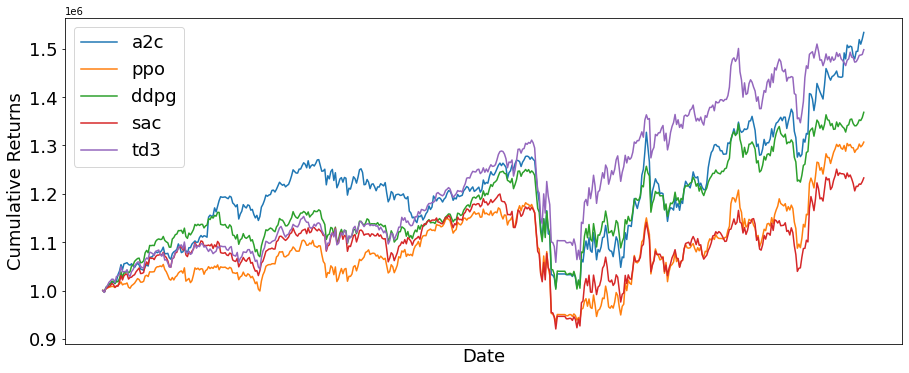

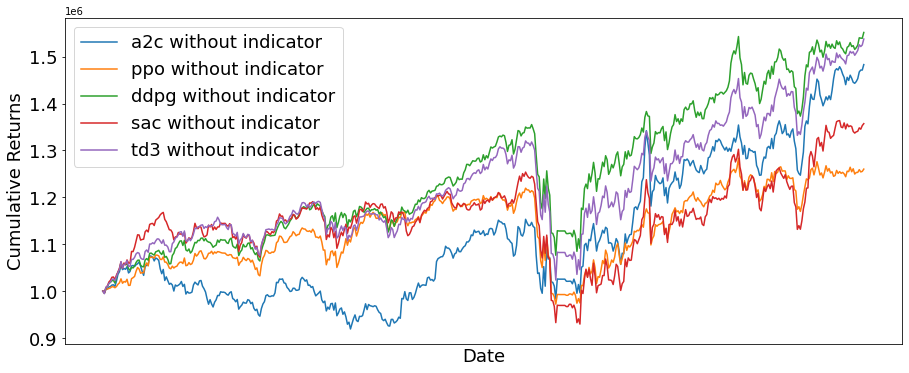

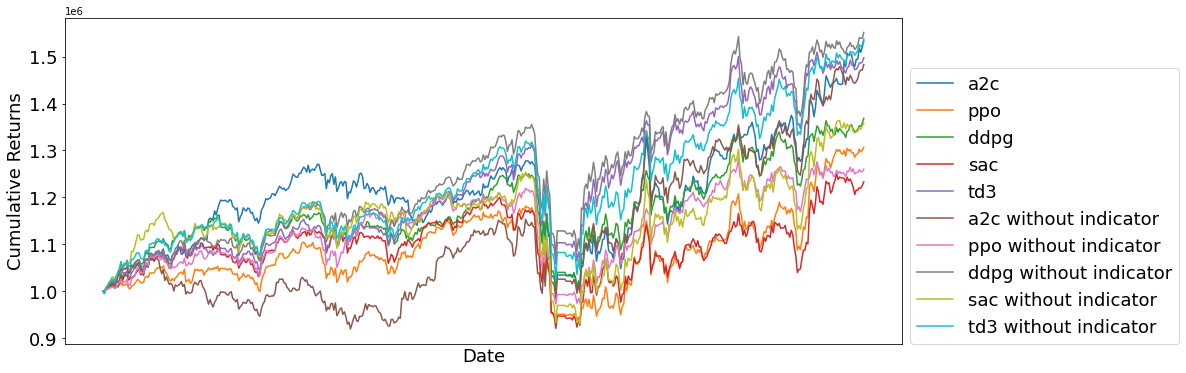

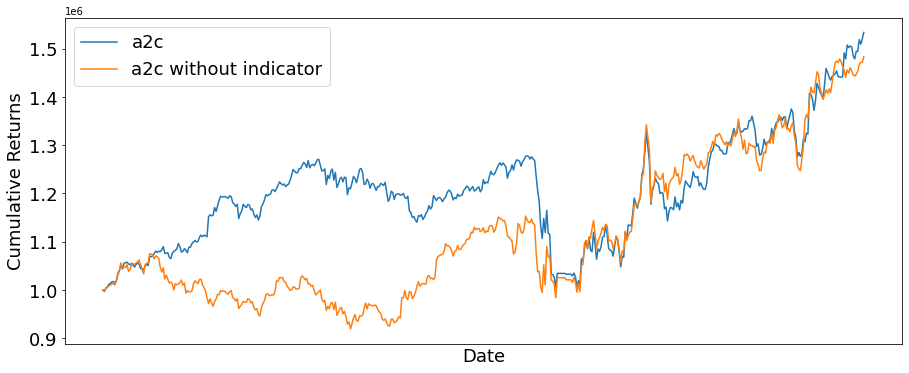

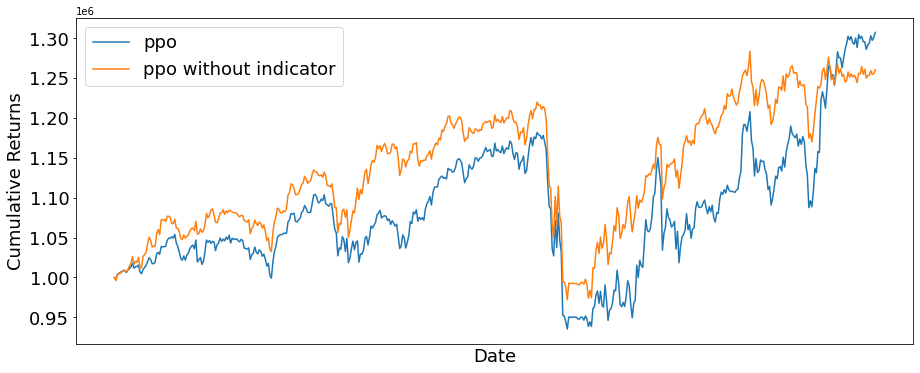

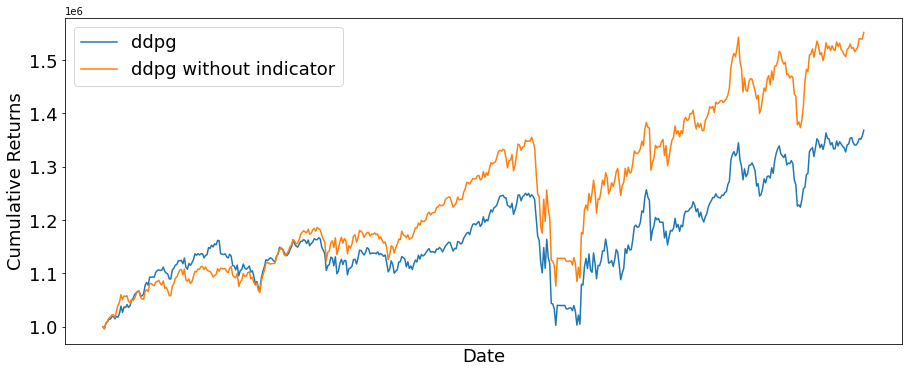

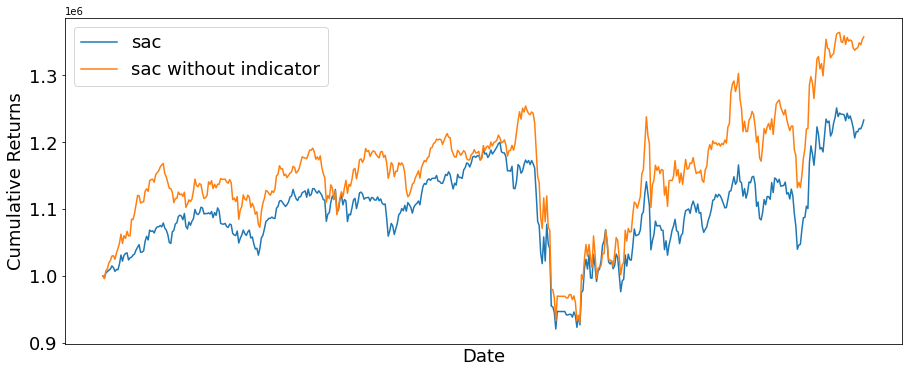

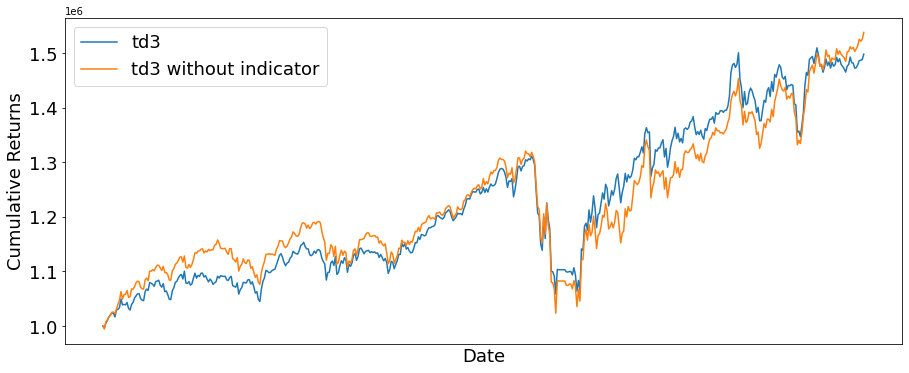

In [ ]:
import matplotlib.pyplot as plt
font =  {'family': 'Times New Roman', 'size': 18} 

# 5 algorithms with indicators 
plt.figure(figsize=(15,6))
plt.plot(date, a2c, label='a2c')
plt.plot(date, ppo, label='ppo')
plt.plot(date, ddpg,  label='ddpg')
plt.plot(date, sac, label='sac')
plt.plot(date, td3, label='td3')
# plt.plot(date, DJIA, label='DJIA',color = 'gray')
# df_account_value_ensemble.account_value.plot()
plt.xticks([])
plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


# 5 algorithms without indicators 
plt.figure(figsize=(15,6))
plt.plot(date, a2c_without, label='a2c without indicator')
plt.plot(date, ppo_without, label='ppo without indicator')
plt.plot(date, ddpg_without,  label='ddpg without indicator')
plt.plot(date, sac_without, label='sac without indicator')
plt.plot(date, td3_without, label='td3 without indicator')
# plt.plot(date, DJIA, label='DJIA',color = 'gray')

plt.xticks([])
plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()



# 5 algorithms without indicators 
plt.figure(figsize=(15,6))
plt.plot(date, a2c, label='a2c')
plt.plot(date, ppo, label='ppo')
plt.plot(date, ddpg,  label='ddpg')
plt.plot(date, sac, label='sac')
plt.plot(date, td3, label='td3')
plt.plot(date, a2c_without, label='a2c without indicator')
plt.plot(date, ppo_without, label='ppo without indicator')
plt.plot(date, ddpg_without,  label='ddpg without indicator')
plt.plot(date, sac_without, label='sac without indicator')
plt.plot(date, td3_without, label='td3 without indicator')

plt.xticks([])
plt.legend(prop=font,loc=[1.01, 0])
plt.tick_params(labelsize=18) 
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()



# compare indicators and no indicators
plt.figure(figsize=(15,6))
plt.plot(date, a2c, label='a2c')
plt.plot(date, a2c_without, label='a2c without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


plt.figure(figsize=(15,6))
plt.plot(date, ppo, label='ppo')
plt.plot(date, ppo_without, label='ppo without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


plt.figure(figsize=(15,6))
plt.plot(date, ddpg,  label='ddpg')
plt.plot(date, ddpg_without,  label='ddpg without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


plt.figure(figsize=(15,6))
plt.plot(date, sac, label='sac')
plt.plot(date, sac_without, label='sac without indicator')
# plt.plot(df_account_value_without_indicator_dict['sac']["date"], DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()


plt.figure(figsize=(15,6))
plt.plot(date, td3, label='td3')
plt.plot(date, td3_without, label='td3 without indicator')
# plt.plot(df_account_value_without_indicator_dict['td3']["date"],DJIA, label='DJIA',color = 'gray')

plt.legend(prop=font)
plt.tick_params(labelsize=18) 
plt.xticks([])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Cumulative Returns",fontsize = 18)
plt.show()